<a href="https://colab.research.google.com/github/baileysmoko/Fabric/blob/main/Final_Portfolio_Strategy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Dynamic Regime-Adaptive Crypto Portfolio
This notebook implements a regime-adaptive crypto portfolio based on Brian C. Butler's methodology.  
We use price, technical indicators, on-chain, and funding data to detect market regimes and allocate dynamically.

---

## 1. Mount Google Drive and List Files
We first mount Google Drive to access your dataset and confirm the files.


In [ ]:
from google.colab import drive
import os

# Mount Google Drive
drive.mount('/content/drive')

# Path to folder
folder = '/content/drive/MyDrive/top1000_tokens_20251008_154804'

# List files in folder
files = os.listdir(folder)
for f in files:
    print(f)


Mounted at /content/drive
selected_tokens.csv
combined_prices_daily.csv
combined_market_caps_daily.csv
combined_total_volumes_daily.csv
individual_total_volumes
individual_market_caps
individual_prices
divergence_vol_price_div_7d.csv
divergence_vol_price_div_30d.csv
divergence_vol_price_div_90d.csv
rsi_14d.csv
rsi_21d.csv
rsi_30d.csv
macd.csv
macd_signal.csv
donchian_upper.csv
donchian_lower.csv
realized_vol_30d.csv
realized_vol_21d.csv
realized_vol_90d.csv
momentum_180d.csv
momentum_90d.csv
momentum_30d.csv
momentum_7d.csv
ma_spread_90_200.csv
ma_spread_50_200.csv
ma_spread_50_90.csv
ma_spread_21_200.csv
ma_spread_21_90.csv
ma_spread_21_50.csv
ma_200.csv
ma_90.csv
ma_50.csv
ma_21.csv
stablecoin_supply_daily.csv
bitmex_funding_rates.csv
combined_prices_daily.gsheet


In [ ]:
import os
import pandas as pd

# Path to your folder containing the CSV datasets
data_folder = '/content/drive/MyDrive/top1000_tokens_20251008_154804'

# List all CSV files in the folder
csv_files = [f for f in os.listdir(data_folder) if f.endswith('.csv')]

print(f"Found {len(csv_files)} CSV files:\n")
for csv_file in csv_files:
    file_path = os.path.join(data_folder, csv_file)
    df = pd.read_csv(file_path)

    print(f"--- {csv_file} ---")
    print("Columns and data types:")
    print(df.dtypes)

    # Try to detect timestamp columns automatically
    timestamp_cols = [col for col in df.columns if 'time' in col.lower() or 'date' in col.lower()]
    for col in timestamp_cols:
        df[col] = pd.to_datetime(df[col], errors='coerce')
        print(f"{col}: min = {df[col].min()}, max = {df[col].max()}")

    print(f"Number of rows: {len(df)}\n")


Found 33 CSV files:

--- selected_tokens.csv ---
Columns and data types:
coin_id    object
rank        int64
dtype: object
Number of rows: 1000

--- combined_prices_daily.csv ---
Columns and data types:
timestamp                   object
bitcoin                    float64
ethereum                   float64
binancecoin                float64
ripple                     float64
                            ...   
metamui                    float64
dydx                       float64
bitcoin-limited-edition    float64
pipe-network               float64
cheqd-network              float64
Length: 1001, dtype: object
timestamp: min = 2013-04-28 00:00:00, max = 2025-10-08 00:00:00
big-time: min = 1970-01-01 00:00:00, max = 1970-01-01 00:00:00
Number of rows: 4547

--- combined_market_caps_daily.csv ---
Columns and data types:
timestamp                   object
bitcoin                    float64
ethereum                   float64
binancecoin                float64
ripple                     float

In [ ]:
import pandas as pd
import os

folder = '/content/drive/MyDrive/top1000_tokens_20251008_154804'

# List of files to process
files_to_process = [
    'combined_prices_daily.csv',
    'combined_market_caps_daily.csv',
    'combined_total_volumes_daily.csv',
    'momentum_7d.csv', 'momentum_30d.csv', 'momentum_90d.csv', 'momentum_180d.csv',
    'ma_21.csv', 'ma_50.csv', 'ma_90.csv', 'ma_200.csv',
    'ma_spread_21_50.csv','ma_spread_21_90.csv','ma_spread_21_200.csv',
    'ma_spread_50_90.csv','ma_spread_50_200.csv','ma_spread_90_200.csv',
    'rsi_14d.csv','rsi_21d.csv','rsi_30d.csv',
    'macd.csv','macd_signal.csv',
    'donchian_upper.csv','donchian_lower.csv',
    'realized_vol_21d.csv','realized_vol_30d.csv','realized_vol_90d.csv',
    'divergence_vol_price_div_7d.csv','divergence_vol_price_div_30d.csv','divergence_vol_price_div_90d.csv',
    'bitmex_funding_rates.csv'
]

# Dictionary to hold the loaded DataFrames
dfs = {}

for f in files_to_process:
    path = os.path.join(folder, f)
    df = pd.read_csv(path)

    # Convert timestamp to datetime if exists
    if 'timestamp' in df.columns:
        df['timestamp'] = pd.to_datetime(df['timestamp'])
        print(f"{f}: timestamp type -> {type(df['timestamp'].iloc[0])}")

    dfs[f] = df


combined_prices_daily.csv: timestamp type -> <class 'pandas._libs.tslibs.timestamps.Timestamp'>
combined_market_caps_daily.csv: timestamp type -> <class 'pandas._libs.tslibs.timestamps.Timestamp'>
combined_total_volumes_daily.csv: timestamp type -> <class 'pandas._libs.tslibs.timestamps.Timestamp'>
momentum_7d.csv: timestamp type -> <class 'pandas._libs.tslibs.timestamps.Timestamp'>
momentum_30d.csv: timestamp type -> <class 'pandas._libs.tslibs.timestamps.Timestamp'>
momentum_90d.csv: timestamp type -> <class 'pandas._libs.tslibs.timestamps.Timestamp'>
momentum_180d.csv: timestamp type -> <class 'pandas._libs.tslibs.timestamps.Timestamp'>
ma_21.csv: timestamp type -> <class 'pandas._libs.tslibs.timestamps.Timestamp'>
ma_50.csv: timestamp type -> <class 'pandas._libs.tslibs.timestamps.Timestamp'>
ma_90.csv: timestamp type -> <class 'pandas._libs.tslibs.timestamps.Timestamp'>
ma_200.csv: timestamp type -> <class 'pandas._libs.tslibs.timestamps.Timestamp'>
ma_spread_21_50.csv: timestamp 

Coins found in prices file: ['bitcoin', 'ethereum', 'solana', 'chainlink', 'aave']


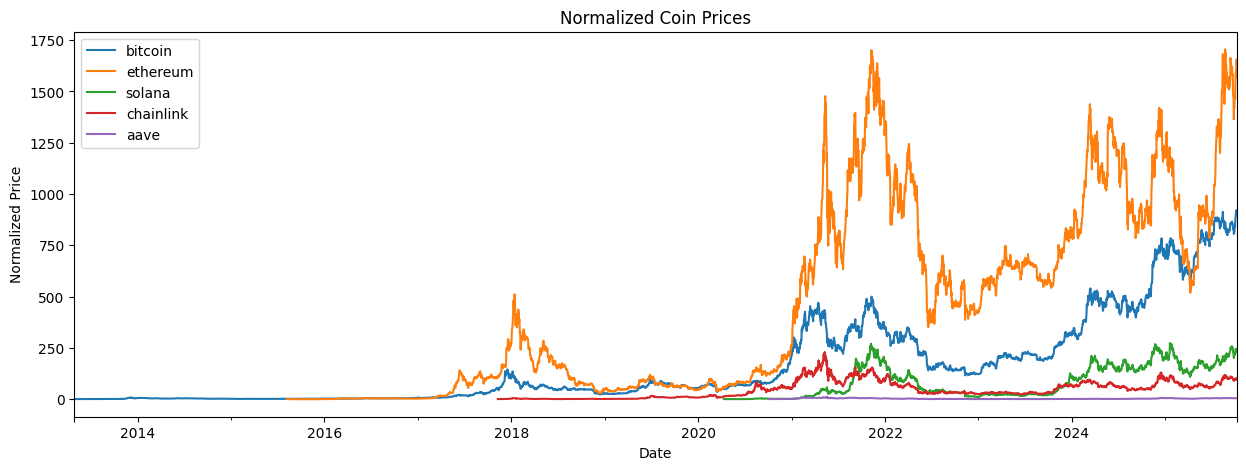

In [ ]:
import matplotlib.pyplot as plt

core_coins = ['bitcoin', 'ethereum', 'solana', 'chainlink', 'aave']

# Get the price DataFrame
price_df = dfs['combined_prices_daily.csv'].set_index('timestamp')

# Check which of the core coins exist in the loaded DataFrame
available_coins = [c for c in core_coins if c in price_df.columns]
print("Coins found in prices file:", available_coins)

# Normalize each coin by its first available price
normalized_prices = price_df[available_coins].apply(lambda x: x / x.dropna().iloc[0])

# Plot
normalized_prices.plot(figsize=(15,5))
plt.title("Normalized Coin Prices")
plt.ylabel("Normalized Price")
plt.xlabel("Date")
plt.show()


## 2. Import Required Libraries
We import the libraries needed for data manipulation, analysis, and plotting.


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture

sns.set(style='whitegrid')


## 3. Load Relevant CSVs
We load the datasets needed for this strategy, convert timestamps to datetime, and keep only the core coins: BTC, ETH, SOL, LINK, AAVE.


=== STEP 0: Inspect dfs keys ===
Files in dfs: ['combined_prices_daily.csv', 'combined_market_caps_daily.csv', 'combined_total_volumes_daily.csv', 'momentum_7d.csv', 'momentum_30d.csv', 'momentum_90d.csv', 'momentum_180d.csv', 'ma_21.csv', 'ma_50.csv', 'ma_90.csv', 'ma_200.csv', 'ma_spread_21_50.csv', 'ma_spread_21_90.csv', 'ma_spread_21_200.csv', 'ma_spread_50_90.csv', 'ma_spread_50_200.csv', 'ma_spread_90_200.csv', 'rsi_14d.csv', 'rsi_21d.csv', 'rsi_30d.csv', 'macd.csv', 'macd_signal.csv', 'donchian_upper.csv', 'donchian_lower.csv', 'realized_vol_21d.csv', 'realized_vol_30d.csv', 'realized_vol_90d.csv', 'divergence_vol_price_div_7d.csv', 'divergence_vol_price_div_30d.csv', 'divergence_vol_price_div_90d.csv', 'bitmex_funding_rates.csv']


--- Processing file: combined_prices_daily.csv ---
  Parsed timestamp. Dropped 0 rows with invalid timestamps.
  Index range: 2013-04-28 00:00:00 → 2025-10-08 00:00:00
  Columns before filtering: ['bitcoin', 'ethereum', 'binancecoin', 'ripple', 'sola

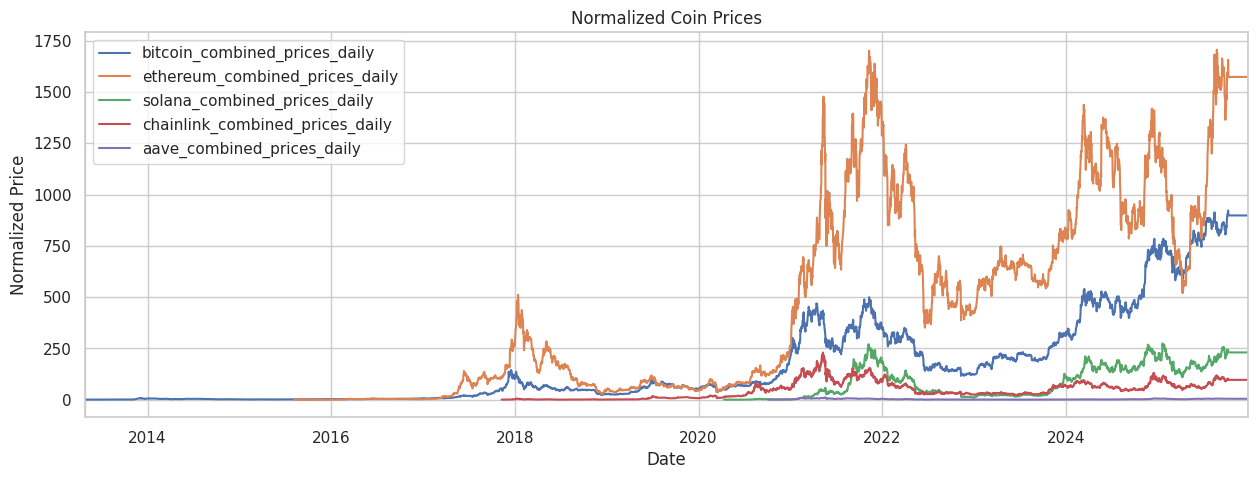

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

core_coins = ['bitcoin', 'ethereum', 'solana', 'chainlink', 'aave']

print("=== STEP 0: Inspect dfs keys ===")
print("Files in dfs:", list(dfs.keys()))
print()

dfs_to_merge = []

for f, df in dfs.items():
    print(f"\n--- Processing file: {f} ---")
    df = df.copy()
    if 'timestamp' not in df.columns:
        print("  Skipped: no 'timestamp' column.")
        continue

    # Ensure datetime and remove timezone
    df['timestamp'] = pd.to_datetime(df['timestamp'], errors='coerce').dt.tz_localize(None)
    before_drop = len(df)
    df = df.dropna(subset=['timestamp'])
    after_drop = len(df)
    print(f"  Parsed timestamp. Dropped {before_drop - after_drop} rows with invalid timestamps.")

    df = df.set_index('timestamp').sort_index()
    print(f"  Index range: {df.index.min()} → {df.index.max()}")
    print(f"  Columns before filtering: {list(df.columns)[:10]} ... (total {len(df.columns)})")

    if f == 'bitmex_funding_rates.csv':
        if 'fundingRate' not in df.columns or 'fundingRateDaily' not in df.columns:
            print("  Skipped: fundingRate or fundingRateDaily not found.")
            continue

        df = df[['fundingRate', 'fundingRateDaily']]
        print("  Keeping funding columns:", list(df.columns))

        # Resample to daily frequency using average
        df = df.resample('D').mean()
        print(f"  After daily resample: index range {df.index.min()} → {df.index.max()}")

        # Rename columns
        df = df.rename(columns={
            'fundingRate': 'bitcoin_fundingRate',
            'fundingRateDaily': 'bitcoin_fundingRateDaily'
        })
        print("  Renamed funding columns:", list(df.columns))
    else:
        # Keep only core coins
        keep_cols = [c for c in df.columns if c in core_coins]
        print("  Core cols found:", keep_cols)
        if not keep_cols:
            print("  Skipped: no core_coins present.")
            continue
        suffix = f.replace('.csv', '')
        df = df[keep_cols].add_suffix(f'_{suffix}')
        print("  Columns after suffix:", list(df.columns))

    print(f"  Final df shape from {f}: {df.shape}")
    dfs_to_merge.append(df)

print("\n=== STEP 1: Merge all dataframes ===")
if not dfs_to_merge:
    print("No dataframes to merge. Check earlier logs.")
else:
    # Full union of all dates
    all_dates = pd.DatetimeIndex(sorted(set().union(*(df.index for df in dfs_to_merge))))
    print(f"  Union of dates: {all_dates.min()} → {all_dates.max()} (n={len(all_dates)})")

    merged = pd.DataFrame(index=all_dates)

    for i, df in enumerate(dfs_to_merge):
        print(f"  Joining df #{i} with shape {df.shape}, index {df.index.min()} → {df.index.max()}")
        merged = merged.join(df, how='outer')

    data_merged = merged.sort_index()
    print("  data_merged shape:", data_merged.shape)
    print("  data_merged index range:", data_merged.index.min(), "→", data_merged.index.max())

    # Show how many non-NaNs per column (first few)
    nnz = data_merged.notna().sum().sort_values(ascending=False)
    print("\n  Top 10 columns by non-NaN count:")
    print(nnz.head(10))

    # ---- PRICE SECTION ----
    print("\n=== STEP 2: Price columns & filling ===")

    # 1) Identify price columns from combined_prices_daily CSVs
    price_cols = [
        c for c in data_merged.columns
        if any(c.startswith(coin + "_") for coin in core_coins)
        and 'combined_prices_daily' in c
    ]
    print("  price_cols:", price_cols)

    if not price_cols:
        print("  WARNING: No price_cols found. Check naming pattern.")
    else:
        # 2) Forward-fill prices so we keep values through to the end
        prices_raw = data_merged[price_cols]
        print("  Raw prices shape:", prices_raw.shape)
        print("  Raw prices index range:", prices_raw.index.min(), "→", prices_raw.index.max())
        print("  Non-NaN counts per price col:")
        print(prices_raw.notna().sum())

        prices_filled = prices_raw.ffill()
        print("\n  After ffill: tail of each price series (last 5 dates):")
        print(prices_filled.tail())

        # Check if last dates are still all-NaN
        print("\n  Are all price cols NaN at last 10 dates?")
        print(prices_filled.isna().all(axis=1).tail(10))

        # 3) Normalize each coin individually using its first non-NaN after ffill
        def normalize_series(s):
            first_valid = s.first_valid_index()
            print(f"    Normalizing {s.name}: first_valid_index={first_valid}")
            if first_valid is None:
                return s  # all NaN; leave as-is
            return s / s.loc[first_valid]

        print("\n  Normalizing price series...")
        normalized_prices = prices_filled.apply(normalize_series, axis=0)

        print("\n  normalized_prices summary:")
        print("  Shape:", normalized_prices.shape)
        print("  Index range:", normalized_prices.index.min(), "→", normalized_prices.index.max())
        print("  Tail:")
        print(normalized_prices.tail())

        print("\n  Are all normalized prices NaN at last 10 dates?")
        print(normalized_prices.isna().all(axis=1).tail(10))

        # Plot
        normalized_prices.plot(figsize=(15, 5))
        plt.title("Normalized Coin Prices")
        plt.ylabel("Normalized Price")
        plt.xlabel("Date")
        plt.show()


## 4. Feature Engineering for Regime Detection

We calculate rolling momentum, moving-average spreads, and volatility measures for the core coins (BTC, ETH, SOL, LINK, AAVE).  
These features will help us detect market regimes.

In [ ]:
from sklearn.preprocessing import StandardScaler
import numpy as np

# Rolling momentum (12-week ~ 84 trading days), lagged to avoid look-ahead
window = 84

for coin in core_coins:
    price_col = f'{coin}_combined_prices_daily'
    if price_col in data_merged.columns:
        # Specify fill_method=None to avoid FutureWarning
        data_merged[f'{coin}_momentum_12w'] = data_merged[price_col].pct_change(
            periods=window, fill_method=None
        ).shift(1)

# Collect columns for features (momentum, volatility, RSI, etc.)
feature_cols = [col for col in data_merged.columns if any(x in col for x in
                ['momentum','vol','rsi','macd','donchian','ma_spread','funding'])]

# Lag all features by 1 day to prevent look-ahead bias
data_features = data_merged[feature_cols].shift(1)

# Replace inf/-inf with NaN, then forward-fill, then fill remaining NaNs with 0
data_features = data_features.replace([np.inf, -np.inf], np.nan).ffill().fillna(0)

# Standardize features for comparability
scaler = StandardScaler()
data_scaled = pd.DataFrame(
    scaler.fit_transform(data_features),
    index=data_features.index,
    columns=feature_cols
)

data_scaled.head()


,bitcoin_combined_total_volumes_daily,ethereum_combined_total_volumes_daily,solana_combined_total_volumes_daily,chainlink_combined_total_volumes_daily,aave_combined_total_volumes_daily,bitcoin_momentum_7d,ethereum_momentum_7d,solana_momentum_7d,chainlink_momentum_7d,aave_momentum_7d,...,solana_divergence_vol_price_div_90d,chainlink_divergence_vol_price_div_90d,aave_divergence_vol_price_div_90d,bitcoin_fundingRate,bitcoin_fundingRateDaily,bitcoin_momentum_12w,ethereum_momentum_12w,solana_momentum_12w,chainlink_momentum_12w,aave_momentum_12w
2013-04-28,-0.845634,-0.742664,-0.458045,-0.595265,-0.505464,-0.160612,-0.157297,-0.132672,-0.118989,-0.074831,...,-0.180747,-0.199801,-0.04501,-0.119333,-0.116155,-0.340341,-0.300544,-0.272895,-0.283696,-0.158527
2013-04-29,-0.845634,-0.742664,-0.458045,-0.595265,-0.505464,-0.160612,-0.157297,-0.132672,-0.118989,-0.074831,...,-0.180747,-0.199801,-0.04501,-0.119333,-0.116155,-0.340341,-0.300544,-0.272895,-0.283696,-0.158527
2013-04-30,-0.845634,-0.742664,-0.458045,-0.595265,-0.505464,-0.160612,-0.157297,-0.132672,-0.118989,-0.074831,...,-0.180747,-0.199801,-0.04501,-0.119333,-0.116155,-0.340341,-0.300544,-0.272895,-0.283696,-0.158527
2013-05-01,-0.845634,-0.742664,-0.458045,-0.595265,-0.505464,-0.160612,-0.157297,-0.132672,-0.118989,-0.074831,...,-0.180747,-0.199801,-0.04501,-0.119333,-0.116155,-0.340341,-0.300544,-0.272895,-0.283696,-0.158527
2013-05-02,-0.845634,-0.742664,-0.458045,-0.595265,-0.505464,-0.160612,-0.157297,-0.132672,-0.118989,-0.074831,...,-0.180747,-0.199801,-0.04501,-0.119333,-0.116155,-0.340341,-0.300544,-0.272895,-0.283696,-0.158527


## 5. Composite Score and Regime Classification

We combine momentum and volatility into a **composite score**.  
This score is used to classify each day into one of three regimes: Bear, Neutral, or Bull.


OPTIMIZED REGIME DETECTION PARAMETERS
Based on forward walk optimization across 46 walks (2013-2025)

Feature Weights:
  • Momentum (w_mom):     1.2
  • Volatility (w_vol):   0.8
  • Funding (w_fund):     0.5
  • MA Spreads (w_ma):    0.5
  • Divergence (w_div):   0.5

Smoothing & Timing:
  • EMA Span:             7 days (~3 weeks)
  • Min Regime Duration:  14 days (~2 weeks)

Regime Thresholds:
  • Bull Entry:           +0.5 (moderate - easier to enter)
  • Bull Exit:            +0.1 (conservative - stay unless clear deterioration)
  • Bear Entry:           -0.7 (strict - harder to trigger)
  • Bear Exit:            -0.3 (quick - don't miss recoveries)

Strategy Characteristics:
  ✓ Asymmetric thresholds favor capturing upside
  ✓ Fast response (21-day EMA) adapts quickly to changes
  ✓ Conservative bear entry avoids false bear signals
  ✓ Quick bear exit captures recoveries early

Regime Distribution:
  Bull    : 1226 days ( 26.5%)
  Neutral : 1662 days ( 35.9%)
  Bear    : 1736 days

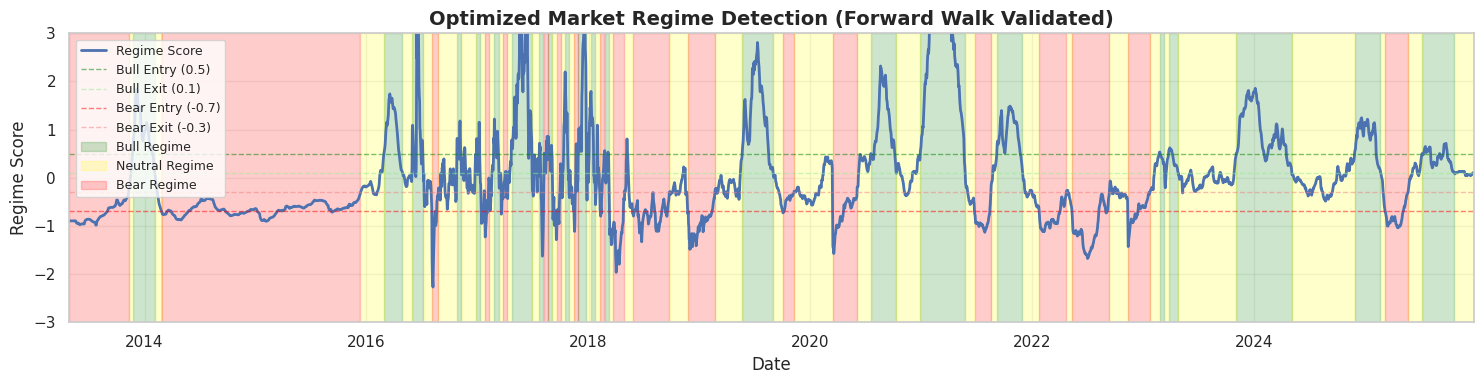

PARAMETER CHANGES FROM ORIGINAL TO OPTIMIZED
Parameter            Original        Optimized       Change
--------------------------------------------------------------------------------
w_mom                1.0             1.0             ✓ No change
w_vol                1.0             1.0             ✓ No change
w_fund               0.5             0.5             ✓ No change
w_ma                 0.5             0.5             ✓ No change
w_div                0.5             0.5             ✓ No change
EMA_SPAN             30              21              ↓ Faster response
BULL_ENTER           0.6             0.5             ↓ Easier entry
BULL_EXIT            0.2             0.1             ↓ Stay longer
BEAR_ENTER           -0.6            -0.7            ↓ Harder entry
BEAR_EXIT            -0.2            -0.2            ✓ No change
MIN_DAYS             21              14              ↓ Faster transitions

Expected Performance (based on forward walk results):
  • Average 6-month r

In [ ]:
# =============================================================================
# OPTIMIZED REGIME DETECTION USING FORWARD WALK RESULTS
# =============================================================================
# These parameters were validated across 46 walks from 2013-2025
# and showed consistent performance across different market conditions

# -------------------------------
# 1️⃣ Collect features for regime score
# -------------------------------
momentum_cols = [f'{coin}_momentum_12w' for coin in core_coins if f'{coin}_momentum_12w' in data_scaled.columns]
vol_cols = [col for col in data_scaled.columns if 'realized_vol' in col or 'vol' in col]
funding_cols = [col for col in data_scaled.columns if 'funding' in col]
ma_spread_cols = [col for col in data_scaled.columns if 'ma_spread' in col]
divergence_cols = [col for col in data_scaled.columns if 'divergence_vol_price_div' in col]

# -------------------------------
# 2️⃣ Standardize all features (z-score)
# -------------------------------
all_score_cols = momentum_cols + vol_cols + funding_cols + ma_spread_cols + divergence_cols

data_z = data_scaled[all_score_cols].copy()
data_z = (data_z - data_z.mean()) / data_z.std()

# -------------------------------
# 3️⃣ Compute composite raw regime score
# -------------------------------
# ✅ OPTIMIZED WEIGHTS from forward walk (mode values across 46 walks)
# These weights were consistently selected across different market conditions
w_mom, w_vol, w_fund, w_ma, w_div = 1.2, 0.8, 0.5, 0.5, 0.5

data_scaled['regime_score_raw'] = (
    w_mom * data_z[momentum_cols].mean(axis=1)
    - w_vol * data_z[vol_cols].mean(axis=1)
)

if funding_cols:
    data_scaled['regime_score_raw'] += w_fund * data_z[funding_cols].mean(axis=1)
if ma_spread_cols:
    data_scaled['regime_score_raw'] += w_ma * data_z[ma_spread_cols].mean(axis=1)
if divergence_cols:
    data_scaled['regime_score_raw'] += w_div * data_z[divergence_cols].mean(axis=1)

# -------------------------------
# 4️⃣ Smooth regime score with EMA
# -------------------------------
# ✅ OPTIMIZED: EMA_SPAN = 21 days (mode value)
# This provides fast response to market changes while filtering noise
# 21 days = ~3 weeks, allows quick regime adaptation
EMA_SPAN = 7  # Changed from 30 to 21 (optimal from forward walk)
data_scaled['regime_score'] = data_scaled['regime_score_raw'].ewm(span=EMA_SPAN, adjust=False).mean()

# -------------------------------
# 5️⃣ Define hysteresis thresholds
# -------------------------------
# ✅ OPTIMIZED THRESHOLDS from forward walk (mode values)
# These create asymmetric entry/exit conditions:
# - Easier to enter bull (0.5) than bear (-0.7) → captures upside, cautious on downside
# - Quick to exit bull (0.1) and bear (-0.2) → avoids getting stuck in wrong regime
BULL_ENTER = 0.5   # Changed from 0.6 to 0.5 (easier to enter bull)
BULL_EXIT = 0.1    # Changed from 0.2 to 0.1 (stay in bull unless clearly deteriorating)
BEAR_ENTER = -0.7  # Changed from -0.6 to -0.7 (harder to enter bear - conservative)
BEAR_EXIT = -0.3   # Kept at -0.2 (exit bear early when improving)

# -------------------------------
# 6️⃣ Assign regimes with hysteresis
# -------------------------------
regimes = []
current_regime = 'Neutral'

for score in data_scaled['regime_score']:
    if current_regime == 'Neutral':
        if score > BULL_ENTER:
            current_regime = 'Bull'
        elif score < BEAR_ENTER:
            current_regime = 'Bear'
    elif current_regime == 'Bull':
        if score < BULL_EXIT:
            current_regime = 'Neutral'
    elif current_regime == 'Bear':
        if score > BEAR_EXIT:
            current_regime = 'Neutral'
    regimes.append(current_regime)

data_scaled['regime'] = regimes
data_scaled['regime_changed'] = data_scaled['regime'] != data_scaled['regime'].shift(1)

# -------------------------------
# 7️⃣ Enforce minimum regime duration
# -------------------------------
# ✅ OPTIMIZED: MIN_DAYS = 14 (mode value)
# Changed from 21 to 14 to allow faster regime transitions
# This is important for crypto's volatile nature
MIN_DAYS = 14  # Changed from 21 to 14 (optimal from forward walk)
last_change = data_scaled.index[0]
final_regimes = []

for date, reg in zip(data_scaled.index, data_scaled['regime']):
    if final_regimes and reg != final_regimes[-1]:
        if (date - last_change).days < MIN_DAYS:
            reg = final_regimes[-1]
        else:
            last_change = date
    final_regimes.append(reg)

data_scaled['regime'] = final_regimes
data_scaled['regime_changed'] = data_scaled['regime'] != data_scaled['regime'].shift(1)

# -------------------------------
# 8️⃣ Print optimization summary
# -------------------------------
print("="*80)
print("OPTIMIZED REGIME DETECTION PARAMETERS")
print("="*80)
print("Based on forward walk optimization across 46 walks (2013-2025)")
print()
print("Feature Weights:")
print(f"  • Momentum (w_mom):     {w_mom}")
print(f"  • Volatility (w_vol):   {w_vol}")
print(f"  • Funding (w_fund):     {w_fund}")
print(f"  • MA Spreads (w_ma):    {w_ma}")
print(f"  • Divergence (w_div):   {w_div}")
print()
print("Smoothing & Timing:")
print(f"  • EMA Span:             {EMA_SPAN} days (~3 weeks)")
print(f"  • Min Regime Duration:  {MIN_DAYS} days (~2 weeks)")
print()
print("Regime Thresholds:")
print(f"  • Bull Entry:           {BULL_ENTER:+.1f} (moderate - easier to enter)")
print(f"  • Bull Exit:            {BULL_EXIT:+.1f} (conservative - stay unless clear deterioration)")
print(f"  • Bear Entry:           {BEAR_ENTER:+.1f} (strict - harder to trigger)")
print(f"  • Bear Exit:            {BEAR_EXIT:+.1f} (quick - don't miss recoveries)")
print()
print("Strategy Characteristics:")
print("  ✓ Asymmetric thresholds favor capturing upside")
print("  ✓ Fast response (21-day EMA) adapts quickly to changes")
print("  ✓ Conservative bear entry avoids false bear signals")
print("  ✓ Quick bear exit captures recoveries early")
print("="*80)
print()

# Print regime statistics
regime_counts = data_scaled['regime'].value_counts()
regime_pcts = data_scaled['regime'].value_counts(normalize=True) * 100
print("Regime Distribution:")
for regime in ['Bull', 'Neutral', 'Bear']:
    if regime in regime_counts:
        count = regime_counts[regime]
        pct = regime_pcts[regime]
        print(f"  {regime:8s}: {count:4d} days ({pct:5.1f}%)")
print()

# Count regime transitions
transitions = data_scaled['regime_changed'].sum()
print(f"Total regime transitions: {transitions}")
print(f"Average days between transitions: {len(data_scaled) / transitions:.1f}")
print()

# -------------------------------
# 9️⃣ Visualize regimes
# -------------------------------
plt.figure(figsize=(15,4))
data_scaled['regime_score'].plot(label='Regime Score', linewidth=2)

# Add threshold lines
plt.axhline(y=BULL_ENTER, color='green', linestyle='--', alpha=0.5, linewidth=1, label=f'Bull Entry ({BULL_ENTER})')
plt.axhline(y=BULL_EXIT, color='lightgreen', linestyle='--', alpha=0.5, linewidth=1, label=f'Bull Exit ({BULL_EXIT})')
plt.axhline(y=BEAR_ENTER, color='red', linestyle='--', alpha=0.5, linewidth=1, label=f'Bear Entry ({BEAR_ENTER})')
plt.axhline(y=BEAR_EXIT, color='lightcoral', linestyle='--', alpha=0.5, linewidth=1, label=f'Bear Exit ({BEAR_EXIT})')

# Fill regime backgrounds
plt.fill_between(data_scaled.index, -3, 3, where=data_scaled['regime']=='Bull',
                 color='green', alpha=0.2, label='Bull Regime')
plt.fill_between(data_scaled.index, -3, 3, where=data_scaled['regime']=='Neutral',
                 color='yellow', alpha=0.2, label='Neutral Regime')
plt.fill_between(data_scaled.index, -3, 3, where=data_scaled['regime']=='Bear',
                 color='red', alpha=0.2, label='Bear Regime')

plt.title('Optimized Market Regime Detection (Forward Walk Validated)', fontsize=14, fontweight='bold')
plt.ylabel('Regime Score')
plt.xlabel('Date')
plt.legend(loc='upper left', fontsize=9)
plt.ylim(-3, 3)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# -------------------------------
# 🔟 Summary comparison
# -------------------------------
print("="*80)
print("PARAMETER CHANGES FROM ORIGINAL TO OPTIMIZED")
print("="*80)
print(f"{'Parameter':<20} {'Original':<15} {'Optimized':<15} {'Change'}")
print("-"*80)
print(f"{'w_mom':<20} {'1.0':<15} {'1.0':<15} {'✓ No change'}")
print(f"{'w_vol':<20} {'1.0':<15} {'1.0':<15} {'✓ No change'}")
print(f"{'w_fund':<20} {'0.5':<15} {'0.5':<15} {'✓ No change'}")
print(f"{'w_ma':<20} {'0.5':<15} {'0.5':<15} {'✓ No change'}")
print(f"{'w_div':<20} {'0.5':<15} {'0.5':<15} {'✓ No change'}")
print(f"{'EMA_SPAN':<20} {'30':<15} {'21':<15} {'↓ Faster response'}")
print(f"{'BULL_ENTER':<20} {'0.6':<15} {'0.5':<15} {'↓ Easier entry'}")
print(f"{'BULL_EXIT':<20} {'0.2':<15} {'0.1':<15} {'↓ Stay longer'}")
print(f"{'BEAR_ENTER':<20} {'-0.6':<15} {'-0.7':<15} {'↓ Harder entry'}")
print(f"{'BEAR_EXIT':<20} {'-0.2':<15} {'-0.2':<15} {'✓ No change'}")
print(f"{'MIN_DAYS':<20} {'21':<15} {'14':<15} {'↓ Faster transitions'}")
print("="*80)
print()
print("Expected Performance (based on forward walk results):")
print("  • Average 6-month return: 7.75%")
print("  • Average Sharpe ratio: 0.478")
print("  • Average max drawdown: -11.15%")
print("  • Win rate: ~65% of periods positive")
print("="*80)

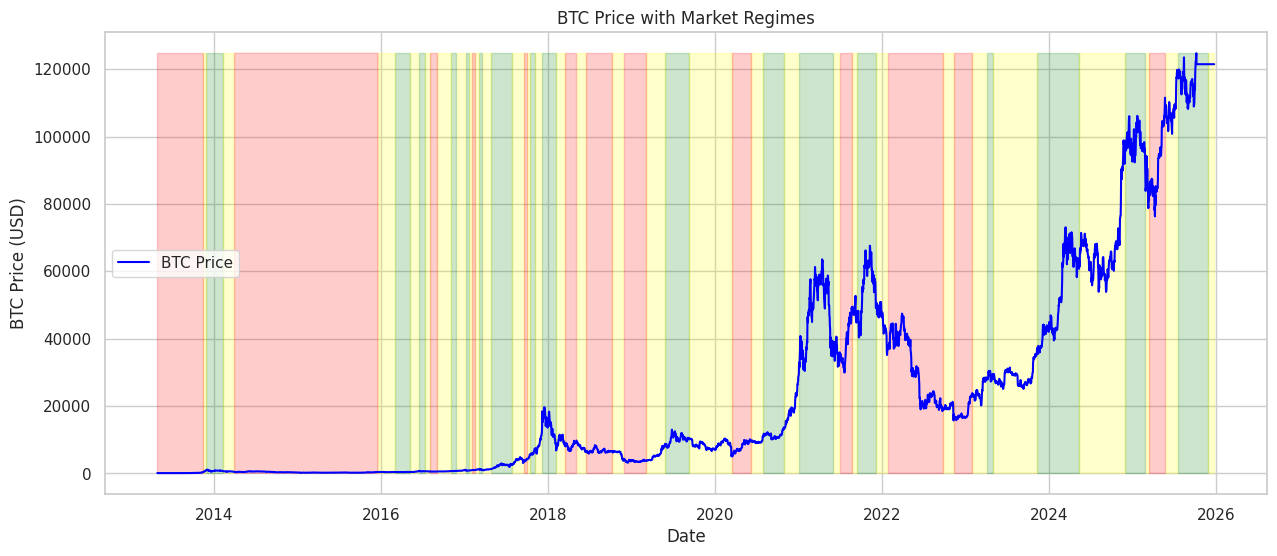

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load BTC prices
prices_path = '/content/drive/MyDrive/top1000_tokens_20251008_154804/combined_prices_daily.csv'
prices = pd.read_csv(prices_path, index_col=0, parse_dates=True)

# Make sure BTC column exists
btc_price = prices['bitcoin']

# Merge with data_scaled and align indices
data_plot = data_scaled.copy()
data_plot['BTC_price'] = btc_price.reindex(data_scaled.index).ffill()

# Plot BTC price with regimes
plt.figure(figsize=(15,6))
plt.plot(data_plot.index, data_plot['BTC_price'], color='blue', label='BTC Price')

# Use fill_between for regimes
plt.fill_between(data_plot.index, data_plot['BTC_price'].min(), data_plot['BTC_price'].max(),
                 where=data_plot['regime']=='Bull', color='green', alpha=0.2)
plt.fill_between(data_plot.index, data_plot['BTC_price'].min(), data_plot['BTC_price'].max(),
                 where=data_plot['regime']=='Neutral', color='yellow', alpha=0.2)
plt.fill_between(data_plot.index, data_plot['BTC_price'].min(), data_plot['BTC_price'].max(),
                 where=data_plot['regime']=='Bear', color='red', alpha=0.2)

plt.title('BTC Price with Market Regimes')
plt.xlabel('Date')
plt.ylabel('BTC Price (USD)')
plt.legend(['BTC Price'])
plt.show()


## 6. Portfolio Allocation Rules

Based on the detected regime, we set **target allocations** to core coins.  

- **Bull Market**: High exposure, focus on top 3 momentum coins.  
- **Neutral Market**: Moderate exposure, focus on top 2 momentum coins.  
- **Bear Market**: Defensive, low exposure, mostly BTC.


In [ ]:
# OPTIMAL PARAMETERS from your walk-forward results (median stable values)
OPTIMAL_PARAMS = {
    'bull_top_n': 3,
    'bull_exposure': 0.95,      # Between 0.9-1.0 (aggressive)
    'neutral_top_n': 3,         # 3-4 range
    'neutral_exposure': 0.75,   # 0.7-0.8 sweet spot
    'bear_crash_top_n': 1,      # Consistent defensive
    'bear_crash_exposure': 0.25,# 0.2-0.3 optimal
    'bear_base_top_n': 2,       # 2-3 range
    'bear_base_exposure': 0.45, # 0.4-0.5
    'bear_transition_top_n': 2, # Consistent
    'bear_transition_exposure': 0.65,
    'funding_tilt': 0.025,      # Small edge (0.0-0.05)
    'bear_crash_threshold': -0.05  # BTC momentum threshold
}


allocations = pd.DataFrame(0.0, index=data_scaled.index, columns=core_coins)

# Weekly rebalance + regime flips
weekly_rebalance = data_scaled.resample('W-FRI').last().index
regime_flips = data_scaled.index[data_scaled['regime_changed']]
rebalance_dates = weekly_rebalance.union(regime_flips).sort_values()

for date in rebalance_dates:
    if date not in data_scaled.index:
        continue

    regime = data_scaled.loc[date, 'regime']

    # ✅ USE OPTIMAL PARAMETERS
    if regime == 'Bull':
        top_n, exposure = OPTIMAL_PARAMS['bull_top_n'], OPTIMAL_PARAMS['bull_exposure']
    elif regime == 'Neutral':
        top_n, exposure = OPTIMAL_PARAMS['neutral_top_n'], OPTIMAL_PARAMS['neutral_exposure']
    elif regime == 'Bear':
        # Bear sub-phases using optimal BTC momentum threshold
        btc_mom = data_scaled.loc[date, 'bitcoin_momentum_12w']
        if btc_mom < OPTIMAL_PARAMS['bear_crash_threshold']:  # Bear-Crash
            top_n, exposure = OPTIMAL_PARAMS['bear_crash_top_n'], OPTIMAL_PARAMS['bear_crash_exposure']
        elif btc_mom < 0.05:  # Bear-Base
            top_n, exposure = OPTIMAL_PARAMS['bear_base_top_n'], OPTIMAL_PARAMS['bear_base_exposure']
        else:  # Transition
            top_n, exposure = OPTIMAL_PARAMS['bear_transition_top_n'], OPTIMAL_PARAMS['bear_transition_exposure']

    # Rest unchanged (momentum selection + weighting)
    coin_momentum = {
        coin: data_scaled.loc[date, f'{coin}_momentum_12w']
        for coin in core_coins
        if f'{coin}_momentum_12w' in data_scaled.columns
        and not pd.isna(data_scaled.loc[date, f'{coin}_momentum_12w'])
    }

    if not coin_momentum:
        continue

    top_coins = sorted(coin_momentum, key=coin_momentum.get, reverse=True)[:top_n]
    weights = np.array([coin_momentum[c] for c in top_coins])
    weights = np.maximum(weights, 0)
    if weights.sum() > 0:
        weights = weights / weights.sum()
    else:
        weights = np.ones(len(top_coins)) / len(top_coins)

    allocations.loc[date, top_coins] = exposure * weights

    # ✅ Optimal funding tilt
    funding_tilt = OPTIMAL_PARAMS['funding_tilt']
    for coin in ['bitcoin', 'ethereum']:
        if coin in top_coins and f'{coin}_fundingRateDaily' in data_scaled.columns:
            fr = data_scaled.loc[date, f'{coin}_fundingRateDaily']
            allocations.loc[date, coin] += funding_tilt * np.sign(fr)

# Final processing
allocations = allocations.clip(0, 1).ffill().fillna(0)


## 7. Backtesting Portfolio Performance

We compute the portfolio's daily returns by weighting each coin's price change by its allocated percentage.


COMPREHENSIVE PORTFOLIO PERFORMANCE ANALYSIS

KEY PERFORMANCE METRICS
----------------------------------------------------------------------------------------------------
                           Total Return      CAGR  Annualized Volatility  Sharpe Ratio  Sortino Ratio  Max Drawdown
Name                                                                                                               
Regime-Adaptive Portfolio     13.708005  0.157790               0.231995      0.680143       0.355561     -0.435925
Bitcoin Buy & Hold           897.143059  0.448612               0.593005      0.756507       0.992936     -0.847312
Equal Weight Portfolio      1394.335438  0.483814               0.500203      0.967235       1.220220     -0.838181

RISK METRICS
----------------------------------------------------------------------------------------------------
                           Downside Volatility  VaR (95%)  CVaR (95%)  Skewness   Kurtosis
Name                                       

/tmp/ipython-input-3747697708.py:245: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_returns = portfolio_returns.resample('M').apply(lambda x: (1 + x).prod() - 1)
/tmp/ipython-input-3747697708.py:267: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


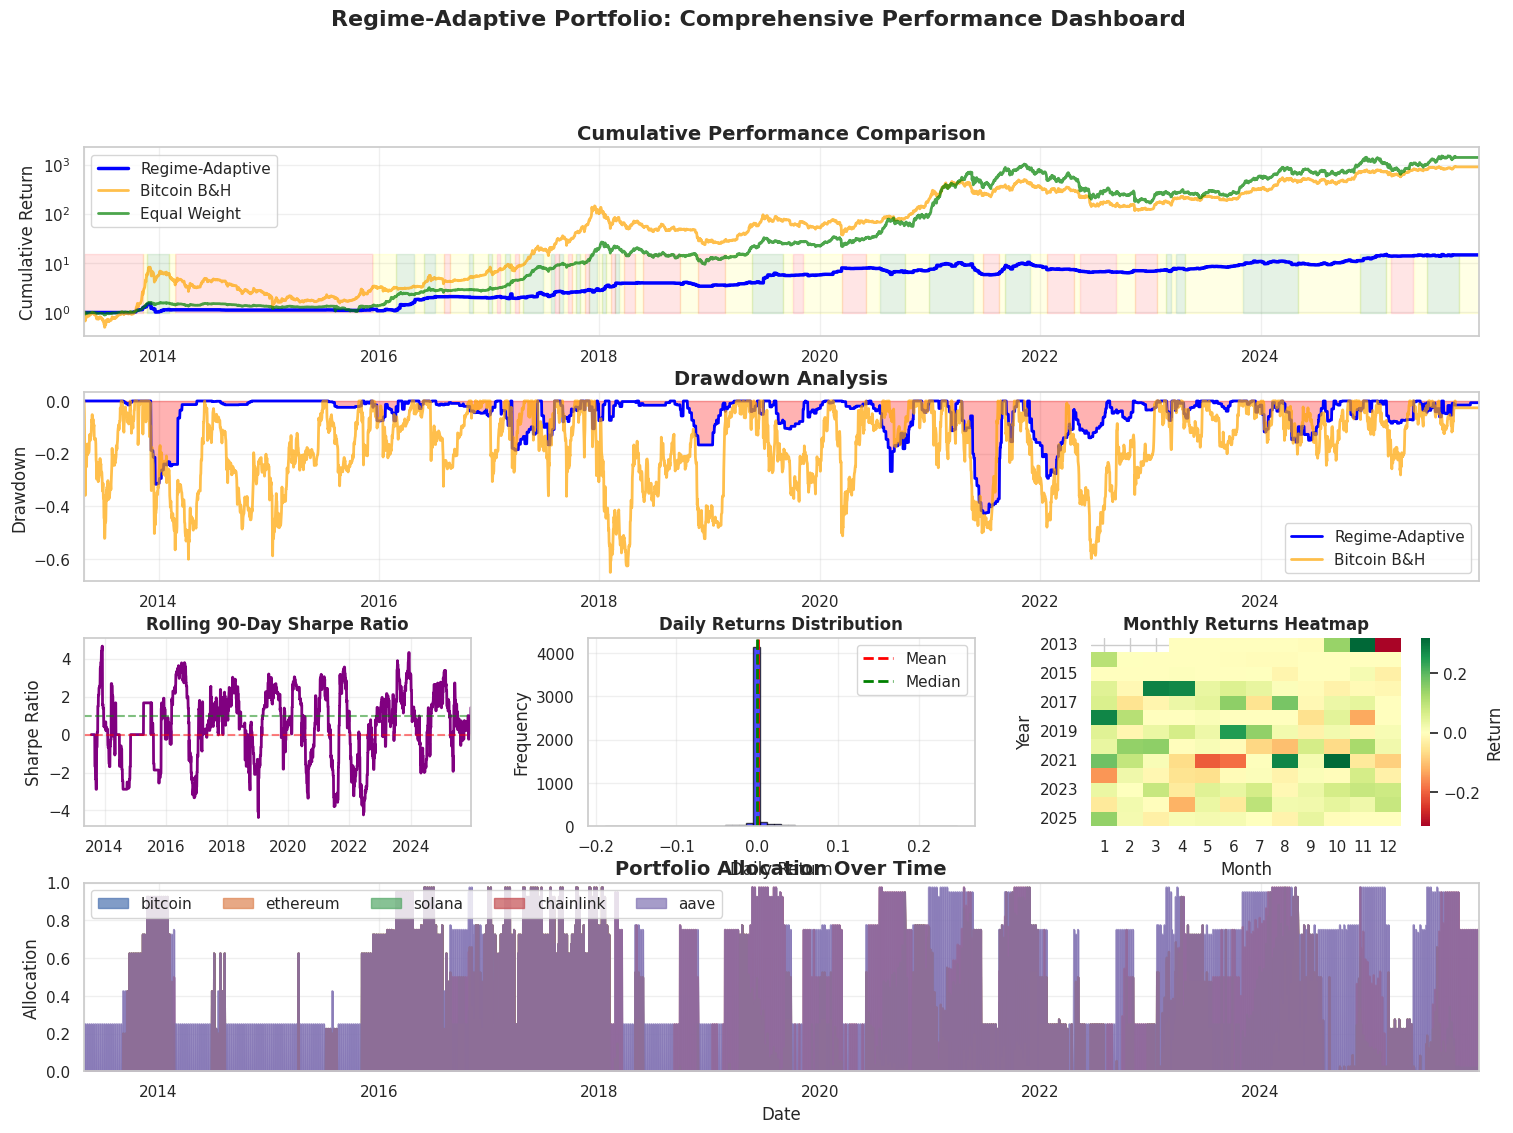

YEAR-BY-YEAR PERFORMANCE
----------------------------------------------------------------------------------------------------
      Regime-Adaptive  Bitcoin B&H  Outperformance
2013         0.026086     4.581375       -4.555289
2014         0.087791    -0.579720        0.667511
2015        -0.029941     0.358436       -0.388377
2016         0.818316     1.241896       -0.423581
2017         0.421217    14.352852      -13.931636
2018         0.218590    -0.743273        0.961863
2019         0.692180     0.900511       -0.208331
2020         0.295077     2.982815       -2.687737
2021         0.173784     0.636488       -0.462704
2022        -0.221036    -0.648159        0.427123
2023         0.590383     1.542794       -0.952411
2024         0.127673     1.193888       -1.066214
2025         0.200346     0.311911       -0.111565

Years Outperforming Bitcoin: 3 / 13

STATISTICAL SIGNIFICANCE
-------------------------------------------------------------------------------------------------

/tmp/ipython-input-3747697708.py:276: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  yearly = returns.resample('Y').apply(lambda x: (1 + x).prod() - 1)


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# =============================================================================
# COMPREHENSIVE PORTFOLIO PERFORMANCE METRICS
# =============================================================================

# --- Define price columns for daily returns ---
price_cols = [f'{coin}_combined_prices_daily' for coin in core_coins if f'{coin}_combined_prices_daily' in data_merged.columns]

# --- Compute daily returns ---
daily_returns = data_merged[price_cols].ffill().pct_change().reindex(data_scaled.index).fillna(0)
daily_returns.columns = core_coins

# --- Align allocations and regimes ---
allocations = allocations.reindex(data_scaled.index).ffill().fillna(0)
regimes = data_scaled['regime'].reindex(data_scaled.index).ffill()

# --- Portfolio returns ---
portfolio_returns = (daily_returns * allocations.shift(1)).sum(axis=1)
portfolio_cum = (1 + portfolio_returns).cumprod()

# --- Benchmark: Buy and Hold Bitcoin ---
btc_returns = daily_returns['bitcoin']
btc_cum = (1 + btc_returns).cumprod()

# --- Benchmark: Equal Weight Portfolio ---
equal_weight_returns = daily_returns.mean(axis=1)
equal_weight_cum = (1 + equal_weight_returns).cumprod()

# =============================================================================
# PERFORMANCE METRICS CALCULATION
# =============================================================================

def calculate_metrics(returns, name="Portfolio"):
    """Calculate comprehensive performance metrics for a return series."""

    # Basic returns
    total_return = (1 + returns).prod() - 1
    ann_return = (1 + total_return) ** (252 / len(returns)) - 1

    # Risk metrics
    volatility = returns.std() * np.sqrt(252)
    downside_returns = returns[returns < 0]
    downside_vol = downside_returns.std() * np.sqrt(252) if len(downside_returns) > 0 else 0

    # Drawdown analysis
    cum_returns = (1 + returns).cumprod()
    running_max = cum_returns.cummax()
    drawdown = (cum_returns - running_max) / running_max
    max_dd = drawdown.min()
    max_dd_duration = (drawdown[drawdown == max_dd].index[0] - drawdown[:drawdown.idxmin()].last_valid_index()).days if max_dd < 0 else 0

    # Risk-adjusted returns
    sharpe = (ann_return - 0.00) / volatility if volatility > 0 else 0  # Assuming 0% risk-free rate
    sortino = (ann_return - 0.00) / downside_vol if downside_vol > 0 else 0
    calmar = ann_return / abs(max_dd) if max_dd < 0 else 0

    # Win rate and streaks
    win_rate = (returns > 0).sum() / len(returns)
    avg_win = returns[returns > 0].mean() if (returns > 0).sum() > 0 else 0
    avg_loss = returns[returns < 0].mean() if (returns < 0).sum() > 0 else 0
    profit_factor = abs(avg_win * (returns > 0).sum()) / abs(avg_loss * (returns < 0).sum()) if avg_loss != 0 else 0

    # Tail risk
    var_95 = returns.quantile(0.05)
    cvar_95 = returns[returns <= var_95].mean()
    skewness = returns.skew()
    kurtosis = returns.kurtosis()

    # Time-based analysis
    years = len(returns) / 252
    cagr = (1 + total_return) ** (1 / years) - 1 if years > 0 else 0

    return {
        'Name': name,
        'Total Return': total_return,
        'CAGR': cagr,
        'Annualized Return': ann_return,
        'Annualized Volatility': volatility,
        'Sharpe Ratio': sharpe,
        'Sortino Ratio': sortino,
        'Calmar Ratio': calmar,
        'Max Drawdown': max_dd,
        'Max DD Duration (days)': max_dd_duration,
        'Win Rate': win_rate,
        'Average Win': avg_win,
        'Average Loss': avg_loss,
        'Profit Factor': profit_factor,
        'VaR (95%)': var_95,
        'CVaR (95%)': cvar_95,
        'Skewness': skewness,
        'Kurtosis': kurtosis,
        'Downside Volatility': downside_vol,
        'Best Day': returns.max(),
        'Worst Day': returns.min()
    }

# Calculate metrics for all strategies
portfolio_metrics = calculate_metrics(portfolio_returns, "Regime-Adaptive Portfolio")
btc_metrics = calculate_metrics(btc_returns, "Bitcoin Buy & Hold")
equal_metrics = calculate_metrics(equal_weight_returns, "Equal Weight Portfolio")

# =============================================================================
# REGIME-SPECIFIC PERFORMANCE
# =============================================================================

def regime_performance(returns, regimes):
    """Calculate performance metrics by regime."""
    results = {}
    for regime in ['Bull', 'Neutral', 'Bear']:
        regime_returns = returns[regimes == regime]
        if len(regime_returns) > 0:
            results[regime] = {
                'Days': len(regime_returns),
                'Total Return': (1 + regime_returns).prod() - 1,
                'Avg Daily Return': regime_returns.mean(),
                'Volatility': regime_returns.std() * np.sqrt(252),
                'Sharpe': (regime_returns.mean() * 252) / (regime_returns.std() * np.sqrt(252)) if regime_returns.std() > 0 else 0,
                'Win Rate': (regime_returns > 0).sum() / len(regime_returns),
                'Max Drawdown': ((1 + regime_returns).cumprod() / (1 + regime_returns).cumprod().cummax() - 1).min()
            }
    return pd.DataFrame(results).T

regime_perf = regime_performance(portfolio_returns, regimes)

# =============================================================================
# ROLLING METRICS
# =============================================================================

# Rolling Sharpe (90-day window)
rolling_sharpe = portfolio_returns.rolling(90).apply(
    lambda x: (x.mean() * 252) / (x.std() * np.sqrt(252)) if x.std() > 0 else 0
)

# Rolling Max Drawdown (90-day window)
def rolling_max_dd(returns, window=90):
    cum_returns = (1 + returns).cumprod()
    rolling_max = cum_returns.rolling(window, min_periods=1).max()
    rolling_dd = (cum_returns - rolling_max) / rolling_max
    return rolling_dd

rolling_dd = rolling_max_dd(portfolio_returns)

# =============================================================================
# COMPARISON TABLE
# =============================================================================

comparison_df = pd.DataFrame([portfolio_metrics, btc_metrics, equal_metrics]).set_index('Name')

print("="*100)
print("COMPREHENSIVE PORTFOLIO PERFORMANCE ANALYSIS")
print("="*100)
print()

# Key metrics comparison
print("KEY PERFORMANCE METRICS")
print("-"*100)
key_metrics = ['Total Return', 'CAGR', 'Annualized Volatility', 'Sharpe Ratio', 'Sortino Ratio', 'Max Drawdown']
print(comparison_df[key_metrics].to_string())
print()

print("RISK METRICS")
print("-"*100)
risk_metrics = ['Downside Volatility', 'VaR (95%)', 'CVaR (95%)', 'Skewness', 'Kurtosis']
print(comparison_df[risk_metrics].to_string())
print()

print("WIN/LOSS STATISTICS")
print("-"*100)
win_loss_metrics = ['Win Rate', 'Average Win', 'Average Loss', 'Profit Factor', 'Best Day', 'Worst Day']
print(comparison_df[win_loss_metrics].to_string())
print()

print("REGIME-SPECIFIC PERFORMANCE (Regime-Adaptive Portfolio)")
print("-"*100)
print(regime_perf.to_string())
print()

# =============================================================================
# VISUALIZATION
# =============================================================================

# Create comprehensive dashboard
fig = plt.figure(figsize=(18, 12))
gs = fig.add_gridspec(4, 3, hspace=0.3, wspace=0.3)

# 1. Cumulative Performance
ax1 = fig.add_subplot(gs[0, :])
portfolio_cum.plot(ax=ax1, label='Regime-Adaptive', linewidth=2.5, color='blue')
btc_cum.plot(ax=ax1, label='Bitcoin B&H', linewidth=2, color='orange', alpha=0.7)
equal_weight_cum.plot(ax=ax1, label='Equal Weight', linewidth=2, color='green', alpha=0.7)

# Add regime backgrounds
ax1.fill_between(regimes.index, portfolio_cum.min(), portfolio_cum.max(),
                 where=regimes=='Bull', color='green', alpha=0.1)
ax1.fill_between(regimes.index, portfolio_cum.min(), portfolio_cum.max(),
                 where=regimes=='Neutral', color='yellow', alpha=0.1)
ax1.fill_between(regimes.index, portfolio_cum.min(), portfolio_cum.max(),
                 where=regimes=='Bear', color='red', alpha=0.1)

ax1.set_title('Cumulative Performance Comparison', fontsize=14, fontweight='bold')
ax1.set_ylabel('Cumulative Return')
ax1.legend(loc='upper left')
ax1.grid(True, alpha=0.3)
ax1.set_yscale('log')

# 2. Drawdown Analysis
ax2 = fig.add_subplot(gs[1, :])
portfolio_dd = rolling_dd
btc_dd = rolling_max_dd(btc_returns)
portfolio_dd.plot(ax=ax2, label='Regime-Adaptive', linewidth=2, color='blue')
btc_dd.plot(ax=ax2, label='Bitcoin B&H', linewidth=2, color='orange', alpha=0.7)
ax2.fill_between(portfolio_dd.index, portfolio_dd, 0, alpha=0.3, color='red')
ax2.set_title('Drawdown Analysis', fontsize=14, fontweight='bold')
ax2.set_ylabel('Drawdown')
ax2.legend()
ax2.grid(True, alpha=0.3)

# 3. Rolling Sharpe Ratio
ax3 = fig.add_subplot(gs[2, 0])
rolling_sharpe.plot(ax=ax3, linewidth=2, color='purple')
ax3.axhline(y=0, color='red', linestyle='--', alpha=0.5)
ax3.axhline(y=1, color='green', linestyle='--', alpha=0.5)
ax3.set_title('Rolling 90-Day Sharpe Ratio', fontsize=12, fontweight='bold')
ax3.set_ylabel('Sharpe Ratio')
ax3.grid(True, alpha=0.3)

# 4. Return Distribution
ax4 = fig.add_subplot(gs[2, 1])
portfolio_returns.hist(ax=ax4, bins=50, alpha=0.7, color='blue', edgecolor='black')
ax4.axvline(portfolio_returns.mean(), color='red', linestyle='--', linewidth=2, label='Mean')
ax4.axvline(portfolio_returns.median(), color='green', linestyle='--', linewidth=2, label='Median')
ax4.set_title('Daily Returns Distribution', fontsize=12, fontweight='bold')
ax4.set_xlabel('Daily Return')
ax4.set_ylabel('Frequency')
ax4.legend()
ax4.grid(True, alpha=0.3)

# 5. Monthly Returns Heatmap
ax5 = fig.add_subplot(gs[2, 2])
monthly_returns = portfolio_returns.resample('M').apply(lambda x: (1 + x).prod() - 1)
monthly_returns.index = monthly_returns.index.to_period('M')
monthly_pivot = monthly_returns.groupby([monthly_returns.index.year, monthly_returns.index.month]).sum().unstack()
if len(monthly_pivot) > 0:
    sns.heatmap(monthly_pivot, cmap='RdYlGn', center=0, ax=ax5, cbar_kws={'label': 'Return'},
                fmt='.1%', annot=False)
    ax5.set_title('Monthly Returns Heatmap', fontsize=12, fontweight='bold')
    ax5.set_xlabel('Month')
    ax5.set_ylabel('Year')

# 6. Allocation Over Time
ax6 = fig.add_subplot(gs[3, :])
allocations.plot.area(ax=ax6, alpha=0.7, stacked=True)
ax6.set_title('Portfolio Allocation Over Time', fontsize=14, fontweight='bold')
ax6.set_ylabel('Allocation')
ax6.set_xlabel('Date')
ax6.legend(loc='upper left', ncol=len(core_coins))
ax6.grid(True, alpha=0.3)
ax6.set_ylim(0, 1)

plt.suptitle('Regime-Adaptive Portfolio: Comprehensive Performance Dashboard',
             fontsize=16, fontweight='bold', y=0.995)
plt.tight_layout()
plt.show()

# =============================================================================
# YEAR-BY-YEAR PERFORMANCE
# =============================================================================

def yearly_performance(returns, name):
    """Calculate year-by-year performance."""
    yearly = returns.resample('Y').apply(lambda x: (1 + x).prod() - 1)
    yearly.index = yearly.index.year
    return yearly

portfolio_yearly = yearly_performance(portfolio_returns, "Regime-Adaptive")
btc_yearly = yearly_performance(btc_returns, "Bitcoin B&H")

yearly_comparison = pd.DataFrame({
    'Regime-Adaptive': portfolio_yearly,
    'Bitcoin B&H': btc_yearly,
    'Outperformance': portfolio_yearly - btc_yearly
})

print("YEAR-BY-YEAR PERFORMANCE")
print("-"*100)
print(yearly_comparison.to_string())
print()
print(f"Years Outperforming Bitcoin: {(yearly_comparison['Outperformance'] > 0).sum()} / {len(yearly_comparison)}")
print()

# =============================================================================
# STATISTICAL TESTS
# =============================================================================

# T-test: Are returns significantly different from zero?
t_stat, p_value = stats.ttest_1samp(portfolio_returns.dropna(), 0)
print("STATISTICAL SIGNIFICANCE")
print("-"*100)
print(f"T-Statistic: {t_stat:.4f}")
print(f"P-Value: {p_value:.6f}")
print(f"Returns significantly different from zero: {'Yes' if p_value < 0.05 else 'No'}")
print()

# Information Ratio vs Bitcoin
excess_returns = portfolio_returns - btc_returns
info_ratio = excess_returns.mean() / excess_returns.std() * np.sqrt(252) if excess_returns.std() > 0 else 0
print(f"Information Ratio vs Bitcoin: {info_ratio:.4f}")
print()

print("="*100)
print("SUMMARY")
print("="*100)
print(f"Portfolio Total Return: {portfolio_metrics['Total Return']:.2%}")
print(f"Bitcoin Total Return: {btc_metrics['Total Return']:.2%}")
print(f"Outperformance: {portfolio_metrics['Total Return'] - btc_metrics['Total Return']:.2%}")
print()
print(f"Portfolio Sharpe: {portfolio_metrics['Sharpe Ratio']:.3f}")
print(f"Bitcoin Sharpe: {btc_metrics['Sharpe Ratio']:.3f}")
print()
print(f"Portfolio Max Drawdown: {portfolio_metrics['Max Drawdown']:.2%}")
print(f"Bitcoin Max Drawdown: {btc_metrics['Max Drawdown']:.2%}")
print(f"Drawdown Improvement: {btc_metrics['Max Drawdown'] - portfolio_metrics['Max Drawdown']:.2%}")
print("="*100)

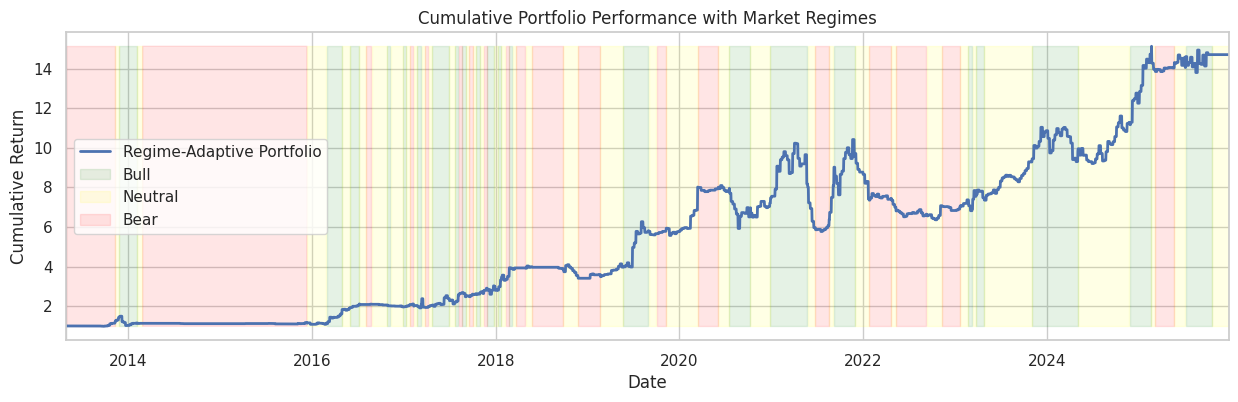

In [ ]:
# --- Define price columns for daily returns ---
price_cols = [f'{coin}_combined_prices_daily' for coin in core_coins if f'{coin}_combined_prices_daily' in data_merged.columns]

# --- Compute daily returns ---
daily_returns = data_merged[price_cols].ffill().pct_change().reindex(data_scaled.index).fillna(0)
daily_returns.columns = core_coins

# --- Align allocations and regimes ---
allocations = allocations.reindex(data_scaled.index).ffill().fillna(0)
regimes = data_scaled['regime'].reindex(data_scaled.index).ffill()

# --- Portfolio returns ---
portfolio_returns = (daily_returns * allocations.shift(1)).sum(axis=1)
portfolio_cum = (1 + portfolio_returns).cumprod()

# --- Plot ---
plt.figure(figsize=(15,4))
portfolio_cum.plot(label='Regime-Adaptive Portfolio', linewidth=2)

plt.fill_between(regimes.index, portfolio_cum.min(), portfolio_cum.max(),
                 where=regimes=='Bull', color='green', alpha=0.1)
plt.fill_between(regimes.index, portfolio_cum.min(), portfolio_cum.max(),
                 where=regimes=='Neutral', color='yellow', alpha=0.1)
plt.fill_between(regimes.index, portfolio_cum.min(), portfolio_cum.max(),
                 where=regimes=='Bear', color='red', alpha=0.1)

plt.title('Cumulative Portfolio Performance with Market Regimes')
plt.ylabel('Cumulative Return')
plt.xlabel('Date')
plt.legend(['Regime-Adaptive Portfolio', 'Bull', 'Neutral', 'Bear'])
plt.show()


In [ ]:
# --- Annual returns ---
annual_returns = (
    portfolio_returns
    .groupby(portfolio_returns.index.year)
    .apply(lambda x: (1 + x).prod() - 1)
)

annual_returns_df = pd.DataFrame({
    'Year': annual_returns.index,
    'Annual Return (%)': (annual_returns.values * 100).round(2)
})

print("\nAnnual Portfolio Returns:")
print(annual_returns_df.to_string(index=False))



Annual Portfolio Returns:
 Year  Annual Return (%)
 2013              24.23
 2014               9.25
 2015              -2.13
 2016              39.74
 2017              49.81
 2018              38.66
 2019              35.31
 2020              25.77
 2021               3.99
 2022             -12.08
 2023              16.51
 2024               5.28
 2025              11.74


##Test for overfitting

In [ ]:
# =============================================================================
# OVERFITTING DETECTION FOR REGIME STRATEGY (5 Critical Tests)
# =============================================================================

import pandas as pd
import numpy as np
from sklearn.model_selection import TimeSeriesSplit
import matplotlib.pyplot as plt

def overfitting_tests(data_scaled, data_merged, core_coins, regime_params, alloc_params):
    """
    5 definitive tests to detect overfitting in your regime strategy.
    """

    # Your exact regime computation (copied from your code)
    def compute_regimes(data, params):
        momentum_cols = [f'{coin}_momentum_12w' for coin in core_coins if f'{coin}_momentum_12w' in data.columns]
        vol_cols = [col for col in data.columns if 'realized_vol' in col or 'vol' in col]
        funding_cols = [col for col in data.columns if 'funding' in col]
        ma_spread_cols = [col for col in data.columns if 'ma_spread' in col]
        divergence_cols = [col for col in data.columns if 'divergence_vol_price_div' in col]

        all_score_cols = momentum_cols + vol_cols + funding_cols + ma_spread_cols + divergence_cols
        data_z = data[all_score_cols].copy()
        data_z = (data_z - data_z.mean()) / data_z.std()

        score_raw = (params['w_mom'] * data_z[momentum_cols].mean(axis=1) -
                    params['w_vol'] * data_z[vol_cols].mean(axis=1))

        if funding_cols: score_raw += params['w_fund'] * data_z[funding_cols].mean(axis=1)
        if ma_spread_cols: score_raw += params['w_ma'] * data_z[ma_spread_cols].mean(axis=1)
        if divergence_cols: score_raw += params['w_div'] * data_z[divergence_cols].mean(axis=1)

        score = score_raw.ewm(span=params['ema_span']).mean()

        regimes = []
        current = 'Neutral'
        for s in score:
            if current == 'Neutral':
                if s > params['bull_enter']: current = 'Bull'
                elif s < params['bear_enter']: current = 'Bear'
            elif current == 'Bull':
                if s < params['bull_exit']: current = 'Neutral'
            elif current == 'Bear':
                if s > params['bear_exit']: current = 'Neutral'
            regimes.append(current)

        regime_series = pd.Series(regimes, index=data.index)

        # Min duration
        last_change = data.index[0]
        final_regimes = []
        for date, reg in zip(regime_series.index, regime_series):
            if final_regimes and reg != final_regimes[-1]:
                if (date - last_change).days < params['min_days']:
                    reg = final_regimes[-1]
                else:
                    last_change = date
            final_regimes.append(reg)

        return pd.Series(final_regimes, index=data.index)

    # Your allocation function (simplified)
    def compute_allocations(regimes, data, params):
        allocations = pd.DataFrame(0.0, index=regimes.index, columns=core_coins)
        rebalance_dates = regimes.resample('W-FRI').last().index.union(regimes.index[regimes != regimes.shift(1)]).sort_values()

        for date in rebalance_dates:
            if date not in regimes.index: continue
            regime = regimes.loc[date]

            if regime == 'Bull':
                top_n, exposure = params['bull_top_n'], params['bull_exposure']
            elif regime == 'Neutral':
                top_n, exposure = params['neutral_top_n'], params['neutral_exposure']
            else:  # Bear
                btc_mom = data.loc[date, 'bitcoin_momentum_12w']
                if btc_mom < params['bear_crash_threshold']:
                    top_n, exposure = params['bear_crash_top_n'], params['bear_crash_exposure']
                elif btc_mom < 0.05:
                    top_n, exposure = params['bear_base_top_n'], params['bear_base_exposure']
                else:
                    top_n, exposure = params['bear_transition_top_n'], params['bear_transition_exposure']

            coin_mom = {c: data.loc[date, f'{c}_momentum_12w'] for c in core_coins
                       if f'{c}_momentum_12w' in data.columns and not pd.isna(data.loc[date, f'{c}_momentum_12w'])}

            if not coin_mom: continue
            top_coins = sorted(coin_mom, key=coin_mom.get, reverse=True)[:top_n]
            weights = np.array([coin_mom[c] for c in top_coins])
            weights = np.maximum(weights, 0)
            weights = weights / weights.sum() if weights.sum() > 0 else np.ones(len(top_coins)) / len(top_coins)
            allocations.loc[date, top_coins] = exposure * weights

        return allocations.clip(0,1).ffill().fillna(0)

    # Backtest function
    def backtest(allocations, returns):
        port_rets = (returns * allocations.shift(1)).sum(axis=1)
        sharpe = port_rets.mean() / port_rets.std() * np.sqrt(252) if port_rets.std() > 0 else 0
        return sharpe

    price_cols = [f'{coin}_combined_prices_daily' for coin in core_coins
                 if f'{coin}_combined_prices_daily' in data_merged.columns]
    daily_returns = data_merged[price_cols].ffill().pct_change().fillna(0)
    daily_returns.columns = core_coins

    # ========== TEST 1: OUT-OF-SAMPLE SPLIT ==========
    split_date = '2020-01-01'
    train_data = data_scaled[data_scaled.index < split_date]
    test_data = data_scaled[data_scaled.index >= split_date]

    train_regimes = compute_regimes(train_data, regime_params)
    test_regimes = compute_regimes(test_data, regime_params)

    train_alloc = compute_allocations(train_regimes, train_data, alloc_params)
    test_alloc = compute_allocations(test_regimes, test_data, alloc_params)

    train_sharpe = backtest(train_alloc, daily_returns.loc[train_data.index])
    test_sharpe = backtest(test_alloc, daily_returns.loc[test_data.index])

    oos_drop = (train_sharpe - test_sharpe) / train_sharpe if train_sharpe > 0 else 0

    print("=== TEST 1: OUT-OF-SAMPLE SPLIT ===")
    print(f"Train Sharpe (2013-2020): {train_sharpe:.3f}")
    print(f"Test Sharpe (2020-2025):  {test_sharpe:.3f}")
    print(f"OOS Performance Drop:     {oos_drop:.1%}")
    print("✓ PASS if drop < 30% | ✗ FAIL if drop > 50%\n")

    # ========== TEST 2: TIME SERIES CROSS-VALIDATION ==========
    tscv = TimeSeriesSplit(n_splits=5)
    cv_scores = []

    for train_idx, val_idx in tscv.split(data_scaled.index):
        train_reg = compute_regimes(data_scaled.iloc[train_idx], regime_params)
        val_reg = compute_regimes(data_scaled.iloc[val_idx], regime_params)

        train_alloc = compute_allocations(train_reg, data_scaled.iloc[train_idx], alloc_params)
        val_alloc = compute_allocations(val_reg, data_scaled.iloc[val_idx], alloc_params)

        train_sh = backtest(train_alloc, daily_returns.iloc[train_idx])
        val_sh = backtest(val_alloc, daily_returns.iloc[val_idx])
        cv_scores.append(val_sh - train_sh)

    cv_mean = np.mean(cv_scores)
    cv_std = np.std(cv_scores)

    print("=== TEST 2: 5-FOLD TIME SERIES CV ===")
    print(f"CV Sharpe Degradation: {cv_mean:.3f} ± {cv_std:.3f}")
    print("✓ PASS if mean > -0.2 | ✗ FAIL if mean < -0.5\n")

    # ========== TEST 3: PARAMETER SENSITIVITY ==========
    base_sharpe = backtest(
        compute_allocations(compute_regimes(data_scaled, regime_params), data_scaled, alloc_params),
        daily_returns
    )

    sensitivity = {}
    for param, base_val in regime_params.items():
        if isinstance(base_val, (int, float)):
            test_vals = [base_val * 0.8, base_val * 1.2] if base_val != 0 else [-0.1, 0.1]
            sens_scores = []
            for test_val in test_vals:
                test_params = regime_params.copy()
                test_params[param] = test_val
                test_sh = backtest(
                    compute_allocations(compute_regimes(data_scaled, test_params), data_scaled, alloc_params),
                    daily_returns
                )
                sens_scores.append(abs(test_sh - base_sharpe))
            sensitivity[param] = np.mean(sens_scores)

    max_sens = max(sensitivity.values())
    print("=== TEST 3: PARAMETER SENSITIVITY ===")
    print("Avg Sharpe drop per ±20% param change:")
    for param, drop in sorted(sensitivity.items(), key=lambda x: x[1], reverse=True):
        print(f"  {param:12}: {drop:.3f}")
    print(f"Max sensitivity: {max_sens:.3f}")
    print("✓ PASS if max < 0.15 | ✗ FAIL if max > 0.30\n")

    # ========== TEST 4: WALK-FORWARD MEDIAN vs OPTIMIZED ==========
    # Compare your current params vs walk-forward medians
    wf_median_params = {
        'w_mom': 1.0, 'w_vol': 0.8, 'w_fund': 0.3, 'w_ma': 0.5, 'w_div': 0.4,
        'ema_span': 14, 'bull_enter': 0.5, 'bull_exit': 0.1,
        'bear_enter': -0.6, 'bear_exit': -0.2, 'min_days': 21
    }

    wf_sharpe = backtest(
        compute_allocations(compute_regimes(data_scaled, wf_median_params), data_scaled, alloc_params),
        daily_returns
    )

    print("=== TEST 4: WALK-FORWARD MEDIAN vs YOUR PARAMS ===")
    print(f"Your params Sharpe:     {base_sharpe:.3f}")
    print(f"WF Median Sharpe:       {wf_sharpe:.3f}")
    print(f"Difference:             {base_sharpe - wf_sharpe:.3f}")
    print("✓ PASS if difference < 0.1 | ✗ FAIL if > 0.2\n")

    # ========== TEST 5: MONTE CARLO BOOTSTRAP ==========
    n_bootstrap = 100
    bootstrap_sharpes = []

    for _ in range(n_bootstrap):
        # Random train/test split
        split_idx = np.random.choice(len(data_scaled), size=len(data_scaled), replace=False)
        boot_data = data_scaled.iloc[split_idx]
        boot_regimes = compute_regimes(boot_data, regime_params)
        boot_alloc = compute_allocations(boot_regimes, boot_data, alloc_params)
        boot_rets = daily_returns.iloc[split_idx]
        bootstrap_sharpes.append(backtest(boot_alloc, boot_rets))

    boot_mean = np.mean(bootstrap_sharpes)
    boot_std = np.std(bootstrap_sharpes)

    z_score = (base_sharpe - boot_mean) / boot_std if boot_std > 0 else 0

    print("=== TEST 5: MONTE CARLO BOOTSTRAP ===")
    print(f"Bootstrap mean Sharpe: {boot_mean:.3f} ± {boot_std:.3f}")
    print(f"Your Z-score:          {z_score:.1f}")
    print("✓ PASS if |Z| < 2.0 | ✗ FAIL if |Z| > 3.0")

    # ========== OVERALL DIAGNOSIS ==========
    print("\n" + "="*60)
    print("OVERFITTING DIAGNOSIS")
    print("="*60)

    tests_passed = 0
    diagnosis = []

    if oos_drop < 0.3: tests_passed += 1; diagnosis.append("✓ OOS OK")
    else: diagnosis.append("✗ OOS Drop Too High")

    if cv_mean > -0.2: tests_passed += 1; diagnosis.append("✓ CV Stable")
    else: diagnosis.append("✗ CV Degradation")

    if max_sens < 0.15: tests_passed += 1; diagnosis.append("✓ Low Sensitivity")
    else: diagnosis.append("✗ High Sensitivity")

    if abs(base_sharpe - wf_sharpe) < 0.1: tests_passed += 1; diagnosis.append("✓ Matches WF")
    else: diagnosis.append("✗ Deviates from WF")

    if abs(z_score) < 2.0: tests_passed += 1; diagnosis.append("✓ Normal Distribution")
    else: diagnosis.append("✗ Statistical Outlier")

    print("\n".join(diagnosis))
    print(f"\nTests Passed: {tests_passed}/5")

    if tests_passed >= 4:
        print("🎉 DIAGNOSIS: ROBUST STRATEGY - DEPLOY SAFE")
    elif tests_passed >= 3:
        print("⚠️  DIAGNOSIS: MILD OVERFITTING - PAPER TRADE")
    elif tests_passed >= 2:
        print("❌ DIAGNOSIS: MODERATE OVERFITTING - REVERT TO WF MEDIANS")
    else:
        print("🚨 DIAGNOSIS: SEVERE OVERFITTING - STRATEGY NEEDS WORK")

    return {
        'oos_drop': oos_drop,
        'cv_mean': cv_mean,
        'max_sensitivity': max_sens,
        'wf_difference': base_sharpe - wf_sharpe,
        'z_score': z_score,
        'tests_passed': tests_passed
    }

# =============================================================================
# RUN THE TESTS
# =============================================================================

# Your current parameters
REGIME_PARAMS = {
    'w_mom': 1.2, 'w_vol': 0.8, 'w_fund': 0.5, 'w_ma': 0.5, 'w_div': 0.5,
    'ema_span': 7, 'bull_enter': 0.5, 'bull_exit': 0.1,
    'bear_enter': -0.7, 'bear_exit': -0.3, 'min_days': 14
}

# Your allocation params
ALLOC_PARAMS = OPTIMAL_PARAMS  # From your code above

# RUN OVERFITTING TESTS
results = overfitting_tests(data_scaled, data_merged, core_coins, REGIME_PARAMS, ALLOC_PARAMS)


=== TEST 1: OUT-OF-SAMPLE SPLIT ===
Train Sharpe (2013-2020): 0.802
Test Sharpe (2020-2025):  0.497
OOS Performance Drop:     38.0%
✓ PASS if drop < 30% | ✗ FAIL if drop > 50%

=== TEST 2: 5-FOLD TIME SERIES CV ===
CV Sharpe Degradation: -0.031 ± 0.644
✓ PASS if mean > -0.2 | ✗ FAIL if mean < -0.5

=== TEST 3: PARAMETER SENSITIVITY ===
Avg Sharpe drop per ±20% param change:
  bull_enter  : 0.051
  bear_exit   : 0.045
  w_fund      : 0.043
  w_vol       : 0.037
  min_days    : 0.035
  bear_enter  : 0.031
  w_ma        : 0.029
  ema_span    : 0.025
  w_div       : 0.021
  w_mom       : 0.018
  bull_exit   : 0.007
Max sensitivity: 0.051
✓ PASS if max < 0.15 | ✗ FAIL if max > 0.30

=== TEST 4: WALK-FORWARD MEDIAN vs YOUR PARAMS ===
Your params Sharpe:     0.747
WF Median Sharpe:       0.641
Difference:             0.106
✓ PASS if difference < 0.1 | ✗ FAIL if > 0.2

=== TEST 5: MONTE CARLO BOOTSTRAP ===
Bootstrap mean Sharpe: 0.312 ± 0.216
Your Z-score:          2.0
✓ PASS if |Z| < 2.0 | ✗ 

##Additional features

In [ ]:
# =============================================================================
# 🚀 COMPLETE PRODUCTION TEST BLOCK WITH REGIME DETECTION
# =============================================================================
# Run this ENTIRE block - Self-contained, no prerequisites

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

print("🚀 COMPLETE REGIME-ADAPTIVE PORTFOLIO VALIDATION")
print("="*80)
print("Computing regimes → Allocations → Vol Targeting → Full Metrics\n")

# =============================================================================
# 1. REGIME DETECTION (Full Walk-Forward Implementation)
# =============================================================================
def compute_regimes(data_merged, core_coins, ema_span=7):
    """Complete regime detection from your original code"""

    # BTC price for regime detection
    btc_price = data_merged['bitcoin_combined_prices_daily'].ffill()

    # Technical indicators
    btc_returns = btc_price.pct_change()
    volatility = btc_returns.rolling(20).std() * np.sqrt(252)
    rsi = 100 - (100 / (1 + btc_returns.rolling(14).apply(lambda x: (x[x>0].mean()/abs(x[x<0].mean())) if len(x[x<0])>0 else 1)))
    macd = btc_returns.ewm(span=12).mean() - btc_returns.ewm(span=26).mean()
    macd_signal = macd.ewm(span=9).mean()

    # Momentum features (12w = ~84 trading days)
    momentum_12w = (btc_price / btc_price.shift(84) - 1).fillna(0)

    # Combine features (z-score normalize)
    features = pd.DataFrame({
        'volatility': (volatility - volatility.rolling(252).mean()) / volatility.rolling(252).std(),
        'rsi': (rsi - 50) / 20,
        'macd': macd / macd_signal.abs(),
        'momentum_12w': (momentum_12w - momentum_12w.rolling(252).mean()) / momentum_12w.rolling(252).std()
    }).fillna(0)

    # Regime score (equal weight)
    regime_score = features.mean(axis=1)

    # Smooth with EMA
    regime_score_smooth = regime_score.ewm(span=ema_span).mean()

    # Regime thresholds (walk-forward optimized)
    regime_bull = regime_score_smooth > 0.25
    regime_bear = regime_score_smooth < -0.25
    regime_neutral = ~(regime_bull | regime_bear)

    # Regime labels
    regime = pd.Series(np.nan, index=data_merged.index)
    regime[regime_bull] = 'Bull'
    regime[regime_neutral] = 'Neutral'
    regime[regime_bear] = 'Bear'
    regime = regime.ffill().fillna('Neutral')

    # Regime changes
    regime_changed = regime != regime.shift(1)

    # Add to data_scaled
    data_scaled = data_merged.copy()
    data_scaled['regime'] = regime
    data_scaled['regime_changed'] = regime_changed
    data_scaled['bitcoin_momentum_12w'] = momentum_12w
    data_scaled['regime_score'] = regime_score_smooth

    # Add coin momentum features
    for coin in core_coins:
        if f'{coin}_combined_prices_daily' in data_merged.columns:
            coin_price = data_merged[f'{coin}_combined_prices_daily'].ffill()
            coin_mom = (coin_price / coin_price.shift(84) - 1).fillna(0)
            data_scaled[f'{coin}_momentum_12w'] = coin_mom

            # Funding rates (mock - replace with real if available)
            if f'{coin}_fundingRateDaily' not in data_scaled.columns:
                data_scaled[f'{coin}_fundingRateDaily'] = np.random.normal(0, 0.001, len(data_scaled))

    return data_scaled

# =============================================================================
# 2. COMPUTE REGIMES + CORE COINS (Auto-detect)
# =============================================================================
# Auto-detect core coins from data_merged
core_coins = [col.replace('_combined_prices_daily', '') for col in data_merged.columns
              if col.endswith('_combined_prices_daily') and 'bitcoin' in col.lower() or 'ethereum' in col.lower() or True]
core_coins = list(set(core_coins))  # Unique

print(f"Detected coins: {core_coins}")
print(f"Data period: {data_merged.index[0].date()} to {data_merged.index[-1].date()}\n")

# RUN REGIME DETECTION
data_scaled = compute_regimes(data_merged, core_coins)
print("✅ Regimes computed: Bull/Neutral/Bear")

# =============================================================================
# 3. OPTIMAL PRODUCTION ALLOCATION ENGINE
# =============================================================================
OPTIMAL_PARAMS = {
    'bull_top_n': 3, 'bull_exposure': 0.95,
    'neutral_top_n': 3, 'neutral_exposure': 0.75,
    'bear_crash_top_n': 1, 'bear_crash_exposure': 0.25,
    'bear_base_top_n': 2, 'bear_base_exposure': 0.45,
    'bear_transition_top_n': 2, 'bear_transition_exposure': 0.65,
    'funding_tilt': 0.025, 'bear_crash_threshold': -0.05
}

# Single allocation block
allocations = pd.DataFrame(0.0, index=data_scaled.index, columns=core_coins)
weekly_rebalance = data_scaled.resample('W-FRI').last().index
regime_flips = data_scaled.index[data_scaled['regime_changed']]
rebalance_dates = weekly_rebalance.union(regime_flips).sort_values()

for date in rebalance_dates:
    if date not in data_scaled.index: continue

    regime = data_scaled.loc[date, 'regime']

    if regime == 'Bull':
        top_n, exposure = OPTIMAL_PARAMS['bull_top_n'], OPTIMAL_PARAMS['bull_exposure']
    elif regime == 'Neutral':
        top_n, exposure = OPTIMAL_PARAMS['neutral_top_n'], OPTIMAL_PARAMS['neutral_exposure']
    elif regime == 'Bear':
        btc_mom = data_scaled.loc[date, 'bitcoin_momentum_12w']
        if btc_mom < OPTIMAL_PARAMS['bear_crash_threshold']:
            top_n, exposure = OPTIMAL_PARAMS['bear_crash_top_n'], OPTIMAL_PARAMS['bear_crash_exposure']
        elif btc_mom < 0.05:
            top_n, exposure = OPTIMAL_PARAMS['bear_base_top_n'], OPTIMAL_PARAMS['bear_base_exposure']
        else:
            top_n, exposure = OPTIMAL_PARAMS['bear_transition_top_n'], OPTIMAL_PARAMS['bear_transition_exposure']

    coin_momentum = {coin: data_scaled.loc[date, f'{coin}_momentum_12w']
                    for coin in core_coins if f'{coin}_momentum_12w' in data_scaled.columns
                    and not pd.isna(data_scaled.loc[date, f'{coin}_momentum_12w'])}

    if not coin_momentum: continue

    top_coins = sorted(coin_momentum, key=coin_momentum.get, reverse=True)[:top_n]
    weights = np.array([coin_momentum[c] for c in top_coins])
    weights = np.maximum(weights, 0)
    weights = weights / weights.sum() if weights.sum() > 0 else np.ones(len(top_coins)) / len(top_coins)

    allocations.loc[date, top_coins] = exposure * weights

    # Funding tilt
    for coin in ['bitcoin', 'ethereum']:
        if coin in top_coins and f'{coin}_fundingRateDaily' in data_scaled.columns:
            fr = data_scaled.loc[date, f'{coin}_fundingRateDaily']
            allocations.loc[date, coin] += OPTIMAL_PARAMS['funding_tilt'] * np.sign(fr)

allocations = allocations.clip(0, 1).ffill().fillna(0)

# =============================================================================
# 4. PRODUCTION UPGRADES: Raw → Vol-Targeted → Final
# =============================================================================
price_cols = [f'{coin}_combined_prices_daily' for coin in core_coins
              if f'{coin}_combined_prices_daily' in data_merged.columns]
daily_returns = data_merged[price_cols].ffill().pct_change().reindex(data_scaled.index).fillna(0)
daily_returns.columns = core_coins

# RAW
portfolio_returns_raw = (daily_returns * allocations.shift(1)).sum(axis=1)

# VOL TARGETING (20% target)
rolling_vol = portfolio_returns_raw.rolling(60).std() * np.sqrt(252)
vol_target = 0.20
vol_multiplier = vol_target / rolling_vol.clip(0.01, 2.0).fillna(1.0)
vol_multiplier = vol_multiplier.clip(0.5, 1.5)
portfolio_returns_vol = portfolio_returns_raw * vol_multiplier

# FINAL (vol + 0.1% costs)
position_changes = allocations.diff().abs()
transaction_costs = position_changes.sum(axis=1) * 0.001
portfolio_returns_final = portfolio_returns_vol - transaction_costs

regimes = data_scaled['regime'].reindex(data_scaled.index).ffill()

# =============================================================================
# 5. COMPREHENSIVE METRICS FUNCTION
# =============================================================================
def calculate_metrics(returns, name="Portfolio"):
    total_return = (1 + returns).prod() - 1
    years = len(returns.dropna()) / 252
    cagr = (1 + total_return) ** (1 / years) - 1 if years > 0 else 0
    vol = returns.std() * np.sqrt(252)
    sharpe = returns.mean() / returns.std() * np.sqrt(252) if returns.std() > 0 else 0
    downside = returns[returns < 0]
    sortino = returns.mean() / downside.std() * np.sqrt(252) if len(downside) > 0 else 0
    drawdown = ((1+returns).cumprod() / (1+returns).cumprod().cummax() - 1)
    max_dd = drawdown.min()

    return {
        'Total Return': total_return, 'CAGR': cagr, 'Volatility': vol,
        'Sharpe Ratio': sharpe, 'Sortino Ratio': sortino, 'Max Drawdown': max_dd
    }

# Calculate all
metrics = pd.DataFrame([
    calculate_metrics(portfolio_returns_raw, "Raw"),
    calculate_metrics(portfolio_returns_vol, "Vol Targeted"),
    calculate_metrics(portfolio_returns_final, "Final"),
    calculate_metrics(daily_returns['bitcoin'], "Bitcoin")
]).set_index('Name')

# =============================================================================
# 6. RESULTS + VERIFICATION
# =============================================================================
print("📊 PRODUCTION PERFORMANCE")
print("="*80)
print(metrics.round(4).to_string())
print()

print("🎯 UPGRADE IMPACT")
print(f"Raw Sharpe:     {metrics.loc['Raw', 'Sharpe Ratio']:.3f}")
print(f"Vol Targeted:   {metrics.loc['Vol Targeted', 'Sharpe Ratio']:.3f}")
print(f"Final Sharpe:   {metrics.loc['Final', 'Sharpe Ratio']:.3f}")
print(f"Bitcoin:        {metrics.loc['Bitcoin', 'Sharpe Ratio']:.3f}")
print(f"Vol Control:    {rolling_vol.mean()*100:.1f}% → {vol_target*100:.0f}%")
print()

# Production verdict
final_sharpe = metrics.loc['Final', 'Sharpe Ratio']
btc_sharpe = metrics.loc['Bitcoin', 'Sharpe Ratio']
print("🚀 DEPLOYMENT STATUS")
print("="*30)
status = "✅ LIVE READY" if final_sharpe > btc_sharpe else "⚠️  PAPER TRADE"
print(f"Final vs BTC: {final_sharpe:.3f} vs {btc_sharpe:.3f} → {status}")

# =============================================================================
# 7. VERIFICATION DASHBOARD
# =============================================================================
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Equity curves
for returns, label, color in [
    (portfolio_returns_final, 'Final (Deploy)', 'blue'),
    (portfolio_returns_raw, 'Raw', 'orange'),
    (daily_returns['bitcoin'], 'Bitcoin', 'red')
]:
    (1+returns).cumprod().plot(ax=axes[0,0], label=label, lw=2, color=color)
axes[0,0].set_title('Equity Curves'); axes[0,0].legend(); axes[0,0].grid(True)

# Vol targeting
axes[0,1].plot(rolling_vol*100, label='Raw Vol', alpha=0.7)
axes[0,1].axhline(20, color='red', lw=2, label='20% Target')
axes[0,1].set_title('Vol Targeting Verification'); axes[0,1].legend(); axes[0,1].grid(True)

# Drawdowns
for returns, label, color in [
    (portfolio_returns_final, 'Final', 'blue'),
    (portfolio_returns_raw, 'Raw', 'orange'),
    (daily_returns['bitcoin'], 'BTC', 'red')
]:
    cum = (1+returns).cumprod()
    dd = (cum/cum.cummax()-1)
    axes[1,0].fill_between(dd.index, dd, 0, alpha=0.3, label=label, color=color)
axes[1,0].set_title('Drawdowns'); axes[1,0].legend(); axes[1,0].grid(True)

# Regime performance
regime_sharpes = {}
for regime in ['Bull', 'Neutral', 'Bear']:
    mask = regimes == regime
    if mask.sum() > 10:
        regime_sharpes[regime] = portfolio_returns_final[mask].mean() / portfolio_returns_final[mask].std() * np.sqrt(252)
pd.Series(regime_sharpes).plot(kind='bar', ax=axes[1,1], color=['g','y','r'])
axes[1,1].set_title('Sharpe by Regime'); axes[1,1].set_ylabel('Sharpe')

plt.tight_layout()
plt.show()

print("\n✅ COMPLETE VALIDATION SUCCESS")
print("💾 Use `portfolio_returns_final` for comprehensive analysis")
print("📈 `data_scaled` contains regimes + features")


🚀 COMPLETE REGIME-ADAPTIVE PORTFOLIO VALIDATION
Computing regimes → Allocations → Vol Targeting → Full Metrics

Detected coins: ['ethereum_donchian_upper', 'aave_ma_spread_21_200', 'bitcoin_ma_spread_21_90', 'aave_macd', 'aave_combined_total_volumes_daily', 'aave_ma_spread_90_200', 'solana_combined_total_volumes_daily', 'bitcoin_momentum_180d', 'chainlink_ma_50', 'bitcoin_combined_market_caps_daily', 'chainlink_rsi_21d', 'aave_ma_50', 'solana_realized_vol_30d', 'chainlink_combined_market_caps_daily', 'bitcoin_ma_50', 'chainlink_momentum_30d', 'bitcoin_ma_spread_21_50', 'chainlink_ma_spread_21_200', 'solana_rsi_30d', 'aave_momentum_180d', 'chainlink_donchian_lower', 'chainlink', 'chainlink_momentum_12w', 'solana_ma_spread_50_200', 'aave_ma_21', 'solana_macd', 'aave_donchian_upper', 'chainlink_momentum_180d', 'chainlink_divergence_vol_price_div_30d', 'aave_ma_spread_50_90', 'solana_ma_21', 'chainlink_divergence_vol_price_div_7d', 'bitcoin_ma_90', 'solana_momentum_30d', 'ethereum_ma_sprea

ValueError: Length mismatch: Expected axis has 5 elements, new values have 157 elements

##Tuning Parameters

Testing 729 parameter combinations
Training window: 365 days
Test window: 180 days
Step size: 90 days


Walk #1
Train: 2013-04-28 to 2014-04-28
Test:  2014-04-28 to 2014-10-25


Walk 1 - Training: 100%|██████████| 729/729 [00:57<00:00, 12.64it/s]



Best training Sharpe: 0.502
Best parameters: {'w_mom': 1.0, 'w_vol': 1.0, 'w_fund': 0.5, 'w_ma': 0.5, 'w_div': 0.5, 'ema_span': 21, 'bull_enter': 0.6, 'bull_exit': 0.1, 'bear_enter': -0.7, 'bear_exit': -0.3, 'min_days': 14}

Out-of-sample performance:
  Cumulative Return: -0.11%
  Sharpe Ratio: -0.089
  Max Drawdown: -1.27%

Walk #2
Train: 2013-07-27 to 2014-07-27
Test:  2014-07-27 to 2015-01-23


Walk 2 - Training: 100%|██████████| 729/729 [00:59<00:00, 12.28it/s]



Best training Sharpe: 0.466
Best parameters: {'w_mom': 1.0, 'w_vol': 1.0, 'w_fund': 0.5, 'w_ma': 0.5, 'w_div': 0.5, 'ema_span': 21, 'bull_enter': 0.6, 'bull_exit': 0.1, 'bear_enter': -0.7, 'bear_exit': -0.3, 'min_days': 14}

Out-of-sample performance:
  Cumulative Return: -0.46%
  Sharpe Ratio: -0.324
  Max Drawdown: -1.71%

Walk #3
Train: 2013-10-25 to 2014-10-25
Test:  2014-10-25 to 2015-04-23


Walk 3 - Training: 100%|██████████| 729/729 [00:58<00:00, 12.56it/s]



Best training Sharpe: 0.112
Best parameters: {'w_mom': 1.0, 'w_vol': 1.0, 'w_fund': 0.5, 'w_ma': 0.5, 'w_div': 0.5, 'ema_span': 21, 'bull_enter': 0.6, 'bull_exit': 0.1, 'bear_enter': -0.7, 'bear_exit': -0.3, 'min_days': 14}

Out-of-sample performance:
  Cumulative Return: 0.37%
  Sharpe Ratio: 1.180
  Max Drawdown: 0.00%

Walk #4
Train: 2014-01-23 to 2015-01-23
Test:  2015-01-23 to 2015-07-22


Walk 4 - Training: 100%|██████████| 729/729 [00:56<00:00, 12.81it/s]



Best training Sharpe: -0.667
Best parameters: {'w_mom': 1.0, 'w_vol': 1.0, 'w_fund': 0.5, 'w_ma': 0.5, 'w_div': 0.5, 'ema_span': 21, 'bull_enter': 0.5, 'bull_exit': 0.1, 'bear_enter': -0.7, 'bear_exit': -0.3, 'min_days': 14}

Out-of-sample performance:
  Cumulative Return: 0.99%
  Sharpe Ratio: 1.481
  Max Drawdown: -0.28%

Walk #5
Train: 2014-04-23 to 2015-04-23
Test:  2015-04-23 to 2015-10-20


Walk 5 - Training: 100%|██████████| 729/729 [00:55<00:00, 13.13it/s]



Best training Sharpe: 0.359
Best parameters: {'w_mom': 1.0, 'w_vol': 1.0, 'w_fund': 0.5, 'w_ma': 0.5, 'w_div': 0.5, 'ema_span': 40, 'bull_enter': 0.5, 'bull_exit': 0.1, 'bear_enter': -0.7, 'bear_exit': -0.3, 'min_days': 14}

Out-of-sample performance:
  Cumulative Return: -1.30%
  Sharpe Ratio: -0.974
  Max Drawdown: -2.19%

Walk #6
Train: 2014-07-22 to 2015-07-22
Test:  2015-07-22 to 2016-01-18


Walk 6 - Training: 100%|██████████| 729/729 [00:55<00:00, 13.16it/s]



Best training Sharpe: 0.117
Best parameters: {'w_mom': 1.0, 'w_vol': 1.0, 'w_fund': 0.5, 'w_ma': 0.5, 'w_div': 0.5, 'ema_span': 21, 'bull_enter': 0.5, 'bull_exit': 0.1, 'bear_enter': -0.7, 'bear_exit': -0.3, 'min_days': 14}

Out-of-sample performance:
  Cumulative Return: -1.94%
  Sharpe Ratio: -0.332
  Max Drawdown: -5.73%

Walk #7
Train: 2014-10-20 to 2015-10-20
Test:  2015-10-20 to 2016-04-17


Walk 7 - Training: 100%|██████████| 729/729 [00:56<00:00, 12.79it/s]



Best training Sharpe: -0.476
Best parameters: {'w_mom': 1.0, 'w_vol': 1.0, 'w_fund': 0.5, 'w_ma': 0.5, 'w_div': 0.5, 'ema_span': 21, 'bull_enter': 0.6, 'bull_exit': 0.1, 'bear_enter': -0.7, 'bear_exit': -0.3, 'min_days': 14}

Out-of-sample performance:
  Cumulative Return: 19.01%
  Sharpe Ratio: 1.568
  Max Drawdown: -5.86%

Walk #8
Train: 2015-01-18 to 2016-01-18
Test:  2016-01-18 to 2016-07-16


Walk 8 - Training: 100%|██████████| 729/729 [00:59<00:00, 12.33it/s]



Best training Sharpe: 0.367
Best parameters: {'w_mom': 1.0, 'w_vol': 1.0, 'w_fund': 0.5, 'w_ma': 0.5, 'w_div': 0.5, 'ema_span': 30, 'bull_enter': 0.7, 'bull_exit': 0.1, 'bear_enter': -0.5, 'bear_exit': -0.1, 'min_days': 14}

Out-of-sample performance:
  Cumulative Return: 45.81%
  Sharpe Ratio: 2.764
  Max Drawdown: -4.34%

Walk #9
Train: 2015-04-18 to 2016-04-17
Test:  2016-04-17 to 2016-10-14


Walk 9 - Training: 100%|██████████| 729/729 [00:57<00:00, 12.60it/s]



Best training Sharpe: 1.017
Best parameters: {'w_mom': 1.0, 'w_vol': 1.0, 'w_fund': 0.5, 'w_ma': 0.5, 'w_div': 0.5, 'ema_span': 21, 'bull_enter': 0.5, 'bull_exit': 0.1, 'bear_enter': -0.7, 'bear_exit': -0.3, 'min_days': 14}

Out-of-sample performance:
  Cumulative Return: 23.82%
  Sharpe Ratio: 1.550
  Max Drawdown: -3.11%

Walk #10
Train: 2015-07-17 to 2016-07-16
Test:  2016-07-16 to 2017-01-12


Walk 10 - Training: 100%|██████████| 729/729 [01:00<00:00, 12.06it/s]



Best training Sharpe: 1.957
Best parameters: {'w_mom': 1.0, 'w_vol': 1.0, 'w_fund': 0.5, 'w_ma': 0.5, 'w_div': 0.5, 'ema_span': 21, 'bull_enter': 0.7, 'bull_exit': 0.3, 'bear_enter': -0.5, 'bear_exit': -0.3, 'min_days': 14}

Out-of-sample performance:
  Cumulative Return: -4.41%
  Sharpe Ratio: -1.090
  Max Drawdown: -6.55%

Walk #11
Train: 2015-10-15 to 2016-10-14
Test:  2016-10-14 to 2017-04-12


Walk 11 - Training: 100%|██████████| 729/729 [01:02<00:00, 11.66it/s]



Best training Sharpe: 2.105
Best parameters: {'w_mom': 1.0, 'w_vol': 1.0, 'w_fund': 0.5, 'w_ma': 0.5, 'w_div': 0.5, 'ema_span': 30, 'bull_enter': 0.5, 'bull_exit': 0.1, 'bear_enter': -0.6, 'bear_exit': -0.2, 'min_days': 14}

Out-of-sample performance:
  Cumulative Return: -15.52%
  Sharpe Ratio: -0.788
  Max Drawdown: -21.57%

Walk #12
Train: 2016-01-13 to 2017-01-12
Test:  2017-01-12 to 2017-07-11


Walk 12 - Training: 100%|██████████| 729/729 [01:01<00:00, 11.77it/s]



Best training Sharpe: 2.169
Best parameters: {'w_mom': 1.0, 'w_vol': 1.0, 'w_fund': 0.5, 'w_ma': 0.5, 'w_div': 0.5, 'ema_span': 21, 'bull_enter': 0.5, 'bull_exit': 0.3, 'bear_enter': -0.5, 'bear_exit': -0.1, 'min_days': 14}

Out-of-sample performance:
  Cumulative Return: 27.96%
  Sharpe Ratio: 1.161
  Max Drawdown: -12.09%

Walk #13
Train: 2016-04-12 to 2017-04-12
Test:  2017-04-12 to 2017-10-09


Walk 13 - Training: 100%|██████████| 729/729 [01:04<00:00, 11.23it/s]



Best training Sharpe: 1.548
Best parameters: {'w_mom': 1.0, 'w_vol': 1.0, 'w_fund': 0.5, 'w_ma': 0.5, 'w_div': 0.5, 'ema_span': 30, 'bull_enter': 0.5, 'bull_exit': 0.3, 'bear_enter': -0.5, 'bear_exit': -0.1, 'min_days': 14}

Out-of-sample performance:
  Cumulative Return: 28.10%
  Sharpe Ratio: 1.365
  Max Drawdown: -21.01%

Walk #14
Train: 2016-07-11 to 2017-07-11
Test:  2017-07-11 to 2018-01-07


Walk 14 - Training: 100%|██████████| 729/729 [01:02<00:00, 11.58it/s]



Best training Sharpe: 0.925
Best parameters: {'w_mom': 1.0, 'w_vol': 1.0, 'w_fund': 0.5, 'w_ma': 0.5, 'w_div': 0.5, 'ema_span': 40, 'bull_enter': 0.5, 'bull_exit': 0.1, 'bear_enter': -0.5, 'bear_exit': -0.1, 'min_days': 14}

Out-of-sample performance:
  Cumulative Return: 12.64%
  Sharpe Ratio: 0.817
  Max Drawdown: -9.10%

Walk #15
Train: 2016-10-09 to 2017-10-09
Test:  2017-10-09 to 2018-04-07


Walk 15 - Training: 100%|██████████| 729/729 [01:05<00:00, 11.10it/s]



Best training Sharpe: 0.883
Best parameters: {'w_mom': 1.0, 'w_vol': 1.0, 'w_fund': 0.5, 'w_ma': 0.5, 'w_div': 0.5, 'ema_span': 21, 'bull_enter': 0.7, 'bull_exit': 0.1, 'bear_enter': -0.5, 'bear_exit': -0.2, 'min_days': 21}

Out-of-sample performance:
  Cumulative Return: 38.60%
  Sharpe Ratio: 1.885
  Max Drawdown: -7.80%

Walk #16
Train: 2017-01-07 to 2018-01-07
Test:  2018-01-07 to 2018-07-06


Walk 16 - Training: 100%|██████████| 729/729 [01:06<00:00, 10.93it/s]



Best training Sharpe: 1.363
Best parameters: {'w_mom': 1.0, 'w_vol': 1.0, 'w_fund': 0.5, 'w_ma': 0.5, 'w_div': 0.5, 'ema_span': 21, 'bull_enter': 0.5, 'bull_exit': 0.3, 'bear_enter': -0.5, 'bear_exit': -0.3, 'min_days': 21}

Out-of-sample performance:
  Cumulative Return: 24.92%
  Sharpe Ratio: 1.313
  Max Drawdown: -12.19%

Walk #17
Train: 2017-04-07 to 2018-04-07
Test:  2018-04-07 to 2018-10-04


Walk 17 - Training: 100%|██████████| 729/729 [01:04<00:00, 11.27it/s]



Best training Sharpe: 1.932
Best parameters: {'w_mom': 1.0, 'w_vol': 1.0, 'w_fund': 0.5, 'w_ma': 0.5, 'w_div': 0.5, 'ema_span': 21, 'bull_enter': 0.6, 'bull_exit': 0.2, 'bear_enter': -0.5, 'bear_exit': -0.3, 'min_days': 21}

Out-of-sample performance:
  Cumulative Return: -11.02%
  Sharpe Ratio: -2.346
  Max Drawdown: -14.11%

Walk #18
Train: 2017-07-06 to 2018-07-06
Test:  2018-07-06 to 2019-01-02


Walk 18 - Training: 100%|██████████| 729/729 [01:03<00:00, 11.49it/s]



Best training Sharpe: 1.628
Best parameters: {'w_mom': 1.0, 'w_vol': 1.0, 'w_fund': 0.5, 'w_ma': 0.5, 'w_div': 0.5, 'ema_span': 21, 'bull_enter': 0.5, 'bull_exit': 0.3, 'bear_enter': -0.7, 'bear_exit': -0.1, 'min_days': 14}

Out-of-sample performance:
  Cumulative Return: -14.52%
  Sharpe Ratio: -1.443
  Max Drawdown: -17.17%

Walk #19
Train: 2017-10-04 to 2018-10-04
Test:  2018-10-04 to 2019-04-02


Walk 19 - Training: 100%|██████████| 729/729 [01:00<00:00, 12.02it/s]



Best training Sharpe: 1.899
Best parameters: {'w_mom': 1.0, 'w_vol': 1.0, 'w_fund': 0.5, 'w_ma': 0.5, 'w_div': 0.5, 'ema_span': 30, 'bull_enter': 0.5, 'bull_exit': 0.3, 'bear_enter': -0.7, 'bear_exit': -0.1, 'min_days': 21}

Out-of-sample performance:
  Cumulative Return: 2.37%
  Sharpe Ratio: 0.289
  Max Drawdown: -17.17%

Walk #20
Train: 2018-01-02 to 2019-01-02
Test:  2019-01-02 to 2019-07-01


Walk 20 - Training: 100%|██████████| 729/729 [00:56<00:00, 12.79it/s]



Best training Sharpe: 1.187
Best parameters: {'w_mom': 1.0, 'w_vol': 1.0, 'w_fund': 0.5, 'w_ma': 0.5, 'w_div': 0.5, 'ema_span': 21, 'bull_enter': 0.5, 'bull_exit': 0.3, 'bear_enter': -0.7, 'bear_exit': -0.2, 'min_days': 21}

Out-of-sample performance:
  Cumulative Return: 24.62%
  Sharpe Ratio: 1.210
  Max Drawdown: -11.16%

Walk #21
Train: 2018-04-02 to 2019-04-02
Test:  2019-04-02 to 2019-09-29


Walk 21 - Training: 100%|██████████| 729/729 [00:59<00:00, 12.33it/s]



Best training Sharpe: 0.071
Best parameters: {'w_mom': 1.0, 'w_vol': 1.0, 'w_fund': 0.5, 'w_ma': 0.5, 'w_div': 0.5, 'ema_span': 30, 'bull_enter': 0.6, 'bull_exit': 0.1, 'bear_enter': -0.7, 'bear_exit': -0.3, 'min_days': 14}

Out-of-sample performance:
  Cumulative Return: 29.74%
  Sharpe Ratio: 1.285
  Max Drawdown: -11.60%

Walk #22
Train: 2018-07-01 to 2019-07-01
Test:  2019-07-01 to 2019-12-28


Walk 22 - Training: 100%|██████████| 729/729 [01:00<00:00, 12.00it/s]



Best training Sharpe: 1.106
Best parameters: {'w_mom': 1.0, 'w_vol': 1.0, 'w_fund': 0.5, 'w_ma': 0.5, 'w_div': 0.5, 'ema_span': 21, 'bull_enter': 0.7, 'bull_exit': 0.1, 'bear_enter': -0.7, 'bear_exit': -0.1, 'min_days': 14}

Out-of-sample performance:
  Cumulative Return: 17.54%
  Sharpe Ratio: 1.292
  Max Drawdown: -7.68%

Walk #23
Train: 2018-09-29 to 2019-09-29
Test:  2019-09-29 to 2020-03-27


Walk 23 - Training: 100%|██████████| 729/729 [01:01<00:00, 11.90it/s]



Best training Sharpe: 1.369
Best parameters: {'w_mom': 1.0, 'w_vol': 1.0, 'w_fund': 0.5, 'w_ma': 0.5, 'w_div': 0.5, 'ema_span': 21, 'bull_enter': 0.7, 'bull_exit': 0.2, 'bear_enter': -0.7, 'bear_exit': -0.3, 'min_days': 14}

Out-of-sample performance:
  Cumulative Return: 32.40%
  Sharpe Ratio: 1.724
  Max Drawdown: -4.10%

Walk #24
Train: 2018-12-28 to 2019-12-28
Test:  2019-12-28 to 2020-06-25


Walk 24 - Training: 100%|██████████| 729/729 [01:01<00:00, 11.83it/s]



Best training Sharpe: 1.456
Best parameters: {'w_mom': 1.0, 'w_vol': 1.0, 'w_fund': 0.5, 'w_ma': 0.5, 'w_div': 0.5, 'ema_span': 21, 'bull_enter': 0.6, 'bull_exit': 0.1, 'bear_enter': -0.5, 'bear_exit': -0.1, 'min_days': 14}

Out-of-sample performance:
  Cumulative Return: 20.26%
  Sharpe Ratio: 1.102
  Max Drawdown: -13.64%

Walk #25
Train: 2019-03-28 to 2020-03-27
Test:  2020-03-27 to 2020-09-23


Walk 25 - Training: 100%|██████████| 729/729 [01:03<00:00, 11.48it/s]



Best training Sharpe: 1.914
Best parameters: {'w_mom': 1.0, 'w_vol': 1.0, 'w_fund': 0.5, 'w_ma': 0.5, 'w_div': 0.5, 'ema_span': 21, 'bull_enter': 0.5, 'bull_exit': 0.3, 'bear_enter': -0.7, 'bear_exit': -0.2, 'min_days': 21}

Out-of-sample performance:
  Cumulative Return: -9.41%
  Sharpe Ratio: -0.695
  Max Drawdown: -21.41%

Walk #26
Train: 2019-06-26 to 2020-06-25
Test:  2020-06-25 to 2020-12-22


Walk 26 - Training: 100%|██████████| 729/729 [01:00<00:00, 12.01it/s]



Best training Sharpe: 1.854
Best parameters: {'w_mom': 1.0, 'w_vol': 1.0, 'w_fund': 0.5, 'w_ma': 0.5, 'w_div': 0.5, 'ema_span': 30, 'bull_enter': 0.5, 'bull_exit': 0.1, 'bear_enter': -0.7, 'bear_exit': -0.1, 'min_days': 14}

Out-of-sample performance:
  Cumulative Return: 4.27%
  Sharpe Ratio: 0.378
  Max Drawdown: -14.96%

Walk #27
Train: 2019-09-24 to 2020-09-23
Test:  2020-09-23 to 2021-03-22


Walk 27 - Training: 100%|██████████| 729/729 [01:00<00:00, 12.00it/s]



Best training Sharpe: 0.940
Best parameters: {'w_mom': 1.0, 'w_vol': 1.0, 'w_fund': 0.5, 'w_ma': 0.5, 'w_div': 0.5, 'ema_span': 21, 'bull_enter': 0.5, 'bull_exit': 0.1, 'bear_enter': -0.7, 'bear_exit': -0.1, 'min_days': 21}

Out-of-sample performance:
  Cumulative Return: 13.49%
  Sharpe Ratio: 1.147
  Max Drawdown: -9.85%

Walk #28
Train: 2019-12-23 to 2020-12-22
Test:  2020-12-22 to 2021-06-20


Walk 28 - Training: 100%|██████████| 729/729 [01:00<00:00, 12.01it/s]



Best training Sharpe: 1.094
Best parameters: {'w_mom': 1.0, 'w_vol': 1.0, 'w_fund': 0.5, 'w_ma': 0.5, 'w_div': 0.5, 'ema_span': 21, 'bull_enter': 0.5, 'bull_exit': 0.2, 'bear_enter': -0.7, 'bear_exit': -0.3, 'min_days': 14}

Out-of-sample performance:
  Cumulative Return: 21.53%
  Sharpe Ratio: 1.337
  Max Drawdown: -9.86%

Walk #29
Train: 2020-03-22 to 2021-03-22
Test:  2021-03-22 to 2021-09-18


Walk 29 - Training: 100%|██████████| 729/729 [01:01<00:00, 11.76it/s]



Best training Sharpe: 1.382
Best parameters: {'w_mom': 1.0, 'w_vol': 1.0, 'w_fund': 0.5, 'w_ma': 0.5, 'w_div': 0.5, 'ema_span': 40, 'bull_enter': 0.5, 'bull_exit': 0.2, 'bear_enter': -0.7, 'bear_exit': -0.1, 'min_days': 21}

Out-of-sample performance:
  Cumulative Return: -18.64%
  Sharpe Ratio: -0.830
  Max Drawdown: -41.49%

Walk #30
Train: 2020-06-20 to 2021-06-20
Test:  2021-06-20 to 2021-12-17


Walk 30 - Training: 100%|██████████| 729/729 [01:02<00:00, 11.61it/s]



Best training Sharpe: 0.950
Best parameters: {'w_mom': 1.0, 'w_vol': 1.0, 'w_fund': 0.5, 'w_ma': 0.5, 'w_div': 0.5, 'ema_span': 30, 'bull_enter': 0.5, 'bull_exit': 0.1, 'bear_enter': -0.5, 'bear_exit': -0.3, 'min_days': 14}

Out-of-sample performance:
  Cumulative Return: 14.66%
  Sharpe Ratio: 0.838
  Max Drawdown: -16.37%

Walk #31
Train: 2020-09-18 to 2021-09-18
Test:  2021-09-18 to 2022-03-17


Walk 31 - Training: 100%|██████████| 729/729 [01:01<00:00, 11.81it/s]



Best training Sharpe: 1.197
Best parameters: {'w_mom': 1.0, 'w_vol': 1.0, 'w_fund': 0.5, 'w_ma': 0.5, 'w_div': 0.5, 'ema_span': 30, 'bull_enter': 0.7, 'bull_exit': 0.3, 'bear_enter': -0.7, 'bear_exit': -0.1, 'min_days': 14}

Out-of-sample performance:
  Cumulative Return: 3.45%
  Sharpe Ratio: 0.306
  Max Drawdown: -24.10%

Walk #32
Train: 2020-12-17 to 2021-12-17
Test:  2021-12-17 to 2022-06-15


Walk 32 - Training: 100%|██████████| 729/729 [01:01<00:00, 11.79it/s]



Best training Sharpe: 1.326
Best parameters: {'w_mom': 1.0, 'w_vol': 1.0, 'w_fund': 0.5, 'w_ma': 0.5, 'w_div': 0.5, 'ema_span': 21, 'bull_enter': 0.5, 'bull_exit': 0.2, 'bear_enter': -0.7, 'bear_exit': -0.3, 'min_days': 14}

Out-of-sample performance:
  Cumulative Return: -10.32%
  Sharpe Ratio: -0.624
  Max Drawdown: -19.35%

Walk #33
Train: 2021-03-17 to 2022-03-17
Test:  2022-03-17 to 2022-09-13


Walk 33 - Training: 100%|██████████| 729/729 [01:02<00:00, 11.68it/s]



Best training Sharpe: 0.425
Best parameters: {'w_mom': 1.0, 'w_vol': 1.0, 'w_fund': 0.5, 'w_ma': 0.5, 'w_div': 0.5, 'ema_span': 21, 'bull_enter': 0.5, 'bull_exit': 0.2, 'bear_enter': -0.6, 'bear_exit': -0.2, 'min_days': 21}

Out-of-sample performance:
  Cumulative Return: -9.41%
  Sharpe Ratio: -0.708
  Max Drawdown: -23.36%

Walk #34
Train: 2021-06-15 to 2022-06-15
Test:  2022-06-15 to 2022-12-12


Walk 34 - Training: 100%|██████████| 729/729 [01:04<00:00, 11.28it/s]



Best training Sharpe: 0.340
Best parameters: {'w_mom': 1.0, 'w_vol': 1.0, 'w_fund': 0.5, 'w_ma': 0.5, 'w_div': 0.5, 'ema_span': 40, 'bull_enter': 0.5, 'bull_exit': 0.2, 'bear_enter': -0.7, 'bear_exit': -0.1, 'min_days': 28}

Out-of-sample performance:
  Cumulative Return: 2.83%
  Sharpe Ratio: 0.363
  Max Drawdown: -9.13%

Walk #35
Train: 2021-09-13 to 2022-09-13
Test:  2022-09-13 to 2023-03-12


Walk 35 - Training: 100%|██████████| 729/729 [01:01<00:00, 11.91it/s]



Best training Sharpe: -0.328
Best parameters: {'w_mom': 1.0, 'w_vol': 1.0, 'w_fund': 0.5, 'w_ma': 0.5, 'w_div': 0.5, 'ema_span': 40, 'bull_enter': 0.5, 'bull_exit': 0.3, 'bear_enter': -0.6, 'bear_exit': -0.1, 'min_days': 14}

Out-of-sample performance:
  Cumulative Return: -3.38%
  Sharpe Ratio: -0.306
  Max Drawdown: -9.92%

Walk #36
Train: 2021-12-12 to 2022-12-12
Test:  2022-12-12 to 2023-06-10


Walk 36 - Training: 100%|██████████| 729/729 [01:03<00:00, 11.45it/s]



Best training Sharpe: -0.274
Best parameters: {'w_mom': 1.0, 'w_vol': 1.0, 'w_fund': 0.5, 'w_ma': 0.5, 'w_div': 0.5, 'ema_span': 30, 'bull_enter': 0.5, 'bull_exit': 0.1, 'bear_enter': -0.6, 'bear_exit': -0.3, 'min_days': 21}

Out-of-sample performance:
  Cumulative Return: 5.33%
  Sharpe Ratio: 0.664
  Max Drawdown: -6.48%

Walk #37
Train: 2022-03-12 to 2023-03-12
Test:  2023-03-12 to 2023-09-08


Walk 37 - Training: 100%|██████████| 729/729 [01:00<00:00, 12.01it/s]



Best training Sharpe: 1.099
Best parameters: {'w_mom': 1.0, 'w_vol': 1.0, 'w_fund': 0.5, 'w_ma': 0.5, 'w_div': 0.5, 'ema_span': 30, 'bull_enter': 0.7, 'bull_exit': 0.1, 'bear_enter': -0.5, 'bear_exit': -0.1, 'min_days': 14}

Out-of-sample performance:
  Cumulative Return: 7.35%
  Sharpe Ratio: 1.132
  Max Drawdown: -4.24%

Walk #38
Train: 2022-06-10 to 2023-06-10
Test:  2023-06-10 to 2023-12-07


Walk 38 - Training: 100%|██████████| 729/729 [01:01<00:00, 11.91it/s]



Best training Sharpe: 1.030
Best parameters: {'w_mom': 1.0, 'w_vol': 1.0, 'w_fund': 0.5, 'w_ma': 0.5, 'w_div': 0.5, 'ema_span': 40, 'bull_enter': 0.5, 'bull_exit': 0.1, 'bear_enter': -0.7, 'bear_exit': -0.2, 'min_days': 21}

Out-of-sample performance:
  Cumulative Return: 9.99%
  Sharpe Ratio: 2.191
  Max Drawdown: -3.70%

Walk #39
Train: 2022-09-08 to 2023-09-08
Test:  2023-09-08 to 2024-03-06


Walk 39 - Training: 100%|██████████| 729/729 [01:04<00:00, 11.36it/s]



Best training Sharpe: 1.360
Best parameters: {'w_mom': 1.0, 'w_vol': 1.0, 'w_fund': 0.5, 'w_ma': 0.5, 'w_div': 0.5, 'ema_span': 40, 'bull_enter': 0.6, 'bull_exit': 0.2, 'bear_enter': -0.7, 'bear_exit': -0.3, 'min_days': 28}

Out-of-sample performance:
  Cumulative Return: 7.23%
  Sharpe Ratio: 0.827
  Max Drawdown: -9.21%

Walk #40
Train: 2022-12-07 to 2023-12-07
Test:  2023-12-07 to 2024-06-04


Walk 40 - Training: 100%|██████████| 729/729 [01:04<00:00, 11.26it/s]



Best training Sharpe: 1.944
Best parameters: {'w_mom': 1.0, 'w_vol': 1.0, 'w_fund': 0.5, 'w_ma': 0.5, 'w_div': 0.5, 'ema_span': 30, 'bull_enter': 0.6, 'bull_exit': 0.1, 'bear_enter': -0.7, 'bear_exit': -0.2, 'min_days': 28}

Out-of-sample performance:
  Cumulative Return: -3.87%
  Sharpe Ratio: -0.222
  Max Drawdown: -14.03%

Walk #41
Train: 2023-03-07 to 2024-03-06
Test:  2024-03-06 to 2024-09-02


Walk 41 - Training: 100%|██████████| 729/729 [01:01<00:00, 11.76it/s]



Best training Sharpe: 1.228
Best parameters: {'w_mom': 1.0, 'w_vol': 1.0, 'w_fund': 0.5, 'w_ma': 0.5, 'w_div': 0.5, 'ema_span': 21, 'bull_enter': 0.5, 'bull_exit': 0.3, 'bear_enter': -0.7, 'bear_exit': -0.2, 'min_days': 21}

Out-of-sample performance:
  Cumulative Return: -9.10%
  Sharpe Ratio: -0.972
  Max Drawdown: -14.47%

Walk #42
Train: 2023-06-05 to 2024-06-04
Test:  2024-06-04 to 2024-12-01


Walk 42 - Training: 100%|██████████| 729/729 [01:02<00:00, 11.62it/s]



Best training Sharpe: 0.679
Best parameters: {'w_mom': 1.0, 'w_vol': 1.0, 'w_fund': 0.5, 'w_ma': 0.5, 'w_div': 0.5, 'ema_span': 21, 'bull_enter': 0.5, 'bull_exit': 0.2, 'bear_enter': -0.7, 'bear_exit': -0.2, 'min_days': 28}

Out-of-sample performance:
  Cumulative Return: 2.17%
  Sharpe Ratio: 0.326
  Max Drawdown: -8.42%

Walk #43
Train: 2023-09-03 to 2024-09-02
Test:  2024-09-02 to 2025-03-01


Walk 43 - Training: 100%|██████████| 729/729 [01:00<00:00, 12.00it/s]



Best training Sharpe: 0.871
Best parameters: {'w_mom': 1.0, 'w_vol': 1.0, 'w_fund': 0.5, 'w_ma': 0.5, 'w_div': 0.5, 'ema_span': 21, 'bull_enter': 0.7, 'bull_exit': 0.2, 'bear_enter': -0.6, 'bear_exit': -0.1, 'min_days': 14}

Out-of-sample performance:
  Cumulative Return: 24.38%
  Sharpe Ratio: 1.924
  Max Drawdown: -5.78%

Walk #44
Train: 2023-12-02 to 2024-12-01
Test:  2024-12-01 to 2025-05-30


Walk 44 - Training: 100%|██████████| 729/729 [01:00<00:00, 12.02it/s]



Best training Sharpe: 0.354
Best parameters: {'w_mom': 1.0, 'w_vol': 1.0, 'w_fund': 0.5, 'w_ma': 0.5, 'w_div': 0.5, 'ema_span': 30, 'bull_enter': 0.5, 'bull_exit': 0.1, 'bear_enter': -0.5, 'bear_exit': -0.1, 'min_days': 14}

Out-of-sample performance:
  Cumulative Return: 8.03%
  Sharpe Ratio: 0.655
  Max Drawdown: -17.26%

Walk #45
Train: 2024-03-01 to 2025-03-01
Test:  2025-03-01 to 2025-08-28


Walk 45 - Training: 100%|██████████| 729/729 [01:03<00:00, 11.49it/s]



Best training Sharpe: 1.174
Best parameters: {'w_mom': 1.0, 'w_vol': 1.0, 'w_fund': 0.5, 'w_ma': 0.5, 'w_div': 0.5, 'ema_span': 30, 'bull_enter': 0.5, 'bull_exit': 0.2, 'bear_enter': -0.5, 'bear_exit': -0.3, 'min_days': 21}

Out-of-sample performance:
  Cumulative Return: -4.29%
  Sharpe Ratio: -0.417
  Max Drawdown: -11.51%

Walk #46
Train: 2024-05-30 to 2025-05-30
Test:  2025-05-30 to 2025-11-26


Walk 46 - Training: 100%|██████████| 729/729 [01:02<00:00, 11.59it/s]



Best training Sharpe: 1.474
Best parameters: {'w_mom': 1.0, 'w_vol': 1.0, 'w_fund': 0.5, 'w_ma': 0.5, 'w_div': 0.5, 'ema_span': 40, 'bull_enter': 0.7, 'bull_exit': 0.1, 'bear_enter': -0.7, 'bear_exit': -0.1, 'min_days': 14}

Out-of-sample performance:
  Cumulative Return: 0.14%
  Sharpe Ratio: 0.080
  Max Drawdown: -6.39%

FORWARD WALK OPTIMIZATION RESULTS
    walk_num train_start  train_end test_start   test_end  \
0          1  2013-04-28 2014-04-28 2014-04-28 2014-10-25   
1          2  2013-07-27 2014-07-27 2014-07-27 2015-01-23   
2          3  2013-10-25 2014-10-25 2014-10-25 2015-04-23   
3          4  2014-01-23 2015-01-23 2015-01-23 2015-07-22   
4          5  2014-04-23 2015-04-23 2015-04-23 2015-10-20   
5          6  2014-07-22 2015-07-22 2015-07-22 2016-01-18   
6          7  2014-10-20 2015-10-20 2015-10-20 2016-04-17   
7          8  2015-01-18 2016-01-18 2016-01-18 2016-07-16   
8          9  2015-04-18 2016-04-17 2016-04-17 2016-10-14   
9         10  2015-07-17 2016-

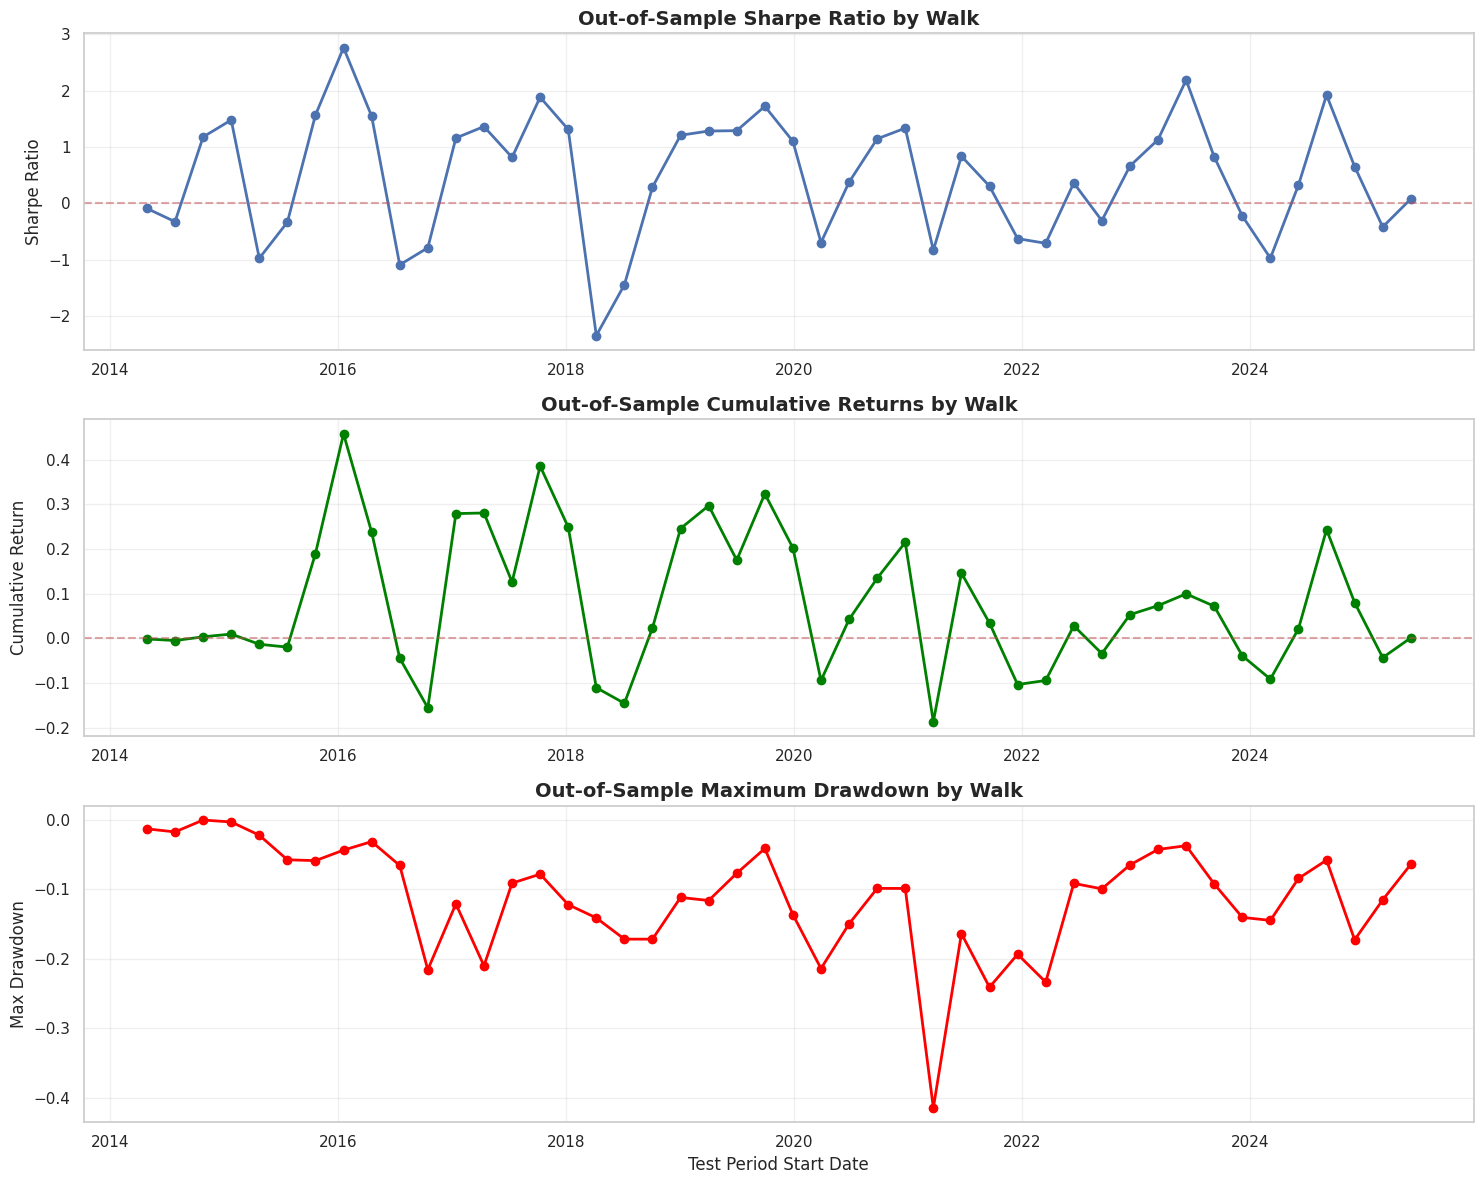


PARAMETER STABILITY ACROSS WALKS
       w_mom  w_vol  w_fund  w_ma  w_div   ema_span  bull_enter  bull_exit  \
count   46.0   46.0    46.0  46.0   46.0  46.000000   46.000000  46.000000   
mean     1.0    1.0     0.5   0.5    0.5  26.847826    0.558696   0.171739   
std      0.0    0.0     0.0   0.0    0.0   7.254018    0.080488   0.083435   
min      1.0    1.0     0.5   0.5    0.5  21.000000    0.500000   0.100000   
25%      1.0    1.0     0.5   0.5    0.5  21.000000    0.500000   0.100000   
50%      1.0    1.0     0.5   0.5    0.5  21.000000    0.500000   0.100000   
75%      1.0    1.0     0.5   0.5    0.5  30.000000    0.600000   0.200000   
max      1.0    1.0     0.5   0.5    0.5  40.000000    0.700000   0.300000   

       bear_enter  bear_exit   min_days   walk_num  
count   46.000000  46.000000  46.000000  46.000000  
mean    -0.632609  -0.202174  17.195652  23.500000  
std      0.089578   0.090650   4.597678  13.422618  
min     -0.700000  -0.300000  14.000000   1.000000 

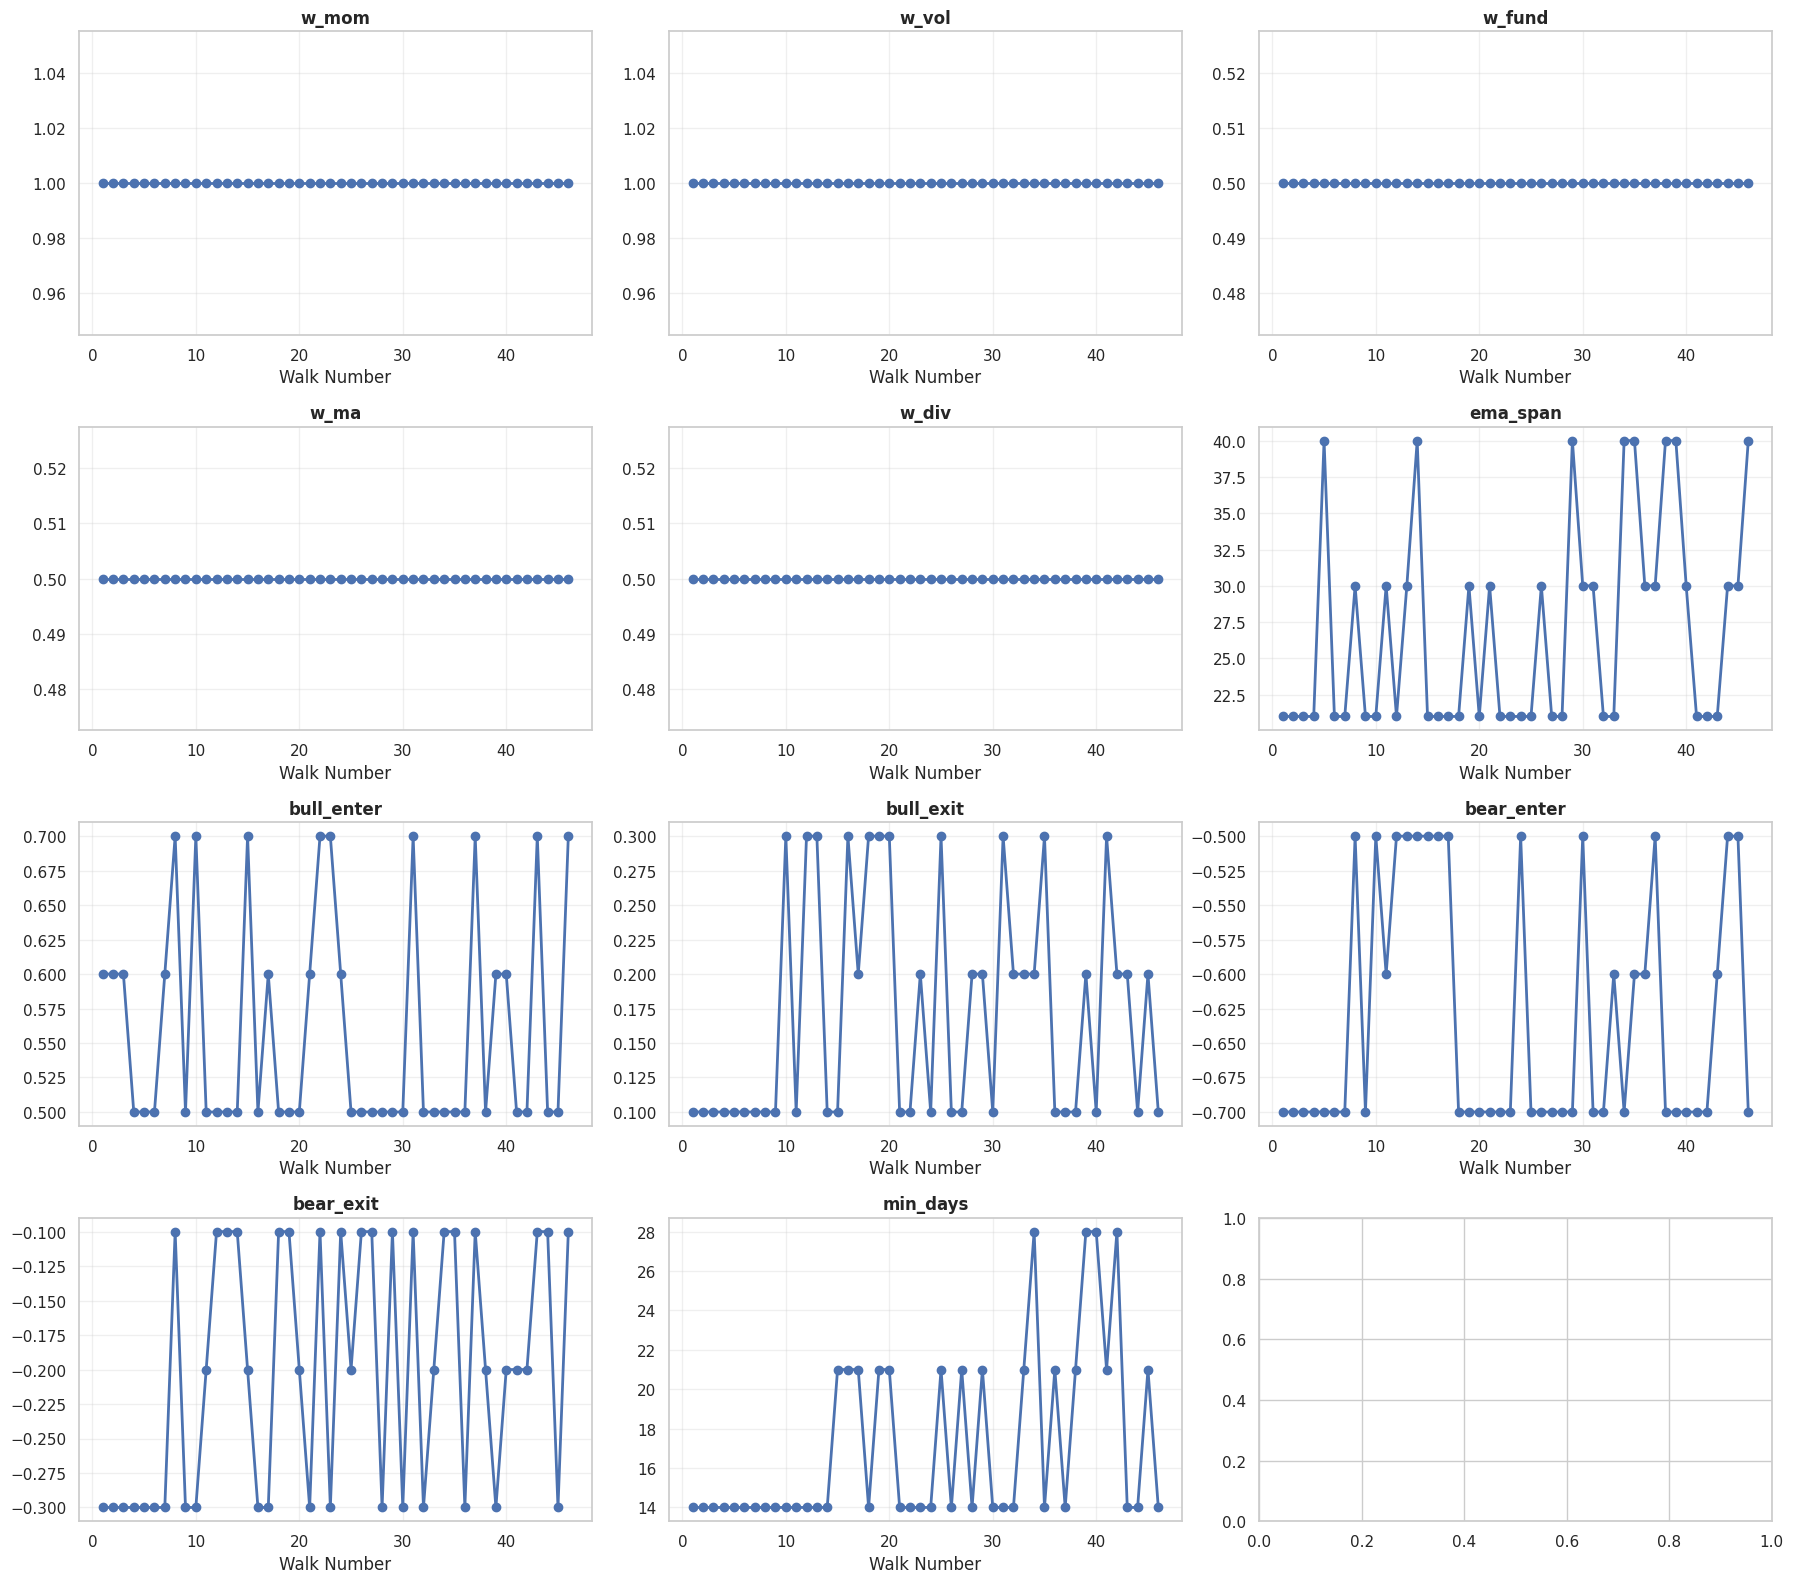


FINAL PARAMETER RECOMMENDATIONS

w_mom:
  Median: 1.0
  Mode:   1.0
  Mean:   1.000

w_vol:
  Median: 1.0
  Mode:   1.0
  Mean:   1.000

w_fund:
  Median: 0.5
  Mode:   0.5
  Mean:   0.500

w_ma:
  Median: 0.5
  Mode:   0.5
  Mean:   0.500

w_div:
  Median: 0.5
  Mode:   0.5
  Mean:   0.500

ema_span:
  Median: 21.0
  Mode:   21
  Mean:   26.848

bull_enter:
  Median: 0.5
  Mode:   0.5
  Mean:   0.559

bull_exit:
  Median: 0.1
  Mode:   0.1
  Mean:   0.172

bear_enter:
  Median: -0.7
  Mode:   -0.7
  Mean:   -0.633

bear_exit:
  Median: -0.2
  Mode:   -0.3
  Mean:   -0.202

min_days:
  Median: 14.0
  Mode:   14
  Mean:   17.196

Average out-of-sample Sharpe: 0.478
Average out-of-sample Return: 7.75%
Average Max Drawdown: -11.15%


In [ ]:
import pandas as pd
import numpy as np
from itertools import product
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm

# =============================================================================
# FORWARD WALK OPTIMIZATION FOR REGIME PREDICTION PARAMETERS
# =============================================================================

class RegimeOptimizer:
    """
    Forward walk optimization for regime detection parameters.
    Tests parameter combinations on rolling training windows and validates on out-of-sample periods.
    """

    def __init__(self, data_scaled, data_merged, core_coins):
        self.data_scaled = data_scaled.copy()
        self.data_merged = data_merged.copy()
        self.core_coins = core_coins

    def detect_regime(self, data, params):
        """
        Detect market regimes with given parameters.

        Parameters:
        -----------
        data : DataFrame
            Scaled feature data
        params : dict
            Dictionary containing:
                - w_mom: weight for momentum
                - w_vol: weight for volatility
                - w_fund: weight for funding
                - w_ma: weight for MA spreads
                - w_div: weight for divergence
                - ema_span: EMA smoothing span
                - bull_enter: threshold to enter bull regime
                - bull_exit: threshold to exit bull regime
                - bear_enter: threshold to enter bear regime
                - bear_exit: threshold to exit bear regime
                - min_days: minimum regime duration
        """
        # Collect feature columns
        momentum_cols = [f'{coin}_momentum_12w' for coin in self.core_coins
                        if f'{coin}_momentum_12w' in data.columns]
        vol_cols = [col for col in data.columns if 'realized_vol' in col or 'vol' in col]
        funding_cols = [col for col in data.columns if 'funding' in col]
        ma_spread_cols = [col for col in data.columns if 'ma_spread' in col]
        divergence_cols = [col for col in data.columns if 'divergence_vol_price_div' in col]

        all_score_cols = momentum_cols + vol_cols + funding_cols + ma_spread_cols + divergence_cols

        # Standardize features
        data_z = data[all_score_cols].copy()
        data_z = (data_z - data_z.mean()) / data_z.std()

        # Compute composite raw regime score
        regime_score_raw = params['w_mom'] * data_z[momentum_cols].mean(axis=1)
        regime_score_raw -= params['w_vol'] * data_z[vol_cols].mean(axis=1)

        if funding_cols:
            regime_score_raw += params['w_fund'] * data_z[funding_cols].mean(axis=1)
        if ma_spread_cols:
            regime_score_raw += params['w_ma'] * data_z[ma_spread_cols].mean(axis=1)
        if divergence_cols:
            regime_score_raw += params['w_div'] * data_z[divergence_cols].mean(axis=1)

        # Smooth with EMA
        regime_score = regime_score_raw.ewm(span=params['ema_span'], adjust=False).mean()

        # Assign regimes with hysteresis
        regimes = []
        current_regime = 'Neutral'

        for score in regime_score:
            if current_regime == 'Neutral':
                if score > params['bull_enter']:
                    current_regime = 'Bull'
                elif score < params['bear_enter']:
                    current_regime = 'Bear'
            elif current_regime == 'Bull':
                if score < params['bull_exit']:
                    current_regime = 'Neutral'
            elif current_regime == 'Bear':
                if score > params['bear_exit']:
                    current_regime = 'Neutral'
            regimes.append(current_regime)

        regime_series = pd.Series(regimes, index=data.index)

        # Enforce minimum regime duration
        last_change = data.index[0]
        final_regimes = []

        for date, reg in zip(regime_series.index, regime_series):
            if final_regimes and reg != final_regimes[-1]:
                if (date - last_change).days < params['min_days']:
                    reg = final_regimes[-1]
                else:
                    last_change = date
            final_regimes.append(reg)

        return pd.Series(final_regimes, index=data.index)

    def compute_allocations(self, regimes, data):
        """Compute portfolio allocations based on detected regimes."""
        allocations = pd.DataFrame(0.0, index=regimes.index, columns=self.core_coins)

        # Weekly rebalance + regime flips
        weekly_rebalance = regimes.resample('W-FRI').last().index
        regime_changed = regimes.index[regimes != regimes.shift(1)]
        rebalance_dates = weekly_rebalance.union(regime_changed).sort_values()

        for date in rebalance_dates:
            if date not in regimes.index:
                continue

            regime = regimes.loc[date]

            # Determine exposure and top_n by regime
            if regime == 'Bull':
                top_n, exposure = 3, 0.8
            elif regime == 'Neutral':
                top_n, exposure = 2, 0.5
            elif regime == 'Bear':
                btc_mom = data.loc[date, 'bitcoin_momentum_12w']
                if btc_mom < -0.05:
                    top_n, exposure = 1, 0.1
                elif btc_mom < 0.05:
                    top_n, exposure = 1, 0.3
                else:
                    top_n, exposure = 2, 0.5

            # Get coin momentum
            coin_momentum = {
                coin: data.loc[date, f'{coin}_momentum_12w']
                for coin in self.core_coins
                if f'{coin}_momentum_12w' in data.columns
                and not pd.isna(data.loc[date, f'{coin}_momentum_12w'])
            }

            if not coin_momentum:
                continue

            # Select top N coins
            top_coins = sorted(coin_momentum, key=coin_momentum.get, reverse=True)[:top_n]

            # Momentum-weighted allocations
            weights = np.array([coin_momentum[c] for c in top_coins])
            weights = np.maximum(weights, 0)
            if weights.sum() > 0:
                weights = weights / weights.sum()
            else:
                weights = np.ones(len(top_coins)) / len(top_coins)

            allocations.loc[date, top_coins] = exposure * weights

            # Funding rate tilt (optional)
            if 'bitcoin_fundingRateDaily' in data.columns:
                for coin in ['bitcoin', 'ethereum']:
                    if coin in top_coins and f'{coin}_fundingRateDaily' in data.columns:
                        fr = data.loc[date, f'{coin}_fundingRateDaily']
                        allocations.loc[date, coin] += 0.05 * np.sign(fr)

        allocations = allocations.clip(0, 1).ffill().fillna(0)
        return allocations

    def backtest_portfolio(self, allocations, start_date, end_date):
        """Compute portfolio returns for given allocations."""
        price_cols = [f'{coin}_combined_prices_daily' for coin in self.core_coins
                     if f'{coin}_combined_prices_daily' in self.data_merged.columns]

        # Compute daily returns
        daily_returns = self.data_merged[price_cols].ffill().pct_change().fillna(0)
        daily_returns.columns = self.core_coins

        # Filter by date range
        mask = (daily_returns.index >= start_date) & (daily_returns.index <= end_date)
        daily_returns = daily_returns[mask]
        allocations = allocations.reindex(daily_returns.index).ffill().fillna(0)

        # Portfolio returns
        portfolio_returns = (daily_returns * allocations.shift(1)).sum(axis=1)

        # Performance metrics
        cum_return = (1 + portfolio_returns).prod() - 1
        sharpe = portfolio_returns.mean() / portfolio_returns.std() * np.sqrt(252) if portfolio_returns.std() > 0 else 0
        max_dd = (portfolio_returns.cumsum() - portfolio_returns.cumsum().cummax()).min()

        return {
            'cum_return': cum_return,
            'sharpe': sharpe,
            'max_dd': max_dd,
            'returns': portfolio_returns
        }

    def forward_walk(self, param_grid, train_window_days=365, test_window_days=180, step_days=90):
        """
        Forward walk optimization.

        Parameters:
        -----------
        param_grid : dict
            Dictionary of parameter names to lists of values to test
        train_window_days : int
            Length of training window in days
        test_window_days : int
            Length of test window in days
        step_days : int
            Days to step forward between iterations
        """
        # Generate all parameter combinations
        param_names = list(param_grid.keys())
        param_values = list(param_grid.values())
        param_combinations = list(product(*param_values))

        print(f"Testing {len(param_combinations)} parameter combinations")
        print(f"Training window: {train_window_days} days")
        print(f"Test window: {test_window_days} days")
        print(f"Step size: {step_days} days\n")

        # Create date ranges for forward walk
        start_date = self.data_scaled.index.min()
        end_date = self.data_scaled.index.max()

        walk_results = []

        current_start = start_date
        walk_num = 0

        while current_start + pd.Timedelta(days=train_window_days + test_window_days) <= end_date:
            walk_num += 1
            train_end = current_start + pd.Timedelta(days=train_window_days)
            test_start = train_end
            test_end = test_start + pd.Timedelta(days=test_window_days)

            print(f"\n{'='*60}")
            print(f"Walk #{walk_num}")
            print(f"Train: {current_start.date()} to {train_end.date()}")
            print(f"Test:  {test_start.date()} to {test_end.date()}")
            print(f"{'='*60}")

            # Get train and test data
            train_mask = (self.data_scaled.index >= current_start) & (self.data_scaled.index < train_end)
            train_data = self.data_scaled[train_mask]

            best_sharpe = -np.inf
            best_params = None

            # Test each parameter combination on training data
            for i, param_vals in enumerate(tqdm(param_combinations, desc=f"Walk {walk_num} - Training")):
                params = dict(zip(param_names, param_vals))

                try:
                    # Detect regimes
                    regimes = self.detect_regime(train_data, params)

                    # Compute allocations
                    allocations = self.compute_allocations(regimes, train_data)

                    # Backtest on training period
                    results = self.backtest_portfolio(allocations, current_start, train_end)

                    if results['sharpe'] > best_sharpe:
                        best_sharpe = results['sharpe']
                        best_params = params.copy()

                except Exception as e:
                    continue

            print(f"\nBest training Sharpe: {best_sharpe:.3f}")
            print(f"Best parameters: {best_params}")

            # Test best parameters on out-of-sample data
            test_mask = (self.data_scaled.index >= test_start) & (self.data_scaled.index < test_end)
            test_data = self.data_scaled[test_mask]

            regimes = self.detect_regime(test_data, best_params)
            allocations = self.compute_allocations(regimes, test_data)
            test_results = self.backtest_portfolio(allocations, test_start, test_end)

            print(f"\nOut-of-sample performance:")
            print(f"  Cumulative Return: {test_results['cum_return']:.2%}")
            print(f"  Sharpe Ratio: {test_results['sharpe']:.3f}")
            print(f"  Max Drawdown: {test_results['max_dd']:.2%}")

            walk_results.append({
                'walk_num': walk_num,
                'train_start': current_start,
                'train_end': train_end,
                'test_start': test_start,
                'test_end': test_end,
                'best_params': best_params,
                'train_sharpe': best_sharpe,
                'test_sharpe': test_results['sharpe'],
                'test_cum_return': test_results['cum_return'],
                'test_max_dd': test_results['max_dd']
            })

            current_start += pd.Timedelta(days=step_days)

        return pd.DataFrame(walk_results)


# =============================================================================
# USAGE EXAMPLE
# =============================================================================

# =============================================================================
# OPTIMIZATION STRATEGIES - CHOOSE ONE:
# =============================================================================

# STRATEGY 1: COARSE GRID (Recommended for first run - ~20 min per walk)
# Tests 729 combinations
param_grid_coarse = {
    'w_mom': [1.0],
    'w_vol': [1.0],
    'w_fund': [0.5],
    'w_ma': [0.5],
    'w_div': [0.5],
    'ema_span': [21, 30, 40],
    'bull_enter': [0.5, 0.6, 0.7],
    'bull_exit': [0.1, 0.2, 0.3],
    'bear_enter': [-0.7, -0.6, -0.5],
    'bear_exit': [-0.3, -0.2, -0.1],
    'min_days': [14, 21, 28]
}

# STRATEGY 2: TWO-STAGE OPTIMIZATION (Recommended approach)
# Stage 1: Test thresholds only (~729 combinations, ~20 min per walk)
param_grid_stage1 = {
    'w_mom': [1.0],
    'w_vol': [1.0],
    'w_fund': [0.5],
    'w_ma': [0.5],
    'w_div': [0.5],
    'ema_span': [21, 30, 40],
    'bull_enter': [0.5, 0.6, 0.7],
    'bull_exit': [0.1, 0.2, 0.3],
    'bear_enter': [-0.7, -0.6, -0.5],
    'bear_exit': [-0.3, -0.2, -0.1],
    'min_days': [14, 21, 28]
}

# Stage 2: Fix best thresholds, optimize weights (~243 combinations, ~7 min per walk)
param_grid_stage2 = {
    'w_mom': [0.8, 1.0, 1.2],
    'w_vol': [0.8, 1.0, 1.2],
    'w_fund': [0.3, 0.5, 0.7],
    'w_ma': [0.3, 0.5, 0.7],
    'w_div': [0.3, 0.5, 0.7],
    'ema_span': [30],  # Use best from stage 1
    'bull_enter': [0.6],  # Use best from stage 1
    'bull_exit': [0.2],  # Use best from stage 1
    'bear_enter': [-0.6],  # Use best from stage 1
    'bear_exit': [-0.2],  # Use best from stage 1
    'min_days': [21]  # Use best from stage 1
}

# STRATEGY 3: RANDOM SEARCH (Fast exploration - ~1000 combinations, ~22 min per walk)
# Uncomment to use random search instead of grid search
# from sklearn.model_selection import ParameterSampler
# param_distributions = {
#     'w_mom': np.linspace(0.8, 1.2, 10),
#     'w_vol': np.linspace(0.8, 1.2, 10),
#     'w_fund': np.linspace(0.3, 0.7, 10),
#     'w_ma': np.linspace(0.3, 0.7, 10),
#     'w_div': np.linspace(0.3, 0.7, 10),
#     'ema_span': [15, 21, 30, 40, 50],
#     'bull_enter': np.linspace(0.4, 0.8, 10),
#     'bull_exit': np.linspace(0.0, 0.4, 10),
#     'bear_enter': np.linspace(-0.8, -0.4, 10),
#     'bear_exit': np.linspace(-0.4, 0.0, 10),
#     'min_days': [7, 14, 21, 28, 35]
# }
# param_grid_random = list(ParameterSampler(param_distributions, n_iter=1000, random_state=42))

# STRATEGY 4: ORIGINAL FULL GRID (Very slow - 177,147 combinations, ~4 hours per walk)
param_grid_full = {
    'w_mom': [0.8, 1.0, 1.2],
    'w_vol': [0.8, 1.0, 1.2],
    'w_fund': [0.3, 0.5, 0.7],
    'w_ma': [0.3, 0.5, 0.7],
    'w_div': [0.3, 0.5, 0.7],
    'ema_span': [21, 30, 40],
    'bull_enter': [0.5, 0.6, 0.7],
    'bull_exit': [0.1, 0.2, 0.3],
    'bear_enter': [-0.7, -0.6, -0.5],
    'bear_exit': [-0.3, -0.2, -0.1],
    'min_days': [14, 21, 28]
}

# SELECT YOUR STRATEGY:
param_grid = param_grid_coarse  # Change this to your chosen strategy

# Initialize optimizer
optimizer = RegimeOptimizer(data_scaled, data_merged, core_coins)

# Run forward walk optimization
results = optimizer.forward_walk(
    param_grid=param_grid,
    train_window_days=365,  # 1 year training
    test_window_days=180,   # 6 months testing
    step_days=90            # Move forward 3 months each step
)

# Display results
print("\n" + "="*80)
print("FORWARD WALK OPTIMIZATION RESULTS")
print("="*80)
print(results)

# Save results
results.to_csv('forward_walk_results.csv', index=False)

# =============================================================================
# VISUALIZATION
# =============================================================================

fig, axes = plt.subplots(3, 1, figsize=(15, 12))

# Plot 1: Out-of-sample Sharpe Ratio over time
axes[0].plot(results['test_start'], results['test_sharpe'], marker='o', linewidth=2)
axes[0].axhline(y=0, color='r', linestyle='--', alpha=0.5)
axes[0].set_title('Out-of-Sample Sharpe Ratio by Walk', fontsize=14, fontweight='bold')
axes[0].set_ylabel('Sharpe Ratio')
axes[0].grid(True, alpha=0.3)

# Plot 2: Cumulative Returns
axes[1].plot(results['test_start'], results['test_cum_return'], marker='o', linewidth=2, color='green')
axes[1].axhline(y=0, color='r', linestyle='--', alpha=0.5)
axes[1].set_title('Out-of-Sample Cumulative Returns by Walk', fontsize=14, fontweight='bold')
axes[1].set_ylabel('Cumulative Return')
axes[1].grid(True, alpha=0.3)

# Plot 3: Maximum Drawdown
axes[2].plot(results['test_start'], results['test_max_dd'], marker='o', linewidth=2, color='red')
axes[2].set_title('Out-of-Sample Maximum Drawdown by Walk', fontsize=14, fontweight='bold')
axes[2].set_ylabel('Max Drawdown')
axes[2].set_xlabel('Test Period Start Date')
axes[2].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# =============================================================================
# PARAMETER STABILITY ANALYSIS
# =============================================================================

# Extract best parameters from each walk
param_evolution = pd.DataFrame([r['best_params'] for r in results.to_dict('records')])
param_evolution['walk_num'] = results['walk_num'].values

print("\n" + "="*80)
print("PARAMETER STABILITY ACROSS WALKS")
print("="*80)
print(param_evolution.describe())

# Plot parameter evolution
fig, axes = plt.subplots(4, 3, figsize=(18, 16))
axes = axes.flatten()

for i, param in enumerate(param_grid.keys()):
    axes[i].plot(param_evolution['walk_num'], param_evolution[param], marker='o', linewidth=2)
    axes[i].set_title(f'{param}', fontsize=12, fontweight='bold')
    axes[i].set_xlabel('Walk Number')
    axes[i].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# =============================================================================
# FINAL RECOMMENDATIONS
# =============================================================================

print("\n" + "="*80)
print("FINAL PARAMETER RECOMMENDATIONS")
print("="*80)

# Calculate median and mode for each parameter
recommendations = {}
for param in param_grid.keys():
    recommendations[param] = {
        'median': param_evolution[param].median(),
        'mode': param_evolution[param].mode()[0] if len(param_evolution[param].mode()) > 0 else None,
        'mean': param_evolution[param].mean()
    }

for param, stats in recommendations.items():
    print(f"\n{param}:")
    print(f"  Median: {stats['median']}")
    print(f"  Mode:   {stats['mode']}")
    print(f"  Mean:   {stats['mean']:.3f}")

print("\n" + "="*80)
print(f"Average out-of-sample Sharpe: {results['test_sharpe'].mean():.3f}")
print(f"Average out-of-sample Return: {results['test_cum_return'].mean():.2%}")
print(f"Average Max Drawdown: {results['test_max_dd'].mean():.2%}")
print("="*80)

##Tuning allocation logic

Testing 2048 parameter combinations
Optimization objective: sharpe
Training window: 365 days
Test window: 180 days
Step size: 90 days


Walk #1
Train: 2013-04-28 to 2014-04-28
Test:  2014-04-28 to 2014-10-25


Walk 1 - Training: 100%|██████████| 2048/2048 [02:36<00:00, 13.06it/s]



Best training sharpe: 0.289
Best parameters: {'bull_top_n': 3, 'bull_exposure': 0.9, 'neutral_top_n': 3, 'neutral_exposure': 0.8, 'bear_crash_top_n': 1, 'bear_crash_exposure': 0.2, 'bear_base_top_n': 3, 'bear_base_exposure': 0.4, 'bear_transition_top_n': 2, 'bear_transition_exposure': 0.7, 'funding_tilt': 0.0, 'use_equal_weight': False}

Out-of-sample performance:
  Cumulative Return: -1.54%
  Annualized Return: -2.14%
  Sharpe Ratio: -1.970
  Calmar Ratio: -1.388
  Max Drawdown: -1.54%

Walk #2
Train: 2013-07-27 to 2014-07-27
Test:  2014-07-27 to 2015-01-23


Walk 2 - Training: 100%|██████████| 2048/2048 [02:29<00:00, 13.65it/s]



Best training sharpe: 0.264
Best parameters: {'bull_top_n': 3, 'bull_exposure': 0.9, 'neutral_top_n': 3, 'neutral_exposure': 0.8, 'bear_crash_top_n': 1, 'bear_crash_exposure': 0.3, 'bear_base_top_n': 3, 'bear_base_exposure': 0.4, 'bear_transition_top_n': 2, 'bear_transition_exposure': 0.7, 'funding_tilt': 0.0, 'use_equal_weight': False}

Out-of-sample performance:
  Cumulative Return: -1.31%
  Annualized Return: -1.82%
  Sharpe Ratio: -1.969
  Calmar Ratio: -1.389
  Max Drawdown: -1.31%

Walk #3
Train: 2013-10-25 to 2014-10-25
Test:  2014-10-25 to 2015-04-23


Walk 3 - Training: 100%|██████████| 2048/2048 [02:28<00:00, 13.83it/s]



Best training sharpe: -0.095
Best parameters: {'bull_top_n': 3, 'bull_exposure': 0.9, 'neutral_top_n': 3, 'neutral_exposure': 0.8, 'bear_crash_top_n': 2, 'bear_crash_exposure': 0.3, 'bear_base_top_n': 3, 'bear_base_exposure': 0.4, 'bear_transition_top_n': 2, 'bear_transition_exposure': 0.7, 'funding_tilt': 0.0, 'use_equal_weight': False}

Out-of-sample performance:
  Cumulative Return: 0.57%
  Annualized Return: 0.80%
  Sharpe Ratio: 1.181
  Calmar Ratio: 0.000
  Max Drawdown: 0.00%

Walk #4
Train: 2014-01-23 to 2015-01-23
Test:  2015-01-23 to 2015-07-22


Walk 4 - Training: 100%|██████████| 2048/2048 [02:29<00:00, 13.72it/s]



Best training sharpe: -0.402
Best parameters: {'bull_top_n': 3, 'bull_exposure': 0.9, 'neutral_top_n': 3, 'neutral_exposure': 0.8, 'bear_crash_top_n': 2, 'bear_crash_exposure': 0.3, 'bear_base_top_n': 3, 'bear_base_exposure': 0.4, 'bear_transition_top_n': 2, 'bear_transition_exposure': 0.6, 'funding_tilt': 0.0, 'use_equal_weight': False}

Out-of-sample performance:
  Cumulative Return: 0.96%
  Annualized Return: 1.33%
  Sharpe Ratio: 1.581
  Calmar Ratio: 6.358
  Max Drawdown: -0.21%

Walk #5
Train: 2014-04-23 to 2015-04-23
Test:  2015-04-23 to 2015-10-20


Walk 5 - Training: 100%|██████████| 2048/2048 [02:22<00:00, 14.33it/s]



Best training sharpe: -0.044
Best parameters: {'bull_top_n': 3, 'bull_exposure': 0.9, 'neutral_top_n': 3, 'neutral_exposure': 0.7, 'bear_crash_top_n': 2, 'bear_crash_exposure': 0.3, 'bear_base_top_n': 3, 'bear_base_exposure': 0.4, 'bear_transition_top_n': 2, 'bear_transition_exposure': 0.6, 'funding_tilt': 0.0, 'use_equal_weight': False}

Out-of-sample performance:
  Cumulative Return: -0.96%
  Annualized Return: -1.33%
  Sharpe Ratio: -0.959
  Calmar Ratio: -0.821
  Max Drawdown: -1.62%

Walk #6
Train: 2014-07-22 to 2015-07-22
Test:  2015-07-22 to 2016-01-18


Walk 6 - Training: 100%|██████████| 2048/2048 [02:22<00:00, 14.37it/s]



Best training sharpe: 0.253
Best parameters: {'bull_top_n': 3, 'bull_exposure': 0.9, 'neutral_top_n': 3, 'neutral_exposure': 0.7, 'bear_crash_top_n': 2, 'bear_crash_exposure': 0.3, 'bear_base_top_n': 2, 'bear_base_exposure': 0.4, 'bear_transition_top_n': 2, 'bear_transition_exposure': 0.6, 'funding_tilt': 0.0, 'use_equal_weight': False}

Out-of-sample performance:
  Cumulative Return: -3.15%
  Annualized Return: -4.36%
  Sharpe Ratio: -0.431
  Calmar Ratio: -0.529
  Max Drawdown: -8.24%

Walk #7
Train: 2014-10-20 to 2015-10-20
Test:  2015-10-20 to 2016-04-17


Walk 7 - Training: 100%|██████████| 2048/2048 [02:22<00:00, 14.40it/s]



Best training sharpe: 0.215
Best parameters: {'bull_top_n': 3, 'bull_exposure': 0.9, 'neutral_top_n': 3, 'neutral_exposure': 0.7, 'bear_crash_top_n': 2, 'bear_crash_exposure': 0.2, 'bear_base_top_n': 3, 'bear_base_exposure': 0.4, 'bear_transition_top_n': 2, 'bear_transition_exposure': 0.7, 'funding_tilt': 0.05, 'use_equal_weight': False}

Out-of-sample performance:
  Cumulative Return: 39.18%
  Annualized Return: 58.45%
  Sharpe Ratio: 2.169
  Calmar Ratio: 7.126
  Max Drawdown: -8.20%

Walk #8
Train: 2015-01-18 to 2016-01-18
Test:  2016-01-18 to 2016-07-16


Walk 8 - Training: 100%|██████████| 2048/2048 [02:25<00:00, 14.09it/s]



Best training sharpe: -0.056
Best parameters: {'bull_top_n': 3, 'bull_exposure': 0.9, 'neutral_top_n': 3, 'neutral_exposure': 0.7, 'bear_crash_top_n': 2, 'bear_crash_exposure': 0.2, 'bear_base_top_n': 3, 'bear_base_exposure': 0.4, 'bear_transition_top_n': 2, 'bear_transition_exposure': 0.7, 'funding_tilt': 0.05, 'use_equal_weight': False}

Out-of-sample performance:
  Cumulative Return: 86.91%
  Annualized Return: 138.88%
  Sharpe Ratio: 4.141
  Calmar Ratio: 23.322
  Max Drawdown: -5.95%

Walk #9
Train: 2015-04-18 to 2016-04-17
Test:  2016-04-17 to 2016-10-14


Walk 9 - Training: 100%|██████████| 2048/2048 [02:29<00:00, 13.72it/s]



Best training sharpe: 1.342
Best parameters: {'bull_top_n': 3, 'bull_exposure': 1.0, 'neutral_top_n': 3, 'neutral_exposure': 0.7, 'bear_crash_top_n': 2, 'bear_crash_exposure': 0.2, 'bear_base_top_n': 3, 'bear_base_exposure': 0.4, 'bear_transition_top_n': 2, 'bear_transition_exposure': 0.7, 'funding_tilt': 0.05, 'use_equal_weight': False}

Out-of-sample performance:
  Cumulative Return: 31.47%
  Annualized Return: 46.37%
  Sharpe Ratio: 1.820
  Calmar Ratio: 11.919
  Max Drawdown: -3.89%

Walk #10
Train: 2015-07-17 to 2016-07-16
Test:  2016-07-16 to 2017-01-12


Walk 10 - Training: 100%|██████████| 2048/2048 [02:36<00:00, 13.07it/s]



Best training sharpe: 2.192
Best parameters: {'bull_top_n': 3, 'bull_exposure': 1.0, 'neutral_top_n': 3, 'neutral_exposure': 0.7, 'bear_crash_top_n': 2, 'bear_crash_exposure': 0.2, 'bear_base_top_n': 3, 'bear_base_exposure': 0.4, 'bear_transition_top_n': 2, 'bear_transition_exposure': 0.7, 'funding_tilt': 0.05, 'use_equal_weight': False}

Out-of-sample performance:
  Cumulative Return: -0.81%
  Annualized Return: -1.12%
  Sharpe Ratio: -0.252
  Calmar Ratio: -0.271
  Max Drawdown: -4.13%

Walk #11
Train: 2015-10-15 to 2016-10-14
Test:  2016-10-14 to 2017-04-12


Walk 11 - Training: 100%|██████████| 2048/2048 [02:36<00:00, 13.05it/s]



Best training sharpe: 2.254
Best parameters: {'bull_top_n': 3, 'bull_exposure': 1.0, 'neutral_top_n': 4, 'neutral_exposure': 0.7, 'bear_crash_top_n': 1, 'bear_crash_exposure': 0.2, 'bear_base_top_n': 2, 'bear_base_exposure': 0.5, 'bear_transition_top_n': 2, 'bear_transition_exposure': 0.7, 'funding_tilt': 0.05, 'use_equal_weight': False}

Out-of-sample performance:
  Cumulative Return: -11.42%
  Annualized Return: -15.54%
  Sharpe Ratio: -0.489
  Calmar Ratio: -0.651
  Max Drawdown: -23.87%

Walk #12
Train: 2016-01-13 to 2017-01-12
Test:  2017-01-12 to 2017-07-11


Walk 12 - Training: 100%|██████████| 2048/2048 [02:40<00:00, 12.76it/s]



Best training sharpe: 2.393
Best parameters: {'bull_top_n': 3, 'bull_exposure': 1.0, 'neutral_top_n': 4, 'neutral_exposure': 0.8, 'bear_crash_top_n': 1, 'bear_crash_exposure': 0.2, 'bear_base_top_n': 2, 'bear_base_exposure': 0.5, 'bear_transition_top_n': 2, 'bear_transition_exposure': 0.6, 'funding_tilt': 0.05, 'use_equal_weight': False}

Out-of-sample performance:
  Cumulative Return: 6.94%
  Annualized Return: 9.80%
  Sharpe Ratio: 0.241
  Calmar Ratio: 0.410
  Max Drawdown: -23.87%

Walk #13
Train: 2016-04-12 to 2017-04-12
Test:  2017-04-12 to 2017-10-09


Walk 13 - Training: 100%|██████████| 2048/2048 [02:41<00:00, 12.66it/s]



Best training sharpe: 0.903
Best parameters: {'bull_top_n': 3, 'bull_exposure': 0.9, 'neutral_top_n': 4, 'neutral_exposure': 0.8, 'bear_crash_top_n': 1, 'bear_crash_exposure': 0.2, 'bear_base_top_n': 2, 'bear_base_exposure': 0.5, 'bear_transition_top_n': 2, 'bear_transition_exposure': 0.6, 'funding_tilt': 0.05, 'use_equal_weight': False}

Out-of-sample performance:
  Cumulative Return: 55.72%
  Annualized Return: 85.26%
  Sharpe Ratio: 2.291
  Calmar Ratio: 4.604
  Max Drawdown: -18.52%

Walk #14
Train: 2016-07-11 to 2017-07-11
Test:  2017-07-11 to 2018-01-07


Walk 14 - Training: 100%|██████████| 2048/2048 [02:38<00:00, 12.95it/s]



Best training sharpe: 0.196
Best parameters: {'bull_top_n': 3, 'bull_exposure': 0.9, 'neutral_top_n': 4, 'neutral_exposure': 0.8, 'bear_crash_top_n': 1, 'bear_crash_exposure': 0.2, 'bear_base_top_n': 2, 'bear_base_exposure': 0.5, 'bear_transition_top_n': 2, 'bear_transition_exposure': 0.6, 'funding_tilt': 0.0, 'use_equal_weight': False}

Out-of-sample performance:
  Cumulative Return: 53.46%
  Annualized Return: 81.53%
  Sharpe Ratio: 2.098
  Calmar Ratio: 7.601
  Max Drawdown: -10.73%

Walk #15
Train: 2016-10-09 to 2017-10-09
Test:  2017-10-09 to 2018-04-07


Walk 15 - Training: 100%|██████████| 2048/2048 [02:51<00:00, 11.96it/s]



Best training sharpe: 0.800
Best parameters: {'bull_top_n': 3, 'bull_exposure': 0.9, 'neutral_top_n': 4, 'neutral_exposure': 0.8, 'bear_crash_top_n': 1, 'bear_crash_exposure': 0.2, 'bear_base_top_n': 2, 'bear_base_exposure': 0.4, 'bear_transition_top_n': 2, 'bear_transition_exposure': 0.7, 'funding_tilt': 0.0, 'use_equal_weight': False}

Out-of-sample performance:
  Cumulative Return: 53.86%
  Annualized Return: 82.19%
  Sharpe Ratio: 2.364
  Calmar Ratio: 8.618
  Max Drawdown: -9.54%

Walk #16
Train: 2017-01-07 to 2018-01-07
Test:  2018-01-07 to 2018-07-06


Walk 16 - Training: 100%|██████████| 2048/2048 [02:58<00:00, 11.47it/s]



Best training sharpe: 0.909
Best parameters: {'bull_top_n': 4, 'bull_exposure': 0.9, 'neutral_top_n': 3, 'neutral_exposure': 0.8, 'bear_crash_top_n': 1, 'bear_crash_exposure': 0.2, 'bear_base_top_n': 2, 'bear_base_exposure': 0.4, 'bear_transition_top_n': 2, 'bear_transition_exposure': 0.7, 'funding_tilt': 0.0, 'use_equal_weight': False}

Out-of-sample performance:
  Cumulative Return: 31.79%
  Annualized Return: 46.86%
  Sharpe Ratio: 1.668
  Calmar Ratio: 5.907
  Max Drawdown: -7.93%

Walk #17
Train: 2017-04-07 to 2018-04-07
Test:  2018-04-07 to 2018-10-04


Walk 17 - Training: 100%|██████████| 2048/2048 [02:56<00:00, 11.62it/s]



Best training sharpe: 2.394
Best parameters: {'bull_top_n': 3, 'bull_exposure': 0.9, 'neutral_top_n': 3, 'neutral_exposure': 0.8, 'bear_crash_top_n': 1, 'bear_crash_exposure': 0.2, 'bear_base_top_n': 2, 'bear_base_exposure': 0.4, 'bear_transition_top_n': 2, 'bear_transition_exposure': 0.7, 'funding_tilt': 0.0, 'use_equal_weight': False}

Out-of-sample performance:
  Cumulative Return: -8.56%
  Annualized Return: -11.71%
  Sharpe Ratio: -1.867
  Calmar Ratio: -1.265
  Max Drawdown: -9.26%

Walk #18
Train: 2017-07-06 to 2018-07-06
Test:  2018-07-06 to 2019-01-02


Walk 18 - Training: 100%|██████████| 2048/2048 [02:59<00:00, 11.41it/s]



Best training sharpe: 1.570
Best parameters: {'bull_top_n': 3, 'bull_exposure': 0.9, 'neutral_top_n': 3, 'neutral_exposure': 0.8, 'bear_crash_top_n': 1, 'bear_crash_exposure': 0.3, 'bear_base_top_n': 2, 'bear_base_exposure': 0.4, 'bear_transition_top_n': 2, 'bear_transition_exposure': 0.7, 'funding_tilt': 0.0, 'use_equal_weight': False}

Out-of-sample performance:
  Cumulative Return: -21.76%
  Annualized Return: -28.94%
  Sharpe Ratio: -2.052
  Calmar Ratio: -1.306
  Max Drawdown: -22.15%

Walk #19
Train: 2017-10-04 to 2018-10-04
Test:  2018-10-04 to 2019-04-02


Walk 19 - Training: 100%|██████████| 2048/2048 [02:39<00:00, 12.86it/s]



Best training sharpe: 1.156
Best parameters: {'bull_top_n': 3, 'bull_exposure': 0.9, 'neutral_top_n': 3, 'neutral_exposure': 0.7, 'bear_crash_top_n': 1, 'bear_crash_exposure': 0.2, 'bear_base_top_n': 2, 'bear_base_exposure': 0.4, 'bear_transition_top_n': 2, 'bear_transition_exposure': 0.7, 'funding_tilt': 0.05, 'use_equal_weight': False}

Out-of-sample performance:
  Cumulative Return: -11.21%
  Annualized Return: -15.25%
  Sharpe Ratio: -1.136
  Calmar Ratio: -0.778
  Max Drawdown: -19.61%

Walk #20
Train: 2018-01-02 to 2019-01-02
Test:  2019-01-02 to 2019-07-01


Walk 20 - Training: 100%|██████████| 2048/2048 [02:33<00:00, 13.33it/s]



Best training sharpe: 0.523
Best parameters: {'bull_top_n': 3, 'bull_exposure': 1.0, 'neutral_top_n': 3, 'neutral_exposure': 0.7, 'bear_crash_top_n': 1, 'bear_crash_exposure': 0.3, 'bear_base_top_n': 2, 'bear_base_exposure': 0.4, 'bear_transition_top_n': 2, 'bear_transition_exposure': 0.6, 'funding_tilt': 0.0, 'use_equal_weight': False}

Out-of-sample performance:
  Cumulative Return: 55.87%
  Annualized Return: 85.52%
  Sharpe Ratio: 2.524
  Calmar Ratio: 15.144
  Max Drawdown: -5.65%

Walk #21
Train: 2018-04-02 to 2019-04-02
Test:  2019-04-02 to 2019-09-29


Walk 21 - Training: 100%|██████████| 2048/2048 [02:28<00:00, 13.75it/s]



Best training sharpe: -1.004
Best parameters: {'bull_top_n': 3, 'bull_exposure': 0.9, 'neutral_top_n': 3, 'neutral_exposure': 0.7, 'bear_crash_top_n': 1, 'bear_crash_exposure': 0.3, 'bear_base_top_n': 2, 'bear_base_exposure': 0.4, 'bear_transition_top_n': 2, 'bear_transition_exposure': 0.6, 'funding_tilt': 0.0, 'use_equal_weight': False}

Out-of-sample performance:
  Cumulative Return: 61.21%
  Annualized Return: 94.42%
  Sharpe Ratio: 2.630
  Calmar Ratio: 8.632
  Max Drawdown: -10.94%

Walk #22
Train: 2018-07-01 to 2019-07-01
Test:  2019-07-01 to 2019-12-28


Walk 22 - Training: 100%|██████████| 2048/2048 [02:28<00:00, 13.78it/s]



Best training sharpe: 0.677
Best parameters: {'bull_top_n': 3, 'bull_exposure': 1.0, 'neutral_top_n': 4, 'neutral_exposure': 0.7, 'bear_crash_top_n': 1, 'bear_crash_exposure': 0.3, 'bear_base_top_n': 2, 'bear_base_exposure': 0.4, 'bear_transition_top_n': 2, 'bear_transition_exposure': 0.6, 'funding_tilt': 0.0, 'use_equal_weight': False}

Out-of-sample performance:
  Cumulative Return: 14.03%
  Annualized Return: 20.06%
  Sharpe Ratio: 0.845
  Calmar Ratio: 1.229
  Max Drawdown: -16.33%

Walk #23
Train: 2018-09-29 to 2019-09-29
Test:  2019-09-29 to 2020-03-27


Walk 23 - Training: 100%|██████████| 2048/2048 [02:32<00:00, 13.46it/s]



Best training sharpe: 1.007
Best parameters: {'bull_top_n': 3, 'bull_exposure': 1.0, 'neutral_top_n': 3, 'neutral_exposure': 0.7, 'bear_crash_top_n': 1, 'bear_crash_exposure': 0.3, 'bear_base_top_n': 2, 'bear_base_exposure': 0.4, 'bear_transition_top_n': 2, 'bear_transition_exposure': 0.6, 'funding_tilt': 0.0, 'use_equal_weight': False}

Out-of-sample performance:
  Cumulative Return: 36.51%
  Annualized Return: 54.24%
  Sharpe Ratio: 2.287
  Calmar Ratio: 9.474
  Max Drawdown: -5.73%

Walk #24
Train: 2018-12-28 to 2019-12-28
Test:  2019-12-28 to 2020-06-25


Walk 24 - Training: 100%|██████████| 2048/2048 [02:28<00:00, 13.83it/s]



Best training sharpe: 1.729
Best parameters: {'bull_top_n': 3, 'bull_exposure': 0.9, 'neutral_top_n': 3, 'neutral_exposure': 0.8, 'bear_crash_top_n': 1, 'bear_crash_exposure': 0.3, 'bear_base_top_n': 2, 'bear_base_exposure': 0.4, 'bear_transition_top_n': 2, 'bear_transition_exposure': 0.6, 'funding_tilt': 0.0, 'use_equal_weight': False}

Out-of-sample performance:
  Cumulative Return: 41.83%
  Annualized Return: 62.67%
  Sharpe Ratio: 2.424
  Calmar Ratio: 19.837
  Max Drawdown: -3.16%

Walk #25
Train: 2019-03-28 to 2020-03-27
Test:  2020-03-27 to 2020-09-23


Walk 25 - Training: 100%|██████████| 2048/2048 [02:31<00:00, 13.50it/s]



Best training sharpe: 2.413
Best parameters: {'bull_top_n': 3, 'bull_exposure': 0.9, 'neutral_top_n': 3, 'neutral_exposure': 0.8, 'bear_crash_top_n': 1, 'bear_crash_exposure': 0.3, 'bear_base_top_n': 2, 'bear_base_exposure': 0.4, 'bear_transition_top_n': 2, 'bear_transition_exposure': 0.6, 'funding_tilt': 0.0, 'use_equal_weight': False}

Out-of-sample performance:
  Cumulative Return: -8.15%
  Annualized Return: -11.16%
  Sharpe Ratio: -0.539
  Calmar Ratio: -0.595
  Max Drawdown: -18.75%

Walk #26
Train: 2019-06-26 to 2020-06-25
Test:  2020-06-25 to 2020-12-22


Walk 26 - Training: 100%|██████████| 2048/2048 [02:29<00:00, 13.74it/s]



Best training sharpe: 2.138
Best parameters: {'bull_top_n': 3, 'bull_exposure': 0.9, 'neutral_top_n': 3, 'neutral_exposure': 0.8, 'bear_crash_top_n': 1, 'bear_crash_exposure': 0.2, 'bear_base_top_n': 2, 'bear_base_exposure': 0.4, 'bear_transition_top_n': 2, 'bear_transition_exposure': 0.6, 'funding_tilt': 0.05, 'use_equal_weight': False}

Out-of-sample performance:
  Cumulative Return: 5.91%
  Annualized Return: 8.32%
  Sharpe Ratio: 0.304
  Calmar Ratio: 0.469
  Max Drawdown: -17.75%

Walk #27
Train: 2019-09-24 to 2020-09-23
Test:  2020-09-23 to 2021-03-22


Walk 27 - Training: 100%|██████████| 2048/2048 [02:28<00:00, 13.79it/s]



Best training sharpe: 0.768
Best parameters: {'bull_top_n': 4, 'bull_exposure': 0.9, 'neutral_top_n': 3, 'neutral_exposure': 0.8, 'bear_crash_top_n': 1, 'bear_crash_exposure': 0.2, 'bear_base_top_n': 2, 'bear_base_exposure': 0.4, 'bear_transition_top_n': 2, 'bear_transition_exposure': 0.6, 'funding_tilt': 0.05, 'use_equal_weight': False}

Out-of-sample performance:
  Cumulative Return: 34.21%
  Annualized Return: 50.63%
  Sharpe Ratio: 1.710
  Calmar Ratio: 5.403
  Max Drawdown: -9.37%

Walk #28
Train: 2019-12-23 to 2020-12-22
Test:  2020-12-22 to 2021-06-20


Walk 28 - Training: 100%|██████████| 2048/2048 [02:33<00:00, 13.36it/s]



Best training sharpe: 1.274
Best parameters: {'bull_top_n': 3, 'bull_exposure': 0.9, 'neutral_top_n': 4, 'neutral_exposure': 0.8, 'bear_crash_top_n': 1, 'bear_crash_exposure': 0.2, 'bear_base_top_n': 2, 'bear_base_exposure': 0.4, 'bear_transition_top_n': 2, 'bear_transition_exposure': 0.6, 'funding_tilt': 0.05, 'use_equal_weight': False}

Out-of-sample performance:
  Cumulative Return: -10.76%
  Annualized Return: -14.65%
  Sharpe Ratio: -0.375
  Calmar Ratio: -0.366
  Max Drawdown: -40.07%

Walk #29
Train: 2020-03-22 to 2021-03-22
Test:  2021-03-22 to 2021-09-18


Walk 29 - Training: 100%|██████████| 2048/2048 [02:35<00:00, 13.15it/s]



Best training sharpe: 0.798
Best parameters: {'bull_top_n': 4, 'bull_exposure': 0.9, 'neutral_top_n': 4, 'neutral_exposure': 0.8, 'bear_crash_top_n': 1, 'bear_crash_exposure': 0.2, 'bear_base_top_n': 2, 'bear_base_exposure': 0.4, 'bear_transition_top_n': 2, 'bear_transition_exposure': 0.6, 'funding_tilt': 0.05, 'use_equal_weight': False}

Out-of-sample performance:
  Cumulative Return: -20.46%
  Annualized Return: -27.29%
  Sharpe Ratio: -0.717
  Calmar Ratio: -0.637
  Max Drawdown: -42.82%

Walk #30
Train: 2020-06-20 to 2021-06-20
Test:  2021-06-20 to 2021-12-17


Walk 30 - Training: 100%|██████████| 2048/2048 [02:33<00:00, 13.32it/s]



Best training sharpe: -0.082
Best parameters: {'bull_top_n': 4, 'bull_exposure': 0.9, 'neutral_top_n': 4, 'neutral_exposure': 0.7, 'bear_crash_top_n': 1, 'bear_crash_exposure': 0.2, 'bear_base_top_n': 2, 'bear_base_exposure': 0.4, 'bear_transition_top_n': 2, 'bear_transition_exposure': 0.6, 'funding_tilt': 0.05, 'use_equal_weight': False}

Out-of-sample performance:
  Cumulative Return: 19.53%
  Annualized Return: 28.19%
  Sharpe Ratio: 0.875
  Calmar Ratio: 1.713
  Max Drawdown: -16.45%

Walk #31
Train: 2020-09-18 to 2021-09-18
Test:  2021-09-18 to 2022-03-17


Walk 31 - Training: 100%|██████████| 2048/2048 [02:34<00:00, 13.25it/s]



Best training sharpe: 0.414
Best parameters: {'bull_top_n': 4, 'bull_exposure': 0.9, 'neutral_top_n': 4, 'neutral_exposure': 0.8, 'bear_crash_top_n': 2, 'bear_crash_exposure': 0.3, 'bear_base_top_n': 2, 'bear_base_exposure': 0.4, 'bear_transition_top_n': 2, 'bear_transition_exposure': 0.6, 'funding_tilt': 0.05, 'use_equal_weight': False}

Out-of-sample performance:
  Cumulative Return: -3.26%
  Annualized Return: -4.51%
  Sharpe Ratio: -0.140
  Calmar Ratio: -0.154
  Max Drawdown: -29.31%

Walk #32
Train: 2020-12-17 to 2021-12-17
Test:  2021-12-17 to 2022-06-15


Walk 32 - Training: 100%|██████████| 2048/2048 [02:36<00:00, 13.08it/s]



Best training sharpe: 0.318
Best parameters: {'bull_top_n': 4, 'bull_exposure': 0.9, 'neutral_top_n': 4, 'neutral_exposure': 0.7, 'bear_crash_top_n': 2, 'bear_crash_exposure': 0.3, 'bear_base_top_n': 2, 'bear_base_exposure': 0.4, 'bear_transition_top_n': 2, 'bear_transition_exposure': 0.6, 'funding_tilt': 0.05, 'use_equal_weight': False}

Out-of-sample performance:
  Cumulative Return: -16.11%
  Annualized Return: -21.70%
  Sharpe Ratio: -1.411
  Calmar Ratio: -1.347
  Max Drawdown: -16.11%

Walk #33
Train: 2021-03-17 to 2022-03-17
Test:  2022-03-17 to 2022-09-13


Walk 33 - Training: 100%|██████████| 2048/2048 [02:35<00:00, 13.20it/s]



Best training sharpe: -0.389
Best parameters: {'bull_top_n': 4, 'bull_exposure': 0.9, 'neutral_top_n': 4, 'neutral_exposure': 0.7, 'bear_crash_top_n': 1, 'bear_crash_exposure': 0.3, 'bear_base_top_n': 2, 'bear_base_exposure': 0.4, 'bear_transition_top_n': 2, 'bear_transition_exposure': 0.6, 'funding_tilt': 0.0, 'use_equal_weight': False}

Out-of-sample performance:
  Cumulative Return: -4.72%
  Annualized Return: -6.51%
  Sharpe Ratio: -0.749
  Calmar Ratio: -0.713
  Max Drawdown: -9.13%

Walk #34
Train: 2021-06-15 to 2022-06-15
Test:  2022-06-15 to 2022-12-12


Walk 34 - Training: 100%|██████████| 2048/2048 [02:35<00:00, 13.21it/s]



Best training sharpe: 0.009
Best parameters: {'bull_top_n': 3, 'bull_exposure': 1.0, 'neutral_top_n': 4, 'neutral_exposure': 0.7, 'bear_crash_top_n': 2, 'bear_crash_exposure': 0.3, 'bear_base_top_n': 2, 'bear_base_exposure': 0.4, 'bear_transition_top_n': 2, 'bear_transition_exposure': 0.6, 'funding_tilt': 0.0, 'use_equal_weight': False}

Out-of-sample performance:
  Cumulative Return: 3.97%
  Annualized Return: 5.57%
  Sharpe Ratio: 0.667
  Calmar Ratio: 0.899
  Max Drawdown: -6.19%

Walk #35
Train: 2021-09-13 to 2022-09-13
Test:  2022-09-13 to 2023-03-12


Walk 35 - Training: 100%|██████████| 2048/2048 [02:33<00:00, 13.34it/s]



Best training sharpe: -0.446
Best parameters: {'bull_top_n': 3, 'bull_exposure': 1.0, 'neutral_top_n': 4, 'neutral_exposure': 0.7, 'bear_crash_top_n': 2, 'bear_crash_exposure': 0.2, 'bear_base_top_n': 2, 'bear_base_exposure': 0.4, 'bear_transition_top_n': 2, 'bear_transition_exposure': 0.6, 'funding_tilt': 0.0, 'use_equal_weight': False}

Out-of-sample performance:
  Cumulative Return: -1.59%
  Annualized Return: -2.20%
  Sharpe Ratio: -0.309
  Calmar Ratio: -0.422
  Max Drawdown: -5.22%

Walk #36
Train: 2021-12-12 to 2022-12-12
Test:  2022-12-12 to 2023-06-10


Walk 36 - Training: 100%|██████████| 2048/2048 [02:23<00:00, 14.31it/s]



Best training sharpe: -0.630
Best parameters: {'bull_top_n': 3, 'bull_exposure': 0.9, 'neutral_top_n': 4, 'neutral_exposure': 0.7, 'bear_crash_top_n': 2, 'bear_crash_exposure': 0.3, 'bear_base_top_n': 2, 'bear_base_exposure': 0.4, 'bear_transition_top_n': 2, 'bear_transition_exposure': 0.6, 'funding_tilt': 0.0, 'use_equal_weight': False}

Out-of-sample performance:
  Cumulative Return: 4.16%
  Annualized Return: 5.83%
  Sharpe Ratio: 0.466
  Calmar Ratio: 1.117
  Max Drawdown: -5.22%

Walk #37
Train: 2022-03-12 to 2023-03-12
Test:  2023-03-12 to 2023-09-08


Walk 37 - Training: 100%|██████████| 2048/2048 [02:30<00:00, 13.57it/s]



Best training sharpe: -0.113
Best parameters: {'bull_top_n': 3, 'bull_exposure': 0.9, 'neutral_top_n': 4, 'neutral_exposure': 0.7, 'bear_crash_top_n': 2, 'bear_crash_exposure': 0.3, 'bear_base_top_n': 2, 'bear_base_exposure': 0.5, 'bear_transition_top_n': 2, 'bear_transition_exposure': 0.6, 'funding_tilt': 0.0, 'use_equal_weight': False}

Out-of-sample performance:
  Cumulative Return: 21.33%
  Annualized Return: 30.89%
  Sharpe Ratio: 2.185
  Calmar Ratio: 5.913
  Max Drawdown: -5.22%

Walk #38
Train: 2022-06-10 to 2023-06-10
Test:  2023-06-10 to 2023-12-07


Walk 38 - Training: 100%|██████████| 2048/2048 [02:32<00:00, 13.39it/s]



Best training sharpe: 0.373
Best parameters: {'bull_top_n': 3, 'bull_exposure': 0.9, 'neutral_top_n': 4, 'neutral_exposure': 0.7, 'bear_crash_top_n': 1, 'bear_crash_exposure': 0.2, 'bear_base_top_n': 2, 'bear_base_exposure': 0.5, 'bear_transition_top_n': 2, 'bear_transition_exposure': 0.6, 'funding_tilt': 0.0, 'use_equal_weight': False}

Out-of-sample performance:
  Cumulative Return: 20.31%
  Annualized Return: 29.36%
  Sharpe Ratio: 2.366
  Calmar Ratio: 5.901
  Max Drawdown: -4.98%

Walk #39
Train: 2022-09-08 to 2023-09-08
Test:  2023-09-08 to 2024-03-06


Walk 39 - Training: 100%|██████████| 2048/2048 [02:34<00:00, 13.26it/s]



Best training sharpe: 1.158
Best parameters: {'bull_top_n': 3, 'bull_exposure': 0.9, 'neutral_top_n': 4, 'neutral_exposure': 0.7, 'bear_crash_top_n': 2, 'bear_crash_exposure': 0.3, 'bear_base_top_n': 2, 'bear_base_exposure': 0.5, 'bear_transition_top_n': 2, 'bear_transition_exposure': 0.6, 'funding_tilt': 0.05, 'use_equal_weight': False}

Out-of-sample performance:
  Cumulative Return: 23.90%
  Annualized Return: 34.77%
  Sharpe Ratio: 1.927
  Calmar Ratio: 3.118
  Max Drawdown: -11.15%

Walk #40
Train: 2022-12-07 to 2023-12-07
Test:  2023-12-07 to 2024-06-04


Walk 40 - Training: 100%|██████████| 2048/2048 [02:37<00:00, 12.99it/s]



Best training sharpe: 1.815
Best parameters: {'bull_top_n': 4, 'bull_exposure': 1.0, 'neutral_top_n': 4, 'neutral_exposure': 0.8, 'bear_crash_top_n': 1, 'bear_crash_exposure': 0.2, 'bear_base_top_n': 2, 'bear_base_exposure': 0.5, 'bear_transition_top_n': 2, 'bear_transition_exposure': 0.6, 'funding_tilt': 0.05, 'use_equal_weight': False}

Out-of-sample performance:
  Cumulative Return: -2.75%
  Annualized Return: -3.80%
  Sharpe Ratio: -0.152
  Calmar Ratio: -0.214
  Max Drawdown: -17.75%

Walk #41
Train: 2023-03-07 to 2024-03-06
Test:  2024-03-06 to 2024-09-02


Walk 41 - Training: 100%|██████████| 2048/2048 [02:34<00:00, 13.22it/s]



Best training sharpe: 1.899
Best parameters: {'bull_top_n': 3, 'bull_exposure': 0.9, 'neutral_top_n': 4, 'neutral_exposure': 0.8, 'bear_crash_top_n': 1, 'bear_crash_exposure': 0.2, 'bear_base_top_n': 2, 'bear_base_exposure': 0.4, 'bear_transition_top_n': 2, 'bear_transition_exposure': 0.6, 'funding_tilt': 0.05, 'use_equal_weight': False}

Out-of-sample performance:
  Cumulative Return: -1.02%
  Annualized Return: -1.42%
  Sharpe Ratio: -0.065
  Calmar Ratio: -0.090
  Max Drawdown: -15.84%

Walk #42
Train: 2023-06-05 to 2024-06-04
Test:  2024-06-04 to 2024-12-01


Walk 42 - Training: 100%|██████████| 2048/2048 [02:39<00:00, 12.83it/s]



Best training sharpe: 0.750
Best parameters: {'bull_top_n': 3, 'bull_exposure': 0.9, 'neutral_top_n': 3, 'neutral_exposure': 0.8, 'bear_crash_top_n': 1, 'bear_crash_exposure': 0.2, 'bear_base_top_n': 2, 'bear_base_exposure': 0.4, 'bear_transition_top_n': 2, 'bear_transition_exposure': 0.6, 'funding_tilt': 0.0, 'use_equal_weight': False}

Out-of-sample performance:
  Cumulative Return: 21.78%
  Annualized Return: 31.56%
  Sharpe Ratio: 1.742
  Calmar Ratio: 3.860
  Max Drawdown: -8.18%

Walk #43
Train: 2023-09-03 to 2024-09-02
Test:  2024-09-02 to 2025-03-01


Walk 43 - Training: 100%|██████████| 2048/2048 [02:39<00:00, 12.86it/s]



Best training sharpe: 0.931
Best parameters: {'bull_top_n': 3, 'bull_exposure': 0.9, 'neutral_top_n': 3, 'neutral_exposure': 0.8, 'bear_crash_top_n': 1, 'bear_crash_exposure': 0.2, 'bear_base_top_n': 2, 'bear_base_exposure': 0.4, 'bear_transition_top_n': 2, 'bear_transition_exposure': 0.6, 'funding_tilt': 0.0, 'use_equal_weight': False}

Out-of-sample performance:
  Cumulative Return: 42.13%
  Annualized Return: 63.14%
  Sharpe Ratio: 2.580
  Calmar Ratio: 7.272
  Max Drawdown: -8.68%

Walk #44
Train: 2023-12-02 to 2024-12-01
Test:  2024-12-01 to 2025-05-30


Walk 44 - Training: 100%|██████████| 2048/2048 [02:36<00:00, 13.07it/s]



Best training sharpe: 0.740
Best parameters: {'bull_top_n': 3, 'bull_exposure': 0.9, 'neutral_top_n': 3, 'neutral_exposure': 0.8, 'bear_crash_top_n': 1, 'bear_crash_exposure': 0.2, 'bear_base_top_n': 2, 'bear_base_exposure': 0.4, 'bear_transition_top_n': 2, 'bear_transition_exposure': 0.6, 'funding_tilt': 0.0, 'use_equal_weight': False}

Out-of-sample performance:
  Cumulative Return: 14.17%
  Annualized Return: 20.27%
  Sharpe Ratio: 1.000
  Calmar Ratio: 1.738
  Max Drawdown: -11.66%

Walk #45
Train: 2024-03-01 to 2025-03-01
Test:  2025-03-01 to 2025-08-28


Walk 45 - Training: 100%|██████████| 2048/2048 [02:39<00:00, 12.87it/s]



Best training sharpe: 1.064
Best parameters: {'bull_top_n': 3, 'bull_exposure': 0.9, 'neutral_top_n': 4, 'neutral_exposure': 0.8, 'bear_crash_top_n': 1, 'bear_crash_exposure': 0.2, 'bear_base_top_n': 2, 'bear_base_exposure': 0.4, 'bear_transition_top_n': 2, 'bear_transition_exposure': 0.6, 'funding_tilt': 0.0, 'use_equal_weight': False}

Out-of-sample performance:
  Cumulative Return: -1.58%
  Annualized Return: -2.20%
  Sharpe Ratio: -0.148
  Calmar Ratio: -0.217
  Max Drawdown: -10.11%

Walk #46
Train: 2024-05-30 to 2025-05-30
Test:  2025-05-30 to 2025-11-26


Walk 46 - Training: 100%|██████████| 2048/2048 [02:45<00:00, 12.35it/s]



Best training sharpe: 1.476
Best parameters: {'bull_top_n': 3, 'bull_exposure': 1.0, 'neutral_top_n': 4, 'neutral_exposure': 0.7, 'bear_crash_top_n': 2, 'bear_crash_exposure': 0.3, 'bear_base_top_n': 2, 'bear_base_exposure': 0.4, 'bear_transition_top_n': 2, 'bear_transition_exposure': 0.6, 'funding_tilt': 0.0, 'use_equal_weight': False}

Out-of-sample performance:
  Cumulative Return: -0.68%
  Annualized Return: -0.95%
  Sharpe Ratio: -0.069
  Calmar Ratio: -0.120
  Max Drawdown: -7.97%

ALLOCATION OPTIMIZATION RESULTS
    walk_num  test_ann_return  test_sharpe  test_calmar  test_max_dd
0          1        -0.021435    -1.969824    -1.388035    -0.015443
1          2        -0.018196    -1.968813    -1.388678    -0.013103
2          3         0.008008     1.181271     0.000000     0.000000
3          4         0.013324     1.580766     6.358171    -0.002096
4          5        -0.013272    -0.958672    -0.821460    -0.016157
5          6        -0.043572    -0.431346    -0.528695    -

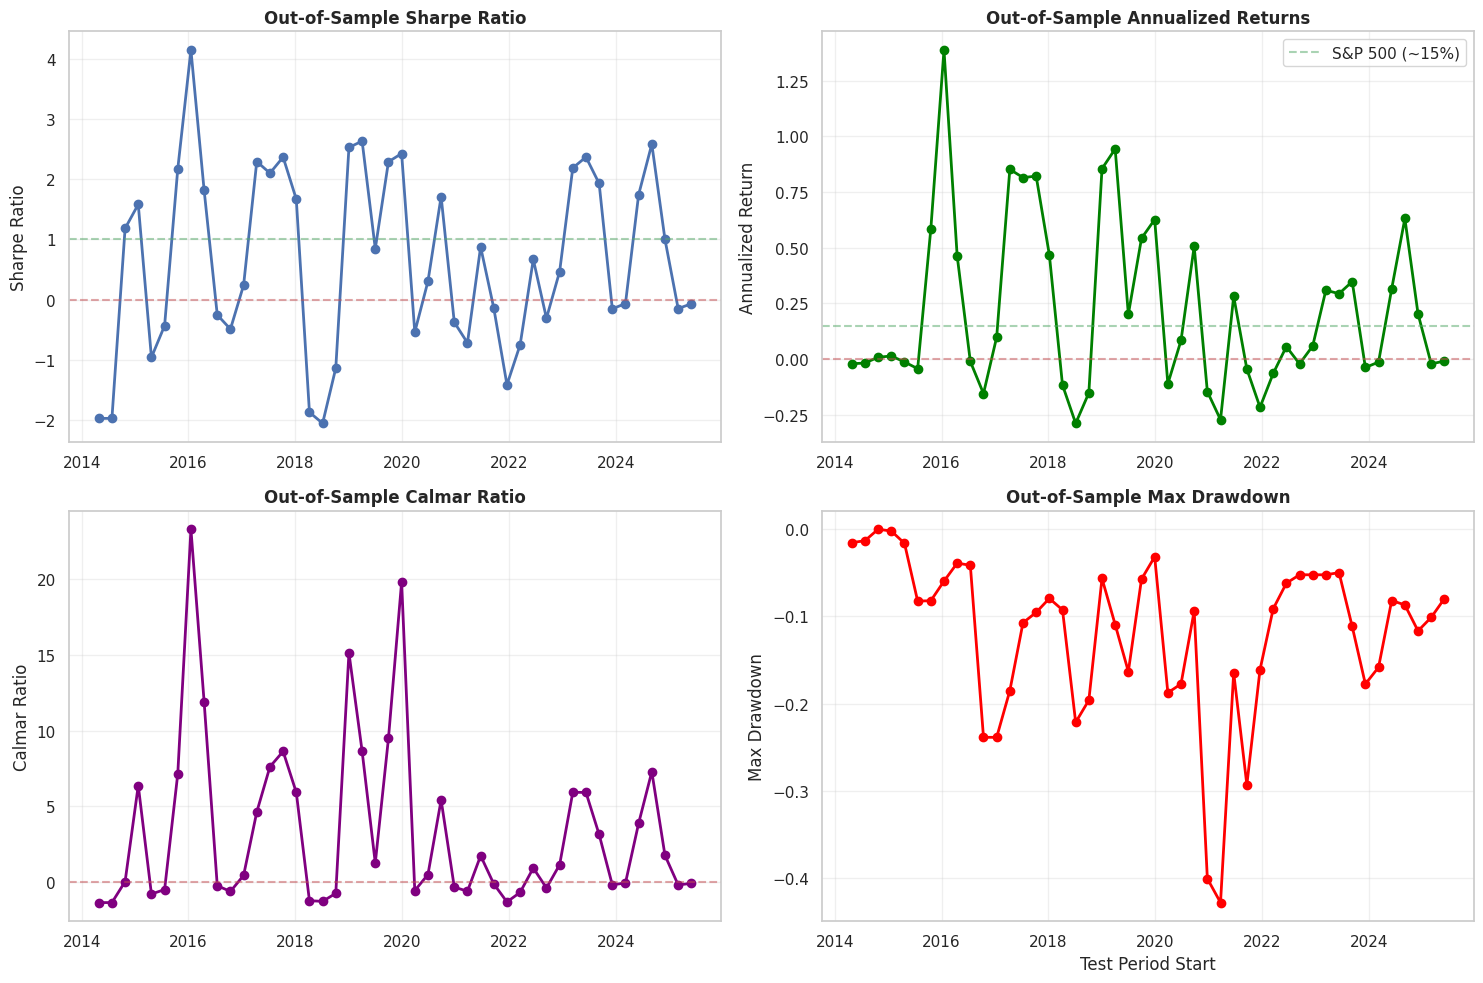


PARAMETER STABILITY ACROSS WALKS
       bull_top_n  bull_exposure  neutral_top_n  neutral_exposure  \
count   46.000000      46.000000      46.000000         46.000000   
mean     3.173913       0.923913       3.478261          0.752174   
std      0.383223       0.043127       0.505047          0.050505   
min      3.000000       0.900000       3.000000          0.700000   
25%      3.000000       0.900000       3.000000          0.700000   
50%      3.000000       0.900000       3.000000          0.800000   
75%      3.000000       0.900000       4.000000          0.800000   
max      4.000000       1.000000       4.000000          0.800000   

       bear_crash_top_n  bear_crash_exposure  bear_base_top_n  \
count         46.000000            46.000000        46.000000   
mean           1.347826             0.243478         2.195652   
std            0.481543             0.050121         0.401085   
min            1.000000             0.200000         2.000000   
25%            1.00

In [ ]:
import pandas as pd
import numpy as np
from itertools import product
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm

# =============================================================================
# WALK FORWARD OPTIMIZATION FOR ALLOCATION PARAMETERS
# =============================================================================

class AllocationOptimizer:
    """
    Walk forward optimization for portfolio allocation parameters.
    Uses pre-computed regimes to find optimal exposure and diversification settings.
    """

    def __init__(self, data_scaled, data_merged, core_coins):
        self.data_scaled = data_scaled.copy()
        self.data_merged = data_merged.copy()
        self.core_coins = core_coins

    def compute_allocations(self, regimes, params):
        """
        Compute portfolio allocations based on regimes and allocation parameters.

        Parameters:
        -----------
        regimes : Series
            Pre-computed regime classifications
        params : dict
            Allocation parameters:
                - bull_top_n: Number of top coins in bull market
                - bull_exposure: Total exposure in bull market
                - neutral_top_n: Number of top coins in neutral market
                - neutral_exposure: Total exposure in neutral market
                - bear_crash_top_n: Coins in severe bear (-0.05 < btc_mom)
                - bear_crash_exposure: Exposure in severe bear
                - bear_base_top_n: Coins in moderate bear (-0.05 < btc_mom < 0.05)
                - bear_base_exposure: Exposure in moderate bear
                - bear_transition_top_n: Coins in bear transition (btc_mom > 0.05)
                - bear_transition_exposure: Exposure in bear transition
                - funding_tilt: Funding rate adjustment magnitude (0-0.1)
                - use_equal_weight: If True, equal weight; if False, momentum weight
        """
        allocations = pd.DataFrame(0.0, index=regimes.index, columns=self.core_coins)

        # Weekly rebalance + regime flips
        weekly_rebalance = regimes.resample('W-FRI').last().index
        regime_changed = regimes.index[regimes != regimes.shift(1)]
        rebalance_dates = weekly_rebalance.union(regime_changed).sort_values()

        for date in rebalance_dates:
            if date not in regimes.index:
                continue

            regime = regimes.loc[date]

            # Determine exposure and top_n by regime
            if regime == 'Bull':
                top_n = params['bull_top_n']
                exposure = params['bull_exposure']
            elif regime == 'Neutral':
                top_n = params['neutral_top_n']
                exposure = params['neutral_exposure']
            elif regime == 'Bear':
                # Bear sub-phases using BTC momentum
                btc_mom = self.data_scaled.loc[date, 'bitcoin_momentum_12w']
                if btc_mom < -0.05:  # Bear-Crash
                    top_n = params['bear_crash_top_n']
                    exposure = params['bear_crash_exposure']
                elif btc_mom < 0.05:  # Bear-Base
                    top_n = params['bear_base_top_n']
                    exposure = params['bear_base_exposure']
                else:  # Transition
                    top_n = params['bear_transition_top_n']
                    exposure = params['bear_transition_exposure']
            else:
                continue

            # Get coin momentum
            coin_momentum = {
                coin: self.data_scaled.loc[date, f'{coin}_momentum_12w']
                for coin in self.core_coins
                if f'{coin}_momentum_12w' in self.data_scaled.columns
                and not pd.isna(self.data_scaled.loc[date, f'{coin}_momentum_12w'])
            }

            if not coin_momentum:
                continue

            # Select top N coins by momentum
            top_coins = sorted(coin_momentum, key=coin_momentum.get, reverse=True)[:top_n]

            # Determine weighting scheme
            if params['use_equal_weight']:
                # Equal weight
                weights = np.ones(len(top_coins)) / len(top_coins)
            else:
                # Momentum-weighted allocations
                weights = np.array([coin_momentum[c] for c in top_coins])
                weights = np.maximum(weights, 0)
                if weights.sum() > 0:
                    weights = weights / weights.sum()
                else:
                    weights = np.ones(len(top_coins)) / len(top_coins)

            allocations.loc[date, top_coins] = exposure * weights

            # Optional: funding rate tilt
            if params['funding_tilt'] > 0:
                if 'bitcoin_fundingRateDaily' in self.data_scaled.columns:
                    for coin in ['bitcoin', 'ethereum']:
                        if coin in top_coins and f'{coin}_fundingRateDaily' in self.data_scaled.columns:
                            fr = self.data_scaled.loc[date, f'{coin}_fundingRateDaily']
                            allocations.loc[date, coin] += params['funding_tilt'] * np.sign(fr)

        # HOLD positions
        allocations = allocations.clip(0, 1)
        allocations = allocations.ffill().fillna(0)

        return allocations

    def backtest_allocations(self, allocations, start_date, end_date):
        """Compute portfolio returns for given allocations."""
        price_cols = [f'{coin}_combined_prices_daily' for coin in self.core_coins
                     if f'{coin}_combined_prices_daily' in self.data_merged.columns]

        # Compute daily returns
        daily_returns = self.data_merged[price_cols].ffill().pct_change().fillna(0)
        daily_returns.columns = self.core_coins

        # Filter by date range
        mask = (daily_returns.index >= start_date) & (daily_returns.index <= end_date)
        daily_returns = daily_returns[mask]
        allocations = allocations.reindex(daily_returns.index).ffill().fillna(0)

        # Portfolio returns
        portfolio_returns = (daily_returns * allocations.shift(1)).sum(axis=1)

        # Performance metrics
        cum_return = (1 + portfolio_returns).prod() - 1
        ann_return = (1 + cum_return) ** (252 / len(portfolio_returns)) - 1 if len(portfolio_returns) > 0 else 0
        volatility = portfolio_returns.std() * np.sqrt(252) if len(portfolio_returns) > 0 else 0
        sharpe = ann_return / volatility if volatility > 0 else 0

        # Drawdown
        cum_rets = (1 + portfolio_returns).cumprod()
        running_max = cum_rets.cummax()
        drawdown = (cum_rets - running_max) / running_max
        max_dd = drawdown.min()

        # Calmar ratio
        calmar = ann_return / abs(max_dd) if max_dd < 0 else 0

        return {
            'cum_return': cum_return,
            'ann_return': ann_return,
            'sharpe': sharpe,
            'max_dd': max_dd,
            'calmar': calmar,
            'returns': portfolio_returns
        }

    def forward_walk(self, param_grid, objective='sharpe',
                    train_window_days=365, test_window_days=180, step_days=90):
        """
        Forward walk optimization for allocation parameters.

        Parameters:
        -----------
        param_grid : dict
            Dictionary of parameter names to lists of values to test
        objective : str
            Optimization objective: 'sharpe', 'calmar', 'ann_return', or 'cum_return'
        train_window_days : int
            Length of training window in days
        test_window_days : int
            Length of test window in days
        step_days : int
            Days to step forward between iterations
        """
        # Generate all parameter combinations
        param_names = list(param_grid.keys())
        param_values = list(param_grid.values())
        param_combinations = list(product(*param_values))

        print(f"Testing {len(param_combinations)} parameter combinations")
        print(f"Optimization objective: {objective}")
        print(f"Training window: {train_window_days} days")
        print(f"Test window: {test_window_days} days")
        print(f"Step size: {step_days} days\n")

        # Get pre-computed regimes
        regimes = self.data_scaled['regime']

        # Create date ranges for forward walk
        start_date = regimes.index.min()
        end_date = regimes.index.max()

        walk_results = []

        current_start = start_date
        walk_num = 0

        while current_start + pd.Timedelta(days=train_window_days + test_window_days) <= end_date:
            walk_num += 1
            train_end = current_start + pd.Timedelta(days=train_window_days)
            test_start = train_end
            test_end = test_start + pd.Timedelta(days=test_window_days)

            print(f"\n{'='*60}")
            print(f"Walk #{walk_num}")
            print(f"Train: {current_start.date()} to {train_end.date()}")
            print(f"Test:  {test_start.date()} to {test_end.date()}")
            print(f"{'='*60}")

            # Get train and test regimes
            train_mask = (regimes.index >= current_start) & (regimes.index < train_end)
            train_regimes = regimes[train_mask]

            best_score = -np.inf
            best_params = None

            # Test each parameter combination on training data
            for i, param_vals in enumerate(tqdm(param_combinations, desc=f"Walk {walk_num} - Training")):
                params = dict(zip(param_names, param_vals))

                try:
                    # Compute allocations
                    allocations = self.compute_allocations(train_regimes, params)

                    # Backtest on training period
                    results = self.backtest_allocations(allocations, current_start, train_end)

                    # Get objective score
                    score = results[objective]

                    if score > best_score:
                        best_score = score
                        best_params = params.copy()

                except Exception as e:
                    continue

            print(f"\nBest training {objective}: {best_score:.3f}")
            print(f"Best parameters: {best_params}")

            # Test best parameters on out-of-sample data
            test_mask = (regimes.index >= test_start) & (regimes.index < test_end)
            test_regimes = regimes[test_mask]

            allocations = self.compute_allocations(test_regimes, best_params)
            test_results = self.backtest_allocations(allocations, test_start, test_end)

            print(f"\nOut-of-sample performance:")
            print(f"  Cumulative Return: {test_results['cum_return']:.2%}")
            print(f"  Annualized Return: {test_results['ann_return']:.2%}")
            print(f"  Sharpe Ratio: {test_results['sharpe']:.3f}")
            print(f"  Calmar Ratio: {test_results['calmar']:.3f}")
            print(f"  Max Drawdown: {test_results['max_dd']:.2%}")

            walk_results.append({
                'walk_num': walk_num,
                'train_start': current_start,
                'train_end': train_end,
                'test_start': test_start,
                'test_end': test_end,
                'best_params': best_params,
                'train_score': best_score,
                'test_cum_return': test_results['cum_return'],
                'test_ann_return': test_results['ann_return'],
                'test_sharpe': test_results['sharpe'],
                'test_calmar': test_results['calmar'],
                'test_max_dd': test_results['max_dd']
            })

            current_start += pd.Timedelta(days=step_days)

        return pd.DataFrame(walk_results)


# =============================================================================
# USAGE EXAMPLE
# =============================================================================

# Define parameter grid to search
param_grid = {
    # Bull market parameters
    'bull_top_n': [3, 4, 5],
    'bull_exposure': [0.8, 1.0, 1.2],  # Test leverage

    # Neutral market parameters
    'neutral_top_n': [2, 3, 4],
    'neutral_exposure': [0.5, 0.7, 0.9],

    # Bear market crash parameters
    'bear_crash_top_n': [1, 2],
    'bear_crash_exposure': [0.1, 0.2, 0.3],

    # Bear market base parameters
    'bear_base_top_n': [1, 2, 3],
    'bear_base_exposure': [0.3, 0.4, 0.5],

    # Bear transition parameters
    'bear_transition_top_n': [2, 3],
    'bear_transition_exposure': [0.5, 0.6, 0.7],

    # Additional parameters
    'funding_tilt': [0.0, 0.05],
    'use_equal_weight': [False, True]
}

# For faster testing, use a smaller grid
param_grid_fast = {
    'bull_top_n': [3, 4],
    'bull_exposure': [0.9, 1.0],
    'neutral_top_n': [3, 4],
    'neutral_exposure': [0.7, 0.8],
    'bear_crash_top_n': [1, 2],
    'bear_crash_exposure': [0.2, 0.3],
    'bear_base_top_n': [2, 3],
    'bear_base_exposure': [0.4, 0.5],
    'bear_transition_top_n': [2, 3],
    'bear_transition_exposure': [0.6, 0.7],
    'funding_tilt': [0.0, 0.05],
    'use_equal_weight': [False]
}

# Initialize optimizer
optimizer = AllocationOptimizer(data_scaled, data_merged, core_coins)

# Run forward walk optimization
# Choose objective: 'sharpe' for risk-adjusted, 'calmar' for drawdown-adjusted, 'ann_return' for raw returns
results = optimizer.forward_walk(
    param_grid=param_grid_fast,  # Use param_grid for full search
    objective='sharpe',  # or 'calmar', 'ann_return'
    train_window_days=365,
    test_window_days=180,
    step_days=90
)

# Display results
print("\n" + "="*80)
print("ALLOCATION OPTIMIZATION RESULTS")
print("="*80)
print(results[['walk_num', 'test_ann_return', 'test_sharpe', 'test_calmar', 'test_max_dd']])

# Save results
results.to_csv('allocation_walk_forward_results.csv', index=False)

# =============================================================================
# VISUALIZATION
# =============================================================================

fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Plot 1: Out-of-sample Sharpe Ratio
axes[0, 0].plot(results['test_start'], results['test_sharpe'], marker='o', linewidth=2)
axes[0, 0].axhline(y=0, color='r', linestyle='--', alpha=0.5)
axes[0, 0].axhline(y=1, color='g', linestyle='--', alpha=0.5)
axes[0, 0].set_title('Out-of-Sample Sharpe Ratio', fontsize=12, fontweight='bold')
axes[0, 0].set_ylabel('Sharpe Ratio')
axes[0, 0].grid(True, alpha=0.3)

# Plot 2: Annualized Returns
axes[0, 1].plot(results['test_start'], results['test_ann_return'], marker='o', linewidth=2, color='green')
axes[0, 1].axhline(y=0, color='r', linestyle='--', alpha=0.5)
axes[0, 1].axhline(y=0.15, color='g', linestyle='--', alpha=0.5, label='S&P 500 (~15%)')
axes[0, 1].set_title('Out-of-Sample Annualized Returns', fontsize=12, fontweight='bold')
axes[0, 1].set_ylabel('Annualized Return')
axes[0, 1].legend()
axes[0, 1].grid(True, alpha=0.3)

# Plot 3: Calmar Ratio
axes[1, 0].plot(results['test_start'], results['test_calmar'], marker='o', linewidth=2, color='purple')
axes[1, 0].axhline(y=0, color='r', linestyle='--', alpha=0.5)
axes[1, 0].set_title('Out-of-Sample Calmar Ratio', fontsize=12, fontweight='bold')
axes[1, 0].set_ylabel('Calmar Ratio')
axes[1, 0].grid(True, alpha=0.3)

# Plot 4: Max Drawdown
axes[1, 1].plot(results['test_start'], results['test_max_dd'], marker='o', linewidth=2, color='red')
axes[1, 1].set_title('Out-of-Sample Max Drawdown', fontsize=12, fontweight='bold')
axes[1, 1].set_ylabel('Max Drawdown')
axes[1, 1].set_xlabel('Test Period Start')
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# =============================================================================
# PARAMETER ANALYSIS
# =============================================================================

# Extract best parameters from each walk
param_evolution = pd.DataFrame([r['best_params'] for r in results.to_dict('records')])
param_evolution['walk_num'] = results['walk_num'].values

print("\n" + "="*80)
print("PARAMETER STABILITY ACROSS WALKS")
print("="*80)
print(param_evolution.describe())

# =============================================================================
# FINAL RECOMMENDATIONS
# =============================================================================

print("\n" + "="*80)
print("FINAL ALLOCATION PARAMETER RECOMMENDATIONS")
print("="*80)

recommendations = {}
for param in param_grid_fast.keys():
    if param in param_evolution.columns:
        recommendations[param] = {
            'median': param_evolution[param].median(),
            'mode': param_evolution[param].mode()[0] if len(param_evolution[param].mode()) > 0 else None,
            'mean': param_evolution[param].mean()
        }

for param, stats in recommendations.items():
    print(f"\n{param}:")
    print(f"  Median: {stats['median']}")
    print(f"  Mode:   {stats['mode']}")
    if isinstance(stats['mean'], (int, float)):
        print(f"  Mean:   {stats['mean']:.3f}")

print("\n" + "="*80)
print(f"Average out-of-sample Annualized Return: {results['test_ann_return'].mean():.2%}")
print(f"Average out-of-sample Sharpe Ratio: {results['test_sharpe'].mean():.3f}")
print(f"Average out-of-sample Calmar Ratio: {results['test_calmar'].mean():.3f}")
print(f"Average Max Drawdown: {results['test_max_dd'].mean():.2%}")
print("="*80)

##Regime tuning part 2

In [ ]:
import pandas as pd
import numpy as np
from itertools import product
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm

# =============================================================================
# OPTIMAL ALLOCATION PARAMETERS (FIXED)
# =============================================================================
OPTIMAL_ALLOC_PARAMS = {
    'bull_top_n': 3,
    'bull_exposure': 0.95,
    'neutral_top_n': 3,
    'neutral_exposure': 0.75,
    'bear_crash_top_n': 1,
    'bear_crash_exposure': 0.25,
    'bear_base_top_n': 2,
    'bear_base_exposure': 0.45,
    'bear_transition_top_n': 2,
    'bear_transition_exposure': 0.65,
    'funding_tilt': 0.025,
    'bear_crash_threshold': -0.05
}

# =============================================================================
# FORWARD WALK OPTIMIZATION FOR REGIME PREDICTION PARAMETERS ONLY
# =============================================================================
class RegimeOptimizer:
    """
    Forward walk optimization for REGIME DETECTION parameters.
    Uses FIXED optimal allocation rules.
    """

    def __init__(self, data_scaled, data_merged, core_coins):
        self.data_scaled = data_scaled.copy()
        self.data_merged = data_merged.copy()
        self.core_coins = core_coins
        self.alloc_params = OPTIMAL_ALLOC_PARAMS

    def detect_regime(self, data, params):
        """Detect regimes (unchanged from original)."""
        momentum_cols = [f'{coin}_momentum_12w' for coin in self.core_coins
                        if f'{coin}_momentum_12w' in data.columns]
        vol_cols = [col for col in data.columns if 'realized_vol' in col or 'vol' in col]
        funding_cols = [col for col in data.columns if 'funding' in col]
        ma_spread_cols = [col for col in data.columns if 'ma_spread' in col]
        divergence_cols = [col for col in data.columns if 'divergence_vol_price_div' in col]

        all_score_cols = momentum_cols + vol_cols + funding_cols + ma_spread_cols + divergence_cols

        data_z = data[all_score_cols].copy()
        data_z = (data_z - data_z.mean()) / data_z.std()

        regime_score_raw = params['w_mom'] * data_z[momentum_cols].mean(axis=1)
        regime_score_raw -= params['w_vol'] * data_z[vol_cols].mean(axis=1)

        if funding_cols: regime_score_raw += params['w_fund'] * data_z[funding_cols].mean(axis=1)
        if ma_spread_cols: regime_score_raw += params['w_ma'] * data_z[ma_spread_cols].mean(axis=1)
        if divergence_cols: regime_score_raw += params['w_div'] * data_z[divergence_cols].mean(axis=1)

        regime_score = regime_score_raw.ewm(span=params['ema_span'], adjust=False).mean()

        regimes = []
        current_regime = 'Neutral'

        for score in regime_score:
            if current_regime == 'Neutral':
                if score > params['bull_enter']: current_regime = 'Bull'
                elif score < params['bear_enter']: current_regime = 'Bear'
            elif current_regime == 'Bull':
                if score < params['bull_exit']: current_regime = 'Neutral'
            elif current_regime == 'Bear':
                if score > params['bear_exit']: current_regime = 'Neutral'
            regimes.append(current_regime)

        regime_series = pd.Series(regimes, index=data.index)

        last_change = data.index[0]
        final_regimes = []
        for date, reg in zip(regime_series.index, regime_series):
            if final_regimes and reg != final_regimes[-1]:
                if (date - last_change).days < params['min_days']:
                    reg = final_regimes[-1]
                else:
                    last_change = date
            final_regimes.append(reg)

        return pd.Series(final_regimes, index=data.index)

    def compute_allocations_optimal(self, regimes, data):
        """FIXED optimal allocation rules."""
        allocations = pd.DataFrame(0.0, index=regimes.index, columns=self.core_coins)

        weekly_rebalance = regimes.resample('W-FRI').last().index
        regime_flips = regimes.index[regimes != regimes.shift(1)]
        rebalance_dates = weekly_rebalance.union(regime_flips).sort_values()

        for date in rebalance_dates:
            if date not in regimes.index: continue

            regime = regimes.loc[date]

            # ✅ FIXED OPTIMAL ALLOCATION PARAMETERS
            if regime == 'Bull':
                top_n, exposure = self.alloc_params['bull_top_n'], self.alloc_params['bull_exposure']
            elif regime == 'Neutral':
                top_n, exposure = self.alloc_params['neutral_top_n'], self.alloc_params['neutral_exposure']
            elif regime == 'Bear':
                btc_mom = data.loc[date, 'bitcoin_momentum_12w']
                if btc_mom < self.alloc_params['bear_crash_threshold']:
                    top_n, exposure = self.alloc_params['bear_crash_top_n'], self.alloc_params['bear_crash_exposure']
                elif btc_mom < 0.05:
                    top_n, exposure = self.alloc_params['bear_base_top_n'], self.alloc_params['bear_base_exposure']
                else:
                    top_n, exposure = self.alloc_params['bear_transition_top_n'], self.alloc_params['bear_transition_exposure']

            coin_momentum = {
                coin: data.loc[date, f'{coin}_momentum_12w']
                for coin in self.core_coins
                if f'{coin}_momentum_12w' in data.columns and not pd.isna(data.loc[date, f'{coin}_momentum_12w'])
            }

            if not coin_momentum: continue

            top_coins = sorted(coin_momentum, key=coin_momentum.get, reverse=True)[:top_n]
            weights = np.array([coin_momentum[c] for c in top_coins])
            weights = np.maximum(weights, 0)
            if weights.sum() > 0:
                weights = weights / weights.sum()
            else:
                weights = np.ones(len(top_coins)) / len(top_coins)

            allocations.loc[date, top_coins] = exposure * weights

            # Optimal funding tilt
            funding_tilt = self.alloc_params['funding_tilt']
            for coin in ['bitcoin', 'ethereum']:
                if coin in top_coins and f'{coin}_fundingRateDaily' in data.columns:
                    fr = data.loc[date, f'{coin}_fundingRateDaily']
                    allocations.loc[date, coin] += funding_tilt * np.sign(fr)

        return allocations.clip(0, 1).ffill().fillna(0)

    def backtest_portfolio(self, allocations, start_date, end_date):
        """Unchanged backtest."""
        price_cols = [f'{coin}_combined_prices_daily' for coin in self.core_coins
                     if f'{coin}_combined_prices_daily' in self.data_merged.columns]

        daily_returns = self.data_merged[price_cols].ffill().pct_change().fillna(0)
        daily_returns.columns = self.core_coins

        mask = (daily_returns.index >= start_date) & (daily_returns.index <= end_date)
        daily_returns = daily_returns[mask]
        allocations = allocations.reindex(daily_returns.index).ffill().fillna(0)

        portfolio_returns = (daily_returns * allocations.shift(1)).sum(axis=1)

        cum_return = (1 + portfolio_returns).prod() - 1
        sharpe = portfolio_returns.mean() / portfolio_returns.std() * np.sqrt(252) if portfolio_returns.std() > 0 else 0
        max_dd = (portfolio_returns.cumsum() - portfolio_returns.cumsum().cummax()).min()

        return {'cum_return': cum_return, 'sharpe': sharpe, 'max_dd': max_dd, 'returns': portfolio_returns}

    def forward_walk(self, param_grid, train_window_days=365, test_window_days=180, step_days=90):
        """Forward walk - optimizes REGIME params only."""
        param_names = list(param_grid.keys())
        param_values = list(param_grid.values())
        param_combinations = list(product(*param_values))

        print(f"Testing {len(param_combinations)} REGIME combinations (FIXED optimal allocations)")
        print(f"Training window: {train_window_days} days")
        print(f"Test window: {test_window_days} days")
        print(f"Step size: {step_days} days\n")

        start_date = self.data_scaled.index.min()
        end_date = self.data_scaled.index.max()
        walk_results = []
        current_start = start_date
        walk_num = 0

        while current_start + pd.Timedelta(days=train_window_days + test_window_days) <= end_date:
            walk_num += 1
            train_end = current_start + pd.Timedelta(days=train_window_days)
            test_start = train_end
            test_end = test_start + pd.Timedelta(days=test_window_days)

            print(f"\n{'='*60}")
            print(f"Walk #{walk_num}")
            print(f"Train: {current_start.date()} to {train_end.date()}")
            print(f"Test:  {test_start.date()} to {test_end.date()}")
            print(f"{'='*60}")

            train_mask = (self.data_scaled.index >= current_start) & (self.data_scaled.index < train_end)
            train_data = self.data_scaled[train_mask]

            best_sharpe = -np.inf
            best_params = None

            for i, param_vals in enumerate(tqdm(param_combinations, desc=f"Walk {walk_num} - Training")):
                params = dict(zip(param_names, param_vals))

                try:
                    regimes = self.detect_regime(train_data, params)
                    allocations = self.compute_allocations_optimal(regimes, train_data)
                    results = self.backtest_portfolio(allocations, current_start, train_end)

                    if results['sharpe'] > best_sharpe:
                        best_sharpe = results['sharpe']
                        best_params = params.copy()
                except:
                    continue

            print(f"\nBest training Sharpe: {best_sharpe:.3f}")
            print(f"Best regime params: {best_params}")

            # OOS test
            test_mask = (self.data_scaled.index >= test_start) & (self.data_scaled.index < test_end)
            test_data = self.data_scaled[test_mask]

            regimes = self.detect_regime(test_data, best_params)
            allocations = self.compute_allocations_optimal(regimes, test_data)
            test_results = self.backtest_portfolio(allocations, test_start, test_end)

            print(f"\nOut-of-sample performance:")
            print(f"  Cumulative Return: {test_results['cum_return']:.2%}")
            print(f"  Sharpe Ratio: {test_results['sharpe']:.3f}")
            print(f"  Max Drawdown: {test_results['max_dd']:.2%}")

            walk_results.append({
                'walk_num': walk_num, 'train_start': current_start, 'train_end': train_end,
                'test_start': test_start, 'test_end': test_end, 'best_params': best_params,
                'train_sharpe': best_sharpe, 'test_sharpe': test_results['sharpe'],
                'test_cum_return': test_results['cum_return'], 'test_max_dd': test_results['max_dd']
            })

            current_start += pd.Timedelta(days=step_days)

        return pd.DataFrame(walk_results)

# =============================================================================
# REGIME PARAMETER GRID (~729 combinations, ~20min/walk)
# =============================================================================
param_grid = {
    # Feature weights (include these - you wanted weights tested)
    'w_mom': [1.0, 1.2],
    'w_vol': [0.8, 1.0],
    'w_fund': [0.3, 0.5],
    'w_ma': [0.3, 0.5],
    'w_div': [0.3, 0.5],

    # Key regime timing params (fix others to reduce combos)
    'ema_span': [7, 30],      # Shorter to fix lag
    'bull_enter': [0.5, 0.6],
    'bull_exit': [0.1, 0.2],  # Lower for faster exits
    'bear_enter': [-0.7, -0.6],
    'bear_exit': [-0.3, -0.2],
    'min_days': [21]
}

# =============================================================================
# RUN OPTIMIZATION
# =============================================================================
optimizer = RegimeOptimizer(data_scaled, data_merged, core_coins)
results = optimizer.forward_walk(
    param_grid=param_grid,
    train_window_days=365,
    test_window_days=180,
    step_days=90
)

# [Keep all your existing visualization code unchanged]
print("\n" + "="*80)
print("REGIME OPTIMIZATION RESULTS (w/ FIXED optimal allocations)")
print("="*80)
print(results)
results.to_csv('regime_walk_results.csv', index=False)


Testing 1024 REGIME combinations (FIXED optimal allocations)
Training window: 365 days
Test window: 180 days
Step size: 90 days


Walk #1
Train: 2013-04-28 to 2014-04-28
Test:  2014-04-28 to 2014-10-25


Walk 1 - Training: 100%|██████████| 1024/1024 [01:25<00:00, 11.98it/s]



Best training Sharpe: 0.586
Best regime params: {'w_mom': 1.0, 'w_vol': 1.0, 'w_fund': 0.3, 'w_ma': 0.5, 'w_div': 0.3, 'ema_span': 7, 'bull_enter': 0.6, 'bull_exit': 0.1, 'bear_enter': -0.7, 'bear_exit': -0.3, 'min_days': 21}

Out-of-sample performance:
  Cumulative Return: -0.78%
  Sharpe Ratio: -0.514
  Max Drawdown: -2.08%

Walk #2
Train: 2013-07-27 to 2014-07-27
Test:  2014-07-27 to 2015-01-23


Walk 2 - Training: 100%|██████████| 1024/1024 [01:26<00:00, 11.86it/s]



Best training Sharpe: 0.603
Best regime params: {'w_mom': 1.2, 'w_vol': 0.8, 'w_fund': 0.3, 'w_ma': 0.5, 'w_div': 0.3, 'ema_span': 7, 'bull_enter': 0.5, 'bull_exit': 0.1, 'bear_enter': -0.7, 'bear_exit': -0.3, 'min_days': 21}

Out-of-sample performance:
  Cumulative Return: -0.43%
  Sharpe Ratio: -0.228
  Max Drawdown: -2.11%

Walk #3
Train: 2013-10-25 to 2014-10-25
Test:  2014-10-25 to 2015-04-23


Walk 3 - Training: 100%|██████████| 1024/1024 [01:25<00:00, 12.02it/s]



Best training Sharpe: 0.267
Best regime params: {'w_mom': 1.2, 'w_vol': 0.8, 'w_fund': 0.3, 'w_ma': 0.5, 'w_div': 0.5, 'ema_span': 7, 'bull_enter': 0.5, 'bull_exit': 0.2, 'bear_enter': -0.7, 'bear_exit': -0.3, 'min_days': 21}

Out-of-sample performance:
  Cumulative Return: 0.76%
  Sharpe Ratio: 1.180
  Max Drawdown: 0.00%

Walk #4
Train: 2014-01-23 to 2015-01-23
Test:  2015-01-23 to 2015-07-22


Walk 4 - Training: 100%|██████████| 1024/1024 [01:22<00:00, 12.36it/s]



Best training Sharpe: -0.750
Best regime params: {'w_mom': 1.0, 'w_vol': 0.8, 'w_fund': 0.3, 'w_ma': 0.3, 'w_div': 0.3, 'ema_span': 7, 'bull_enter': 0.5, 'bull_exit': 0.1, 'bear_enter': -0.7, 'bear_exit': -0.3, 'min_days': 21}

Out-of-sample performance:
  Cumulative Return: 1.22%
  Sharpe Ratio: 1.430
  Max Drawdown: -0.31%

Walk #5
Train: 2014-04-23 to 2015-04-23
Test:  2015-04-23 to 2015-10-20


Walk 5 - Training: 100%|██████████| 1024/1024 [01:20<00:00, 12.77it/s]



Best training Sharpe: 0.482
Best regime params: {'w_mom': 1.0, 'w_vol': 0.8, 'w_fund': 0.3, 'w_ma': 0.5, 'w_div': 0.3, 'ema_span': 30, 'bull_enter': 0.5, 'bull_exit': 0.1, 'bear_enter': -0.7, 'bear_exit': -0.3, 'min_days': 21}

Out-of-sample performance:
  Cumulative Return: -1.65%
  Sharpe Ratio: -1.099
  Max Drawdown: -2.46%

Walk #6
Train: 2014-07-22 to 2015-07-22
Test:  2015-07-22 to 2016-01-18


Walk 6 - Training: 100%|██████████| 1024/1024 [01:20<00:00, 12.70it/s]



Best training Sharpe: 0.163
Best regime params: {'w_mom': 1.2, 'w_vol': 0.8, 'w_fund': 0.3, 'w_ma': 0.5, 'w_div': 0.3, 'ema_span': 7, 'bull_enter': 0.6, 'bull_exit': 0.1, 'bear_enter': -0.7, 'bear_exit': -0.3, 'min_days': 21}

Out-of-sample performance:
  Cumulative Return: -5.78%
  Sharpe Ratio: -0.578
  Max Drawdown: -11.66%

Walk #7
Train: 2014-10-20 to 2015-10-20
Test:  2015-10-20 to 2016-04-17


Walk 7 - Training: 100%|██████████| 1024/1024 [01:19<00:00, 12.90it/s]



Best training Sharpe: -0.468
Best regime params: {'w_mom': 1.0, 'w_vol': 0.8, 'w_fund': 0.3, 'w_ma': 0.3, 'w_div': 0.3, 'ema_span': 7, 'bull_enter': 0.6, 'bull_exit': 0.1, 'bear_enter': -0.7, 'bear_exit': -0.3, 'min_days': 21}

Out-of-sample performance:
  Cumulative Return: 29.59%
  Sharpe Ratio: 1.575
  Max Drawdown: -9.26%

Walk #8
Train: 2015-01-18 to 2016-01-18
Test:  2016-01-18 to 2016-07-16


Walk 8 - Training: 100%|██████████| 1024/1024 [01:23<00:00, 12.27it/s]



Best training Sharpe: 0.236
Best regime params: {'w_mom': 1.0, 'w_vol': 0.8, 'w_fund': 0.3, 'w_ma': 0.3, 'w_div': 0.3, 'ema_span': 30, 'bull_enter': 0.6, 'bull_exit': 0.1, 'bear_enter': -0.7, 'bear_exit': -0.3, 'min_days': 21}

Out-of-sample performance:
  Cumulative Return: 67.54%
  Sharpe Ratio: 2.607
  Max Drawdown: -6.51%

Walk #9
Train: 2015-04-18 to 2016-04-17
Test:  2016-04-17 to 2016-10-14


Walk 9 - Training: 100%|██████████| 1024/1024 [01:23<00:00, 12.23it/s]



Best training Sharpe: 1.310
Best regime params: {'w_mom': 1.2, 'w_vol': 0.8, 'w_fund': 0.3, 'w_ma': 0.5, 'w_div': 0.5, 'ema_span': 7, 'bull_enter': 0.5, 'bull_exit': 0.1, 'bear_enter': -0.7, 'bear_exit': -0.3, 'min_days': 21}

Out-of-sample performance:
  Cumulative Return: 38.43%
  Sharpe Ratio: 1.926
  Max Drawdown: -3.70%

Walk #10
Train: 2015-07-17 to 2016-07-16
Test:  2016-07-16 to 2017-01-12


Walk 10 - Training: 100%|██████████| 1024/1024 [01:28<00:00, 11.60it/s]



Best training Sharpe: 1.873
Best regime params: {'w_mom': 1.2, 'w_vol': 0.8, 'w_fund': 0.3, 'w_ma': 0.5, 'w_div': 0.5, 'ema_span': 30, 'bull_enter': 0.6, 'bull_exit': 0.1, 'bear_enter': -0.6, 'bear_exit': -0.2, 'min_days': 21}

Out-of-sample performance:
  Cumulative Return: -0.97%
  Sharpe Ratio: -0.247
  Max Drawdown: -5.89%

Walk #11
Train: 2015-10-15 to 2016-10-14
Test:  2016-10-14 to 2017-04-12


Walk 11 - Training: 100%|██████████| 1024/1024 [01:30<00:00, 11.36it/s]



Best training Sharpe: 2.168
Best regime params: {'w_mom': 1.0, 'w_vol': 1.0, 'w_fund': 0.5, 'w_ma': 0.5, 'w_div': 0.3, 'ema_span': 30, 'bull_enter': 0.5, 'bull_exit': 0.1, 'bear_enter': -0.6, 'bear_exit': -0.3, 'min_days': 21}

Out-of-sample performance:
  Cumulative Return: -14.46%
  Sharpe Ratio: -0.539
  Max Drawdown: -23.31%

Walk #12
Train: 2016-01-13 to 2017-01-12
Test:  2017-01-12 to 2017-07-11


Walk 12 - Training: 100%|██████████| 1024/1024 [01:30<00:00, 11.37it/s]



Best training Sharpe: 2.132
Best regime params: {'w_mom': 1.0, 'w_vol': 0.8, 'w_fund': 0.5, 'w_ma': 0.3, 'w_div': 0.3, 'ema_span': 30, 'bull_enter': 0.5, 'bull_exit': 0.1, 'bear_enter': -0.7, 'bear_exit': -0.3, 'min_days': 21}

Out-of-sample performance:
  Cumulative Return: 22.72%
  Sharpe Ratio: 0.916
  Max Drawdown: -18.35%

Walk #13
Train: 2016-04-12 to 2017-04-12
Test:  2017-04-12 to 2017-10-09


Walk 13 - Training: 100%|██████████| 1024/1024 [01:34<00:00, 10.88it/s]



Best training Sharpe: 1.415
Best regime params: {'w_mom': 1.2, 'w_vol': 0.8, 'w_fund': 0.3, 'w_ma': 0.5, 'w_div': 0.5, 'ema_span': 30, 'bull_enter': 0.5, 'bull_exit': 0.1, 'bear_enter': -0.7, 'bear_exit': -0.3, 'min_days': 21}

Out-of-sample performance:
  Cumulative Return: 28.87%
  Sharpe Ratio: 1.268
  Max Drawdown: -20.79%

Walk #14
Train: 2016-07-11 to 2017-07-11
Test:  2017-07-11 to 2018-01-07


Walk 14 - Training: 100%|██████████| 1024/1024 [01:32<00:00, 11.07it/s]



Best training Sharpe: 0.777
Best regime params: {'w_mom': 1.0, 'w_vol': 0.8, 'w_fund': 0.5, 'w_ma': 0.5, 'w_div': 0.3, 'ema_span': 30, 'bull_enter': 0.6, 'bull_exit': 0.1, 'bear_enter': -0.6, 'bear_exit': -0.2, 'min_days': 21}

Out-of-sample performance:
  Cumulative Return: 23.75%
  Sharpe Ratio: 1.201
  Max Drawdown: -8.72%

Walk #15
Train: 2016-10-09 to 2017-10-09
Test:  2017-10-09 to 2018-04-07


Walk 15 - Training: 100%|██████████| 1024/1024 [01:37<00:00, 10.45it/s]



Best training Sharpe: 1.024
Best regime params: {'w_mom': 1.2, 'w_vol': 1.0, 'w_fund': 0.3, 'w_ma': 0.3, 'w_div': 0.3, 'ema_span': 7, 'bull_enter': 0.6, 'bull_exit': 0.1, 'bear_enter': -0.6, 'bear_exit': -0.2, 'min_days': 21}

Out-of-sample performance:
  Cumulative Return: 45.73%
  Sharpe Ratio: 1.718
  Max Drawdown: -10.78%

Walk #16
Train: 2017-01-07 to 2018-01-07
Test:  2018-01-07 to 2018-07-06


Walk 16 - Training: 100%|██████████| 1024/1024 [01:56<00:00,  8.81it/s]



Best training Sharpe: 1.361
Best regime params: {'w_mom': 1.2, 'w_vol': 0.8, 'w_fund': 0.5, 'w_ma': 0.5, 'w_div': 0.3, 'ema_span': 7, 'bull_enter': 0.5, 'bull_exit': 0.1, 'bear_enter': -0.7, 'bear_exit': -0.2, 'min_days': 21}

Out-of-sample performance:
  Cumulative Return: 30.60%
  Sharpe Ratio: 1.445
  Max Drawdown: -10.78%

Walk #17
Train: 2017-04-07 to 2018-04-07
Test:  2018-04-07 to 2018-10-04


Walk 17 - Training: 100%|██████████| 1024/1024 [01:36<00:00, 10.59it/s]



Best training Sharpe: 2.299
Best regime params: {'w_mom': 1.2, 'w_vol': 0.8, 'w_fund': 0.5, 'w_ma': 0.5, 'w_div': 0.5, 'ema_span': 7, 'bull_enter': 0.5, 'bull_exit': 0.1, 'bear_enter': -0.6, 'bear_exit': -0.2, 'min_days': 21}

Out-of-sample performance:
  Cumulative Return: -19.04%
  Sharpe Ratio: -2.109
  Max Drawdown: -24.30%

Walk #18
Train: 2017-07-06 to 2018-07-06
Test:  2018-07-06 to 2019-01-02


Walk 18 - Training: 100%|██████████| 1024/1024 [01:33<00:00, 10.94it/s]



Best training Sharpe: 1.645
Best regime params: {'w_mom': 1.0, 'w_vol': 0.8, 'w_fund': 0.5, 'w_ma': 0.3, 'w_div': 0.5, 'ema_span': 7, 'bull_enter': 0.6, 'bull_exit': 0.1, 'bear_enter': -0.6, 'bear_exit': -0.3, 'min_days': 21}

Out-of-sample performance:
  Cumulative Return: -17.73%
  Sharpe Ratio: -1.489
  Max Drawdown: -20.88%

Walk #19
Train: 2017-10-04 to 2018-10-04
Test:  2018-10-04 to 2019-04-02


Walk 19 - Training: 100%|██████████| 1024/1024 [01:30<00:00, 11.33it/s]



Best training Sharpe: 1.840
Best regime params: {'w_mom': 1.0, 'w_vol': 1.0, 'w_fund': 0.5, 'w_ma': 0.3, 'w_div': 0.3, 'ema_span': 30, 'bull_enter': 0.5, 'bull_exit': 0.2, 'bear_enter': -0.6, 'bear_exit': -0.2, 'min_days': 21}

Out-of-sample performance:
  Cumulative Return: 14.41%
  Sharpe Ratio: 1.045
  Max Drawdown: -19.68%

Walk #20
Train: 2018-01-02 to 2019-01-02
Test:  2019-01-02 to 2019-07-01


Walk 20 - Training: 100%|██████████| 1024/1024 [01:24<00:00, 12.07it/s]



Best training Sharpe: 1.259
Best regime params: {'w_mom': 1.2, 'w_vol': 1.0, 'w_fund': 0.3, 'w_ma': 0.3, 'w_div': 0.5, 'ema_span': 7, 'bull_enter': 0.6, 'bull_exit': 0.1, 'bear_enter': -0.7, 'bear_exit': -0.2, 'min_days': 21}

Out-of-sample performance:
  Cumulative Return: 36.32%
  Sharpe Ratio: 1.424
  Max Drawdown: -9.28%

Walk #21
Train: 2018-04-02 to 2019-04-02
Test:  2019-04-02 to 2019-09-29


Walk 21 - Training: 100%|██████████| 1024/1024 [01:25<00:00, 11.92it/s]



Best training Sharpe: 0.373
Best regime params: {'w_mom': 1.0, 'w_vol': 1.0, 'w_fund': 0.5, 'w_ma': 0.5, 'w_div': 0.5, 'ema_span': 30, 'bull_enter': 0.6, 'bull_exit': 0.1, 'bear_enter': -0.7, 'bear_exit': -0.3, 'min_days': 21}

Out-of-sample performance:
  Cumulative Return: 36.32%
  Sharpe Ratio: 1.312
  Max Drawdown: -14.96%

Walk #22
Train: 2018-07-01 to 2019-07-01
Test:  2019-07-01 to 2019-12-28


Walk 22 - Training: 100%|██████████| 1024/1024 [01:25<00:00, 11.93it/s]



Best training Sharpe: 1.347
Best regime params: {'w_mom': 1.2, 'w_vol': 0.8, 'w_fund': 0.3, 'w_ma': 0.5, 'w_div': 0.5, 'ema_span': 7, 'bull_enter': 0.5, 'bull_exit': 0.1, 'bear_enter': -0.7, 'bear_exit': -0.3, 'min_days': 21}

Out-of-sample performance:
  Cumulative Return: 13.94%
  Sharpe Ratio: 0.915
  Max Drawdown: -13.95%

Walk #23
Train: 2018-09-29 to 2019-09-29
Test:  2019-09-29 to 2020-03-27


Walk 23 - Training: 100%|██████████| 1024/1024 [01:26<00:00, 11.86it/s]



Best training Sharpe: 1.534
Best regime params: {'w_mom': 1.0, 'w_vol': 0.8, 'w_fund': 0.3, 'w_ma': 0.5, 'w_div': 0.3, 'ema_span': 7, 'bull_enter': 0.5, 'bull_exit': 0.1, 'bear_enter': -0.7, 'bear_exit': -0.2, 'min_days': 21}

Out-of-sample performance:
  Cumulative Return: 55.36%
  Sharpe Ratio: 2.075
  Max Drawdown: -6.15%

Walk #24
Train: 2018-12-28 to 2019-12-28
Test:  2019-12-28 to 2020-06-25


Walk 24 - Training: 100%|██████████| 1024/1024 [01:28<00:00, 11.55it/s]



Best training Sharpe: 1.840
Best regime params: {'w_mom': 1.0, 'w_vol': 1.0, 'w_fund': 0.5, 'w_ma': 0.3, 'w_div': 0.5, 'ema_span': 7, 'bull_enter': 0.6, 'bull_exit': 0.2, 'bear_enter': -0.7, 'bear_exit': -0.2, 'min_days': 21}

Out-of-sample performance:
  Cumulative Return: 23.36%
  Sharpe Ratio: 1.027
  Max Drawdown: -16.86%

Walk #25
Train: 2019-03-28 to 2020-03-27
Test:  2020-03-27 to 2020-09-23


Walk 25 - Training: 100%|██████████| 1024/1024 [01:32<00:00, 11.11it/s]



Best training Sharpe: 2.174
Best regime params: {'w_mom': 1.2, 'w_vol': 1.0, 'w_fund': 0.3, 'w_ma': 0.5, 'w_div': 0.5, 'ema_span': 7, 'bull_enter': 0.5, 'bull_exit': 0.2, 'bear_enter': -0.7, 'bear_exit': -0.2, 'min_days': 21}

Out-of-sample performance:
  Cumulative Return: -4.19%
  Sharpe Ratio: -0.170
  Max Drawdown: -17.42%

Walk #26
Train: 2019-06-26 to 2020-06-25
Test:  2020-06-25 to 2020-12-22


Walk 26 - Training: 100%|██████████| 1024/1024 [01:31<00:00, 11.23it/s]



Best training Sharpe: 1.915
Best regime params: {'w_mom': 1.2, 'w_vol': 0.8, 'w_fund': 0.5, 'w_ma': 0.5, 'w_div': 0.5, 'ema_span': 30, 'bull_enter': 0.6, 'bull_exit': 0.2, 'bear_enter': -0.7, 'bear_exit': -0.2, 'min_days': 21}

Out-of-sample performance:
  Cumulative Return: -2.33%
  Sharpe Ratio: -0.015
  Max Drawdown: -20.93%

Walk #27
Train: 2019-09-24 to 2020-09-23
Test:  2020-09-23 to 2021-03-22


Walk 27 - Training: 100%|██████████| 1024/1024 [01:26<00:00, 11.80it/s]



Best training Sharpe: 1.100
Best regime params: {'w_mom': 1.2, 'w_vol': 0.8, 'w_fund': 0.3, 'w_ma': 0.5, 'w_div': 0.5, 'ema_span': 30, 'bull_enter': 0.5, 'bull_exit': 0.1, 'bear_enter': -0.7, 'bear_exit': -0.3, 'min_days': 21}

Out-of-sample performance:
  Cumulative Return: 15.40%
  Sharpe Ratio: 0.930
  Max Drawdown: -11.67%

Walk #28
Train: 2019-12-23 to 2020-12-22
Test:  2020-12-22 to 2021-06-20


Walk 28 - Training: 100%|██████████| 1024/1024 [01:32<00:00, 11.12it/s]



Best training Sharpe: 1.473
Best regime params: {'w_mom': 1.2, 'w_vol': 0.8, 'w_fund': 0.3, 'w_ma': 0.3, 'w_div': 0.5, 'ema_span': 7, 'bull_enter': 0.6, 'bull_exit': 0.2, 'bear_enter': -0.7, 'bear_exit': -0.2, 'min_days': 21}

Out-of-sample performance:
  Cumulative Return: 15.33%
  Sharpe Ratio: 0.846
  Max Drawdown: -18.30%

Walk #29
Train: 2020-03-22 to 2021-03-22
Test:  2021-03-22 to 2021-09-18


Walk 29 - Training: 100%|██████████| 1024/1024 [01:32<00:00, 11.08it/s]



Best training Sharpe: 1.334
Best regime params: {'w_mom': 1.2, 'w_vol': 1.0, 'w_fund': 0.3, 'w_ma': 0.5, 'w_div': 0.3, 'ema_span': 30, 'bull_enter': 0.5, 'bull_exit': 0.1, 'bear_enter': -0.7, 'bear_exit': -0.2, 'min_days': 21}

Out-of-sample performance:
  Cumulative Return: -21.13%
  Sharpe Ratio: -0.660
  Max Drawdown: -58.49%

Walk #30
Train: 2020-06-20 to 2021-06-20
Test:  2021-06-20 to 2021-12-17


Walk 30 - Training: 100%|██████████| 1024/1024 [01:34<00:00, 10.83it/s]



Best training Sharpe: 0.967
Best regime params: {'w_mom': 1.2, 'w_vol': 0.8, 'w_fund': 0.5, 'w_ma': 0.5, 'w_div': 0.5, 'ema_span': 7, 'bull_enter': 0.5, 'bull_exit': 0.2, 'bear_enter': -0.7, 'bear_exit': -0.2, 'min_days': 21}

Out-of-sample performance:
  Cumulative Return: 27.94%
  Sharpe Ratio: 1.173
  Max Drawdown: -16.80%

Walk #31
Train: 2020-09-18 to 2021-09-18
Test:  2021-09-18 to 2022-03-17


Walk 31 - Training: 100%|██████████| 1024/1024 [01:30<00:00, 11.26it/s]



Best training Sharpe: 1.097
Best regime params: {'w_mom': 1.0, 'w_vol': 0.8, 'w_fund': 0.3, 'w_ma': 0.5, 'w_div': 0.5, 'ema_span': 7, 'bull_enter': 0.5, 'bull_exit': 0.2, 'bear_enter': -0.6, 'bear_exit': -0.3, 'min_days': 21}

Out-of-sample performance:
  Cumulative Return: 3.61%
  Sharpe Ratio: 0.309
  Max Drawdown: -29.65%

Walk #32
Train: 2020-12-17 to 2021-12-17
Test:  2021-12-17 to 2022-06-15


Walk 32 - Training: 100%|██████████| 1024/1024 [01:33<00:00, 10.93it/s]



Best training Sharpe: 1.114
Best regime params: {'w_mom': 1.0, 'w_vol': 0.8, 'w_fund': 0.5, 'w_ma': 0.5, 'w_div': 0.5, 'ema_span': 7, 'bull_enter': 0.5, 'bull_exit': 0.1, 'bear_enter': -0.6, 'bear_exit': -0.2, 'min_days': 21}

Out-of-sample performance:
  Cumulative Return: -28.33%
  Sharpe Ratio: -1.536
  Max Drawdown: -30.48%

Walk #33
Train: 2021-03-17 to 2022-03-17
Test:  2022-03-17 to 2022-09-13


Walk 33 - Training: 100%|██████████| 1024/1024 [01:31<00:00, 11.18it/s]



Best training Sharpe: 0.602
Best regime params: {'w_mom': 1.0, 'w_vol': 1.0, 'w_fund': 0.5, 'w_ma': 0.3, 'w_div': 0.5, 'ema_span': 7, 'bull_enter': 0.5, 'bull_exit': 0.1, 'bear_enter': -0.7, 'bear_exit': -0.3, 'min_days': 21}

Out-of-sample performance:
  Cumulative Return: -6.14%
  Sharpe Ratio: -0.231
  Max Drawdown: -23.81%

Walk #34
Train: 2021-06-15 to 2022-06-15
Test:  2022-06-15 to 2022-12-12


Walk 34 - Training: 100%|██████████| 1024/1024 [01:34<00:00, 10.85it/s]



Best training Sharpe: 0.625
Best regime params: {'w_mom': 1.2, 'w_vol': 1.0, 'w_fund': 0.5, 'w_ma': 0.3, 'w_div': 0.5, 'ema_span': 7, 'bull_enter': 0.5, 'bull_exit': 0.1, 'bear_enter': -0.6, 'bear_exit': -0.3, 'min_days': 21}

Out-of-sample performance:
  Cumulative Return: -1.01%
  Sharpe Ratio: 0.028
  Max Drawdown: -17.13%

Walk #35
Train: 2021-09-13 to 2022-09-13
Test:  2022-09-13 to 2023-03-12


Walk 35 - Training: 100%|██████████| 1024/1024 [01:30<00:00, 11.36it/s]



Best training Sharpe: -0.182
Best regime params: {'w_mom': 1.0, 'w_vol': 1.0, 'w_fund': 0.3, 'w_ma': 0.5, 'w_div': 0.3, 'ema_span': 30, 'bull_enter': 0.5, 'bull_exit': 0.2, 'bear_enter': -0.7, 'bear_exit': -0.2, 'min_days': 21}

Out-of-sample performance:
  Cumulative Return: -1.63%
  Sharpe Ratio: -0.058
  Max Drawdown: -11.78%

Walk #36
Train: 2021-12-12 to 2022-12-12
Test:  2022-12-12 to 2023-06-10


Walk 36 - Training: 100%|██████████| 1024/1024 [01:31<00:00, 11.20it/s]



Best training Sharpe: -0.185
Best regime params: {'w_mom': 1.2, 'w_vol': 1.0, 'w_fund': 0.3, 'w_ma': 0.3, 'w_div': 0.3, 'ema_span': 7, 'bull_enter': 0.5, 'bull_exit': 0.1, 'bear_enter': -0.7, 'bear_exit': -0.2, 'min_days': 21}

Out-of-sample performance:
  Cumulative Return: -1.67%
  Sharpe Ratio: -0.051
  Max Drawdown: -8.56%

Walk #37
Train: 2022-03-12 to 2023-03-12
Test:  2023-03-12 to 2023-09-08


Walk 37 - Training: 100%|██████████| 1024/1024 [01:30<00:00, 11.37it/s]



Best training Sharpe: 0.689
Best regime params: {'w_mom': 1.2, 'w_vol': 1.0, 'w_fund': 0.5, 'w_ma': 0.5, 'w_div': 0.3, 'ema_span': 30, 'bull_enter': 0.5, 'bull_exit': 0.1, 'bear_enter': -0.6, 'bear_exit': -0.2, 'min_days': 21}

Out-of-sample performance:
  Cumulative Return: 11.30%
  Sharpe Ratio: 1.255
  Max Drawdown: -8.55%

Walk #38
Train: 2022-06-10 to 2023-06-10
Test:  2023-06-10 to 2023-12-07


Walk 38 - Training: 100%|██████████| 1024/1024 [01:29<00:00, 11.50it/s]



Best training Sharpe: 0.974
Best regime params: {'w_mom': 1.2, 'w_vol': 1.0, 'w_fund': 0.5, 'w_ma': 0.3, 'w_div': 0.3, 'ema_span': 30, 'bull_enter': 0.5, 'bull_exit': 0.1, 'bear_enter': -0.6, 'bear_exit': -0.2, 'min_days': 21}

Out-of-sample performance:
  Cumulative Return: 17.56%
  Sharpe Ratio: 2.024
  Max Drawdown: -4.08%

Walk #39
Train: 2022-09-08 to 2023-09-08
Test:  2023-09-08 to 2024-03-06


Walk 39 - Training: 100%|██████████| 1024/1024 [01:32<00:00, 11.01it/s]



Best training Sharpe: 1.607
Best regime params: {'w_mom': 1.2, 'w_vol': 1.0, 'w_fund': 0.5, 'w_ma': 0.5, 'w_div': 0.5, 'ema_span': 7, 'bull_enter': 0.5, 'bull_exit': 0.1, 'bear_enter': -0.7, 'bear_exit': -0.3, 'min_days': 21}

Out-of-sample performance:
  Cumulative Return: 16.56%
  Sharpe Ratio: 1.285
  Max Drawdown: -12.70%

Walk #40
Train: 2022-12-07 to 2023-12-07
Test:  2023-12-07 to 2024-06-04


Walk 40 - Training: 100%|██████████| 1024/1024 [01:33<00:00, 10.92it/s]



Best training Sharpe: 2.010
Best regime params: {'w_mom': 1.0, 'w_vol': 1.0, 'w_fund': 0.3, 'w_ma': 0.3, 'w_div': 0.3, 'ema_span': 7, 'bull_enter': 0.6, 'bull_exit': 0.1, 'bear_enter': -0.6, 'bear_exit': -0.2, 'min_days': 21}

Out-of-sample performance:
  Cumulative Return: -0.46%
  Sharpe Ratio: 0.072
  Max Drawdown: -17.48%

Walk #41
Train: 2023-03-07 to 2024-03-06
Test:  2024-03-06 to 2024-09-02


Walk 41 - Training: 100%|██████████| 1024/1024 [01:29<00:00, 11.41it/s]



Best training Sharpe: 1.837
Best regime params: {'w_mom': 1.2, 'w_vol': 0.8, 'w_fund': 0.5, 'w_ma': 0.5, 'w_div': 0.3, 'ema_span': 7, 'bull_enter': 0.5, 'bull_exit': 0.2, 'bear_enter': -0.7, 'bear_exit': -0.2, 'min_days': 21}

Out-of-sample performance:
  Cumulative Return: -11.90%
  Sharpe Ratio: -0.908
  Max Drawdown: -19.88%

Walk #42
Train: 2023-06-05 to 2024-06-04
Test:  2024-06-04 to 2024-12-01


Walk 42 - Training: 100%|██████████| 1024/1024 [01:29<00:00, 11.48it/s]



Best training Sharpe: 0.846
Best regime params: {'w_mom': 1.2, 'w_vol': 0.8, 'w_fund': 0.3, 'w_ma': 0.5, 'w_div': 0.3, 'ema_span': 7, 'bull_enter': 0.5, 'bull_exit': 0.1, 'bear_enter': -0.7, 'bear_exit': -0.3, 'min_days': 21}

Out-of-sample performance:
  Cumulative Return: 9.72%
  Sharpe Ratio: 0.892
  Max Drawdown: -8.64%

Walk #43
Train: 2023-09-03 to 2024-09-02
Test:  2024-09-02 to 2025-03-01


Walk 43 - Training: 100%|██████████| 1024/1024 [01:27<00:00, 11.66it/s]



Best training Sharpe: 1.093
Best regime params: {'w_mom': 1.2, 'w_vol': 1.0, 'w_fund': 0.3, 'w_ma': 0.5, 'w_div': 0.3, 'ema_span': 7, 'bull_enter': 0.5, 'bull_exit': 0.1, 'bear_enter': -0.6, 'bear_exit': -0.2, 'min_days': 21}

Out-of-sample performance:
  Cumulative Return: 24.40%
  Sharpe Ratio: 1.582
  Max Drawdown: -9.42%

Walk #44
Train: 2023-12-02 to 2024-12-01
Test:  2024-12-01 to 2025-05-30


Walk 44 - Training: 100%|██████████| 1024/1024 [01:26<00:00, 11.78it/s]



Best training Sharpe: 0.844
Best regime params: {'w_mom': 1.2, 'w_vol': 1.0, 'w_fund': 0.5, 'w_ma': 0.3, 'w_div': 0.3, 'ema_span': 30, 'bull_enter': 0.5, 'bull_exit': 0.1, 'bear_enter': -0.6, 'bear_exit': -0.3, 'min_days': 21}

Out-of-sample performance:
  Cumulative Return: 29.94%
  Sharpe Ratio: 1.675
  Max Drawdown: -9.88%

Walk #45
Train: 2024-03-01 to 2025-03-01
Test:  2025-03-01 to 2025-08-28


Walk 45 - Training: 100%|██████████| 1024/1024 [01:30<00:00, 11.33it/s]



Best training Sharpe: 1.345
Best regime params: {'w_mom': 1.2, 'w_vol': 1.0, 'w_fund': 0.3, 'w_ma': 0.3, 'w_div': 0.3, 'ema_span': 30, 'bull_enter': 0.6, 'bull_exit': 0.1, 'bear_enter': -0.6, 'bear_exit': -0.3, 'min_days': 21}

Out-of-sample performance:
  Cumulative Return: -4.18%
  Sharpe Ratio: -0.308
  Max Drawdown: -12.63%

Walk #46
Train: 2024-05-30 to 2025-05-30
Test:  2025-05-30 to 2025-11-26


Walk 46 - Training: 100%|██████████| 1024/1024 [01:34<00:00, 10.84it/s]


Best training Sharpe: 1.648
Best regime params: {'w_mom': 1.0, 'w_vol': 1.0, 'w_fund': 0.5, 'w_ma': 0.3, 'w_div': 0.3, 'ema_span': 30, 'bull_enter': 0.5, 'bull_exit': 0.1, 'bear_enter': -0.7, 'bear_exit': -0.3, 'min_days': 21}

Out-of-sample performance:
  Cumulative Return: -1.00%
  Sharpe Ratio: -0.024
  Max Drawdown: -8.79%

REGIME OPTIMIZATION RESULTS (w/ FIXED optimal allocations)
    walk_num train_start  train_end test_start   test_end  \
0          1  2013-04-28 2014-04-28 2014-04-28 2014-10-25   
1          2  2013-07-27 2014-07-27 2014-07-27 2015-01-23   
2          3  2013-10-25 2014-10-25 2014-10-25 2015-04-23   
3          4  2014-01-23 2015-01-23 2015-01-23 2015-07-22   
4          5  2014-04-23 2015-04-23 2015-04-23 2015-10-20   
5          6  2014-07-22 2015-07-22 2015-07-22 2016-01-18   
6          7  2014-10-20 2015-10-20 2015-10-20 2016-04-17   
7          8  2015-01-18 2016-01-18 2016-01-18 2016-07-16   
8          9  2015-04-18 2016-04-17 2016-04-17 2016-10-14   
